In [1]:
import numpy as np 
import pandas as pd
np.random.seed(333)
pd.set_option('display.max_columns',300)
pd.set_option('display.max_colwidth',300)
pd.set_option('display.max_rows',300)
import warnings
warnings.filterwarnings("ignore")

## Q1a Data preprocessing:

In [2]:
# df_original for storing unnormalised data
df_original= pd.read_csv("covid_train.csv")
df_original = df_original.iloc[:,range(9)]
df_original = df_original.drop_duplicates()

# df for normalised data
df= pd.read_csv("covid_train.csv")
df = df.iloc[:,range(9)]
df = df.drop_duplicates()


In [3]:
# Deal with NaN value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
df_original.iloc[:,range(2,9)] = imp_mean.fit_transform(df_original.iloc[:,range(2,9)])
df.iloc[:,range(2,9)] = imp_mean.fit_transform(df.iloc[:,range(2,9)])

# Normalisation
from sklearn import preprocessing
df.iloc[:,range(2,9)] = preprocessing.scale(df.iloc[:,range(2,9)])

# # Remove outliers
Q1 = df.iloc[:,range(2,9)].quantile(0.25)
Q3 = df.iloc[:,range(2,9)].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df.iloc[:,range(2,9)] < (Q1 - 1.5 * IQR)) |(df.iloc[:,range(2,9)] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Q1b Hierarchical clustering:

In [4]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [5]:
# t-SNE transformation
df_2d = TSNE(n_components=2, random_state=0).fit_transform(df.iloc[:,range(2,9)])

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

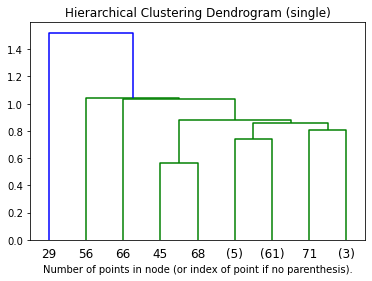

In [6]:
# single-link distance dendrograms 
single_den = sch.dendrogram(sch.linkage(df.iloc[:,range(2,9)], method="single"), truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (single)')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

Text(0.5, 1.0, 'Clustering plot (single)')

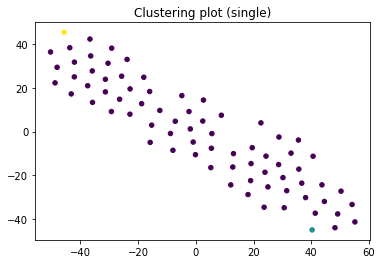

In [7]:
# single-link distance clustering plot
single = AgglomerativeClustering(n_clusters=3, linkage="single", affinity="euclidean")
single_predict = single.fit_predict(df.iloc[:,range(2,9)])
plt.scatter(df_2d[:,0], df_2d[:,1], c=single_predict, s=20)
plt.title("Clustering plot (single)")

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

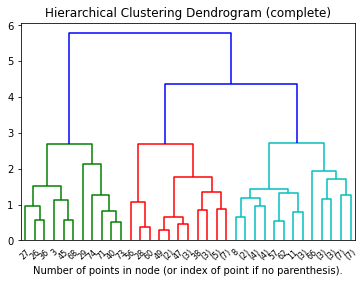

In [8]:
# complete-link distance dendrograms 
complete_den = sch.dendrogram(sch.linkage(df.iloc[:,range(2,9)], method="complete"), truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (complete)')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

Text(0.5, 1.0, 'Clustering plot (complete)')

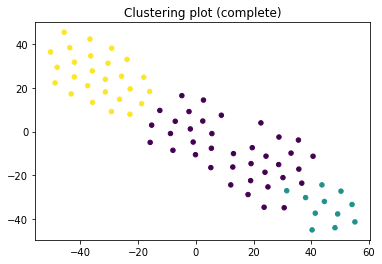

In [9]:
# complete-link distance clustering plot
complete = AgglomerativeClustering(n_clusters=3, linkage="complete", affinity="euclidean")
complete_predict = complete.fit_predict(df.iloc[:,range(2,9)])
plt.scatter(df_2d[:,0], df_2d[:,1], c=complete_predict, s=20)
plt.title("Clustering plot (complete)")

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

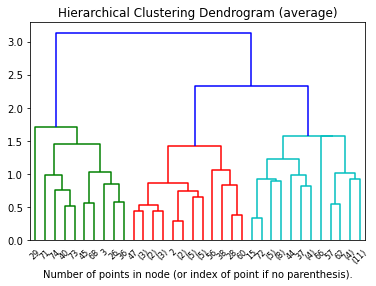

In [10]:
# group average distance dendrograms 
average_den = sch.dendrogram(sch.linkage(df.iloc[:,range(2,9)], method="average"), truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (average)')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

Text(0.5, 1.0, 'Clustering plot (average)')

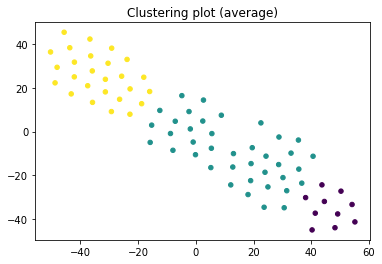

In [11]:
# group average distance clustering plot
average = AgglomerativeClustering(n_clusters=3, linkage="average", affinity="euclidean")
average_predict = average.fit_predict(df.iloc[:,range(2,9)])
plt.scatter(df_2d[:,0], df_2d[:,1], c=average_predict, s=20)
plt.title("Clustering plot (average)")

## Q1c Clustering validity measures:

In [12]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

In [13]:
print("Davies-Bouldin score (single):", davies_bouldin_score(df.iloc[:,range(2,9)], single_predict))
print("Davies-Bouldin score (complete):", davies_bouldin_score(df.iloc[:,range(2,9)], complete_predict))
print("Davies-Bouldin score (average):", davies_bouldin_score(df.iloc[:,range(2,9)], average_predict), '\n')
print("Silhouette score (single):", metrics.silhouette_score(df.iloc[:,range(2,9)], single_predict, metric='euclidean'))
print("Silhouette score (complete):", metrics.silhouette_score(df.iloc[:,range(2,9)], complete_predict, metric='euclidean'))
print("Silhouette score (average):", metrics.silhouette_score(df.iloc[:,range(2,9)], average_predict, metric='euclidean'))


Davies-Bouldin score (single): 0.5137742637032563
Davies-Bouldin score (complete): 0.819269481106398
Davies-Bouldin score (average): 0.7733178860340701 

Silhouette score (single): 0.10201944334301277
Silhouette score (complete): 0.41386704795264717
Silhouette score (average): 0.42968049502721345


## Q1d Visualization: 

### Q1d(i) the names of the countries 

In [14]:
# df_3cluster: storing unnormalised data, excluded outliers, with cluster group numbers
df_3cluster = pd.DataFrame()
for row in range(0, len(df_original)):
    if df_original.iloc[row, 0] in df["country_name"].tolist():
        df_3cluster = df_3cluster.append(df_original.iloc[row, range(9)])[df_original.columns.tolist()]      
df_3cluster["Prediction"] = average_predict

# Three dataframes that contains only data from the same cluster
Label_0 = df_3cluster[df_3cluster["Prediction"]==0]
Label_1 = df_3cluster[df_3cluster["Prediction"]==1]
Label_2 = df_3cluster[df_3cluster["Prediction"]==2]


In [15]:
print("Countries in cluster label 0:", '\n', Label_0["country_name"].tolist(), '\n')
print("Countries in cluster label 1:", '\n', Label_1["country_name"].tolist(), '\n')
print("Countries in cluster label 2:", '\n', Label_2["country_name"].tolist())


Countries in cluster label 0: 
 ['Bolivia', 'Guatemala', "Lao People's Democratic Republic", 'Peru', 'Cambodia', 'Myanmar', 'Nicaragua', 'Nepal', 'Senegal', 'Mali'] 

Countries in cluster label 1: 
 ['Kyrgyzstan', 'Ukraine', 'Libyan Arab Jamahiriya', 'Dominican Republic', 'Egypt', 'Oman', 'Costa Rica', 'Colombia', 'Uzbekistan', 'Morocco', 'South Africa', 'El Salvador', 'Vietnam', 'Azerbaijan', 'Algeria', 'Moldova, Republic of', 'Paraguay', 'Thailand', 'Bosnia and Herzegovina', 'Ecuador', 'Jordan', 'Venezuela', 'Sri Lanka', 'Serbia', 'Albania', 'Tunisia', 'Croatia', 'Turkey', 'Honduras', 'Panama', 'Uruguay', 'Kazakhstan', 'Romania', 'Bulgaria', 'Chile', 'Puerto Rico', 'Argentina', 'Belarus', 'Iraq'] 

Countries in cluster label 2: 
 ['Italy', 'Canada', 'Austria', 'Czech Republic', 'Malaysia', 'New Zealand', 'United Kingdom', 'Slovakia', 'Kuwait', 'Poland', 'Switzerland', 'Greece', 'Finland', 'Portugal', 'Sweden', 'Norway', 'Germany', 'Hungary', 'Slovenia', 'Saudi Arabia', 'Australia', '

### Q1d(ii) summary statistics & boxplot

In [16]:
# statistic Summary table
t_0 = Label_0.describe().T.drop('Prediction', axis=0)
t_0.index = t_0.index+'(label_0)'
t_1 = Label_1.describe().T.drop('Prediction', axis=0)
t_1.index = t_1.index+'(label_1)'
t_2 = Label_2.describe().T.drop('Prediction', axis=0)
t_2.index = t_2.index+'(label_2)'

statistic = t_0
statistic = statistic.append(t_1)
statistic = statistic.append(t_2)
statistic = statistic.reset_index()
statistic = statistic.drop(["count"], axis=1)
statistic=statistic.rename(columns = {'index':'Attribute'})
statistic

Attribute          mean           std           min  \
0     pop_total(label_0)  2.094376e+07  1.428360e+07  6.545502e+06   
1   pop_density(label_0)  7.405583e+01  6.113768e+01  1.048015e+01   
2           GDP(label_0)  6.468768e+03  3.379900e+03  2.423829e+03   
3   basic_water(label_0)  8.497895e+01  6.105321e+00  7.826083e+01   
4    safe_water(label_0)  3.892318e+01  1.419163e+01  1.608187e+01   
5     basic_san(label_0)  6.254398e+01  1.109500e+01  3.933542e+01   
6      safe_san(label_0)  3.205950e+01  1.259460e+01  1.870940e+01   
7     pop_total(label_1)  2.464838e+07  2.666615e+07  2.657637e+06   
8   pop_density(label_1)  9.532275e+01  9.108407e+01  3.795632e+00   
9           GDP(label_1)  1.748943e+04  8.003124e+03  5.470812e+03   
10  basic_water(label_1)  9.557285e+01  3.982459e+00  8.552212e+01   
11   safe_water(label_1)  7.847559e+01  1.143773e+01  5.883333e+01   
12    basic_san(label_1)  9.234720e+01  6.657334e+00  7.574710e+01   
13     safe_san(label_1)  5.208711e+01  1.790631e+01  1.698649e+01   
14    pop_total(label_2)  2.341429e+07  2.378461e+07  2.087946e+06   
15  pop_density(label_2)  1.080339e+02  7.705248e+01  3.247871e+00   
16          GDP(label_2)  4.981106e+04  1.390027e+04  2.952558e+04   
17  basic_water(label_2)  9.960564e+01  8.596815e-01  9.669594e+01   
18   safe_water(label_2)  9.780508e+01  2.866048e+00  8.957276e+01   
19    basic_san(label_2)  9.892931e+01  1.691049e+00  9.124518e+01   
20     safe_san(label_2)  9.046083e+01  7.606282e+00  7.563987e+01   

             25%           50%           75%           max  
0   1.270892e+07  1.654528e+07  2.637104e+07  5.404542e+07  
1   2.639265e+01  6.798283e+01  8.962918e+01  1.959391e+02  
2   3.811473e+03  5.493236e+03  8.784342e+03  1.338036e+04  
3   8.088958e+01  8.191797e+01  9.054897e+01  9.419058e+01  
4   2.704056e+01  4.157917e+01  5.128805e+01  5.599078e+01  
5   5.959946e+01  6.319314e+01  7.202300e+01  7.445941e+01  
6   2.218478e+01  2.903868e+01  3.896935e+01  5.805359e+01  
7   6.455226e+06  1.073896e+07  3.789078e+07  1.003881e+08  
8   3.885715e+01  7.702967e+01  1.017429e+02  3.600174e+02  
9   1.183343e+04  1.564373e+04  2.270090e+04  3.594819e+04  
10  9.367335e+01  9.648397e+01  9.900780e+01  1.000000e+02  
11  7.014479e+01  7.506801e+01  8.973583e+01  9.863917e+01  
12  8.778764e+01  9.425851e+01  9.745348e+01  1.000000e+02  
13  4.153926e+01  5.253579e+01  6.463559e+01  8.055492e+01  
14  5.594874e+06  1.027744e+07  3.675908e+07  8.313280e+07  
15  3.639949e+01  1.075547e+02  1.371456e+02  2.747090e+02  
16  4.104595e+04  4.917183e+04  5.599294e+04  8.824090e+04  
17  9.974045e+01  1.000000e+02  1.000000e+02  1.000000e+02  
18  9.577522e+01  9.839223e+01  9.979693e+01  1.039525e+02  
19  9.877848e+01  9.925553e+01  9.982001e+01  1.000000e+02  
20  8.345785e+01  9.331592e+01  9.653514e+01  1.000000e+02

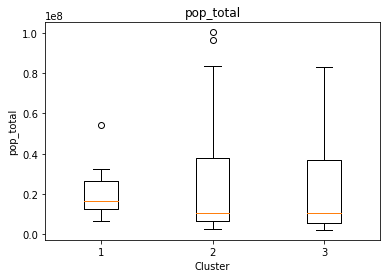

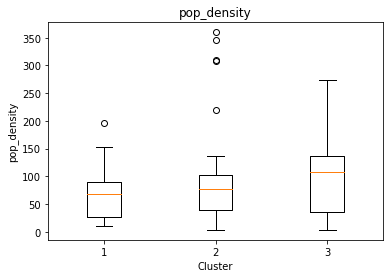

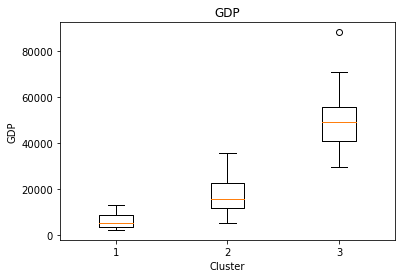

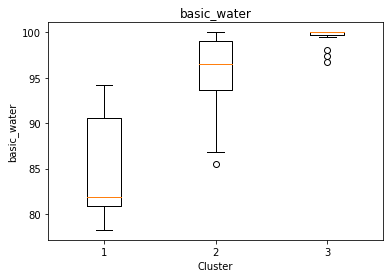

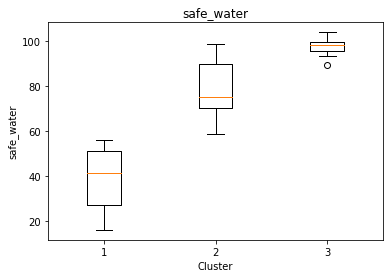

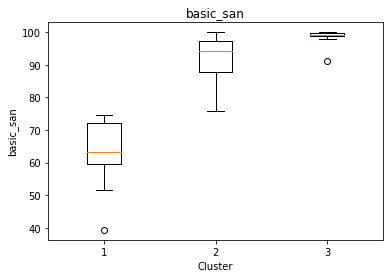

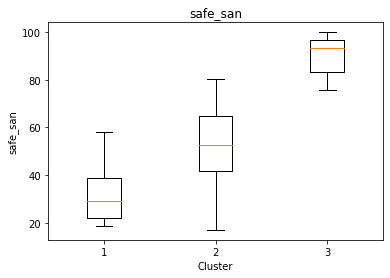

In [17]:
# boxplot for each attribute
for col in range(2,9):
    graph = {"0":Label_0.iloc[:,col], "1":Label_1.iloc[:,col], "2": Label_2.iloc[:,col]}
    fig, ax = plt.subplots()
    ax.boxplot(graph.values())
    ax.set_title(Label_0.columns[col])
    ax.set_ylabel(Label_0.columns[col])
    ax.set_xlabel("Cluster")
    

In [18]:
# The following are the reasons for choosing the two attributes
# calculate the total mean and std of all data
# these are steps for identifying attributes that best illustrate differences between the clusters.
total_mean = []
total_std = []
for col in range(2, 9):
    total_mean.append(df_3cluster.iloc[:,col].mean())
    total_std.append(df_3cluster.iloc[:,col].std())

In [19]:
# Z-score of each cluster group on the total data
# Z-score difference is calculated as the sum of absolute difference of z_score between the 3 cluster
z_score = pd.DataFrame(columns=["Attribute", "Cluster1", "Cluster2", "Cluster3", "Z-score difference"])
for num in range(7):
    attribute = Label_0.columns[num+2]
    z_1 = (statistic.iloc[num,1] - total_mean[num]) / total_std[num]
    z_2 = (statistic.iloc[7+num,1] - total_mean[num]) / total_std[num]
    z_3 = (statistic.iloc[14+num,1] - total_mean[num]) / total_std[num]
    diff = abs(z_3-z_1) + abs(z_3-z_2) + abs(z_2-z_1)
    z_score = z_score.append({"Attribute":attribute,"Cluster1":z_1,"Cluster2" : z_2, "Cluster3" : z_3, 
                          "Z-score difference" : diff}, ignore_index=True)
    
# Two attributes with the highest Z-score difference (two boxplot to be included in the report)
z_score.sort_values(by=["Z-score difference"], ascending=False)

Attribute  Cluster1  Cluster2  Cluster3  Z-score difference
4   safe_water -1.964680 -0.068426  0.858285            5.645929
5    basic_san -2.149417  0.129369  0.632645            5.564122
3  basic_water -1.819507  0.002491  0.696073            5.031161
6     safe_san -1.192999 -0.413716  1.079421            4.544840
2          GDP -1.055142 -0.494903  1.148178            4.406639
1  pop_density -0.276219 -0.019000  0.134738            0.821915
0    pop_total -0.115293  0.038188 -0.012939            0.306962

### Q1d(iii) Create a scatter plot using the two attributes

Text(0, 0.5, 'basic_san')

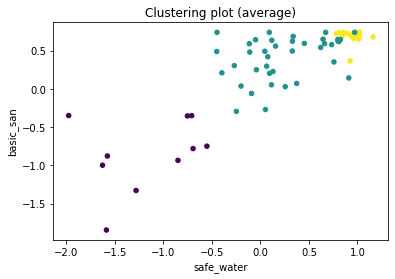

In [20]:
# group average distance clustering plot
plt.scatter(df["safe_water"], df["basic_san"], c=average_predict, s=20)
plt.title("Clustering plot (average)")
plt.xlabel('safe_water')
plt.ylabel('basic_san')


## Q2a policy combinations

In [21]:
df_policy = pd.read_csv("covid_train.csv")
df_policy = df_policy.iloc[:,np.r_[0,91, 9:47]]


In [22]:
import itertools
from mlxtend.frequent_patterns import apriori
# Append the cluster group number to the df
L_list = []
for i in df_policy["country_name"]:
    if i in Label_0["country_name"].tolist():
        L_list.append(0)
    elif i in Label_1["country_name"].tolist():
        L_list.append(1)
    elif i in Label_2["country_name"].tolist():
        L_list.append(2)
    else:
        L_list.append(3)       
df_policy["Label"] = L_list

# 3df containing data from one cluster
L0 = df_policy[df_policy["Label"]==0]
L1 = df_policy[df_policy["Label"]==1]
L2 = df_policy[df_policy["Label"]==2]


In [23]:
# policy combinations that are used >= 30% of all records
def combination_for_all_data (df):
    frequent_itemsets = apriori(df.iloc[:,2:40], min_support=0.3, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets.sort_values('support',ascending = False)
    return frequent_itemsets

# Calculate and return the confidence value 
# num_of_class01: how many times this policy leads to class0/1
# total_num: how many time this policy appear in the clustered group 
def calculate_confidence(df, item):
    for i in item:
        df_index = df[df[i] == 0].index 
        df.drop(df_index, inplace = True)
    num_of_class01 = len(df[df["new_cases_percentages"] <=1])
    total_num = len(df)
    return (num_of_class01/total_num)

# combination: contains all the combination within the cluster group in a list form
# index_to_drop: list of storing the row number to be dropped later
def frequent_itemsets_satisfy_all (L, frequent_itemsets):
    policy_keep = pd.DataFrame()
    index_to_drop = [] 
    con_list = []
    combination = frequent_itemsets['itemsets'].tolist()
    for i in range(len(combination)):
        policy_keep = L[combination[i]]
        policy_keep["new_cases_percentages"] = L["new_cases_percentages"] 
        confidence = calculate_confidence(policy_keep, combination[i])
        
        if(confidence < 0.6):
            index_to_drop.append(i)
        else:
            con_list.append(confidence)
    frequent_itemsets.drop(frequent_itemsets.index[index_to_drop], inplace=True)
    frequent_itemsets["confidence"] = con_list
    return frequent_itemsets

# return df with num of occurence
def occurence(L, frequent_itemsets):
    df1 = pd.DataFrame({"policy": L.columns[1:40]})
    df2 = pd.DataFrame({"itemsets": frequent_itemsets['itemsets']})
    df_combinations = pd.DataFrame({'combination': list(itertools.combinations(df1.policy, 1))})

    for index, row in df_combinations.iterrows():
        df_combinations.at[index, "number of occurrences"] = df2["itemsets"].apply(lambda x: all(i in x for i in row['combination'])).sum()
    df_combinations = df_combinations[df_combinations["number of occurrences"] !=0 ]
    return df_combinations


In [24]:
# Frequent itemsets for cluster 1
L0itemsets = combination_for_all_data(L0)
temp = combination_for_all_data(L0)
L0frequent_itemsets = frequent_itemsets_satisfy_all(L0, L0itemsets)
L0_occur = occurence(L0, L0frequent_itemsets)
L0frequent_itemsets

support  \
11   0.573290   
13   0.397394   
38   0.322476   
39   0.351792   
90   0.560261   
92   0.397394   
104  0.309446   
179  0.322476   
180  0.351792   
317  0.309446   

                                                                                                   itemsets  \
11                                                                                    (H2_Testing policy_1)   
13                                                                                   (H3_Contact tracing_1)   
38                                                            (C2_Workplace closing_2, H2_Testing policy_1)   
39                                                           (C2_Workplace closing_2, H3_Contact tracing_1)   
90                                                 (H1_Public information campaigns_2, H2_Testing policy_1)   
92                                                (H1_Public information campaigns_2, H3_Contact tracing_1)   
104                                     (C2_Workplace closing_2, C1_School closing_3, H3_Contact tracing_1)   
179                        (C2_Workplace closing_2, H1_Public information campaigns_2, H2_Testing policy_1)   
180                       (C2_Workplace closing_2, H1_Public information campaigns_2, H3_Contact tracing_1)   
317  (C2_Workplace closing_2, C1_School closing_3, H1_Public information campaigns_2, H3_Contact tracing_1)   

     length  confidence  
11        1    0.625000  
13        1    0.631148  
38        2    0.606061  
39        2    0.648148  
90        2    0.622093  
92        2    0.631148  
104       3    0.600000  
179       3    0.606061  
180       3    0.648148  
317       4    0.600000

In [25]:
# Frequent itemsets for cluster 2
L1itemsets = combination_for_all_data(L1)
L1frequent_itemsets = frequent_itemsets_satisfy_all(L1, L1itemsets)
L1_occur = occurence(L1, L1frequent_itemsets)
L1frequent_itemsets 

Empty DataFrame
Columns: [support, itemsets, length, confidence]
Index: []

In [26]:
# Frequent itemsets for cluster 3
L2itemsets = combination_for_all_data(L2)
temp2 = combination_for_all_data(L2)
L2frequent_itemsets = frequent_itemsets_satisfy_all(L2, L2itemsets)
L2_occur = occurence(L2, L2frequent_itemsets)
L2frequent_itemsets

support  \
0   0.325203   
12  0.521341   
17  0.347561   
18  0.324187   
24  0.329268   
26  0.328252   
37  0.394309   
38  0.341463   
40  0.315041   
41  0.489837   
43  0.521341   
44  0.410569   
48  0.347561   
49  0.365854   
54  0.329268   
56  0.328252   
59  0.394309   
60  0.341463   
61  0.315041   
62  0.489837   
63  0.410569   
64  0.365854   

                                                                                              itemsets  \
0                                                                                (C1_School closing_2)   
12                                                                         (E2_Debt/contract relief_2)   
17                                                                             (H6_Facial Coverings_2)   
18                                            (H1_Public information campaigns_2, C1_School closing_2)   
24                                     (C8_International travel controls_3, C3_Cancel public events_2)   
26                                              (E2_Debt/contract relief_2, C3_Cancel public events_2)   
37                                          (H3_Contact tracing_2, C8_International travel controls_3)   
38                                                    (E2_Debt/contract relief_2, E1_Income support_2)   
40                                                          (H2_Testing policy_2, E1_Income support_2)   
41                                                         (H3_Contact tracing_2, E1_Income support_2)   
43                                      (E2_Debt/contract relief_2, H1_Public information campaigns_2)   
44                                                   (E2_Debt/contract relief_2, H3_Contact tracing_2)   
48                                          (H6_Facial Coverings_2, H1_Public information campaigns_2)   
49                                                         (H3_Contact tracing_2, H2_Testing policy_2)   
54  (H1_Public information campaigns_2, C8_International travel controls_3, C3_Cancel public events_2)   
56           (E2_Debt/contract relief_2, H1_Public information campaigns_2, C3_Cancel public events_2)   
59       (H1_Public information campaigns_2, H3_Contact tracing_2, C8_International travel controls_3)   
60                 (E2_Debt/contract relief_2, H1_Public information campaigns_2, E1_Income support_2)   
61                       (H2_Testing policy_2, H1_Public information campaigns_2, E1_Income support_2)   
62                      (H1_Public information campaigns_2, H3_Contact tracing_2, E1_Income support_2)   
63                (H1_Public information campaigns_2, E2_Debt/contract relief_2, H3_Contact tracing_2)   
64                      (H1_Public information campaigns_2, H3_Contact tracing_2, H2_Testing policy_2)   

    length  confidence  
0        1    0.634375  
12       1    0.641326  
17       1    0.619883  
18       2    0.636364  
24       2    0.626543  
26       2    0.628483  
37       2    0.657216  
38       2    0.660714  
40       2    0.625806  
41       2    0.609959  
43       2    0.641326  
44       2    0.695545  
48       2    0.619883  
49       2    0.613889  
54       3    0.626543  
56       3    0.628483  
59       3    0.657216  
60       3    0.660714  
61       3    0.625806  
62       3    0.609959  
63       3    0.695545  
64       3    0.613889

## Q2b Histogram

Text(0, 0.5, 'Count')

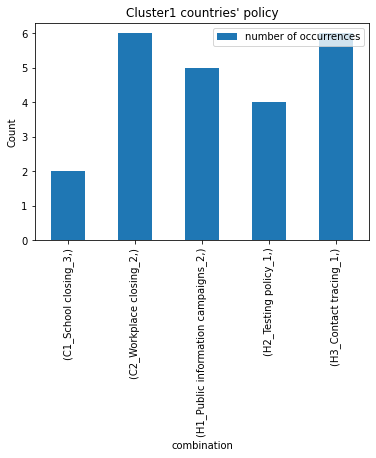

In [27]:
# Cluster 1
L0ax = L0_occur.plot.bar(x='combination')
L0ax.set_title("Cluster1 countries' policy")
L0ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

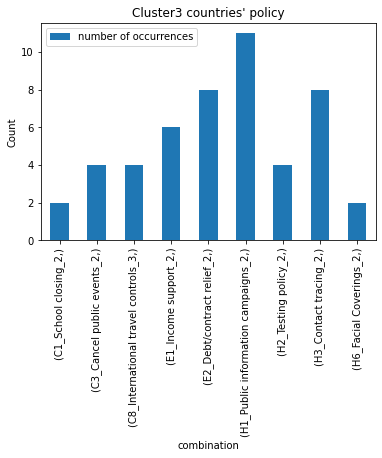

In [28]:
# Cluster 3
L2ax = L2_occur.plot.bar(x='combination')
L2ax.set_title("Cluster3 countries' policy")
L2ax.set_ylabel("Count")

# Q3

In [169]:
import pandas as pd
pd.set_option('display.max_columns',300)
pd.set_option('display.max_colwidth',300)
pd.set_option('display.max_rows',300)
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import math

In [170]:
data =  pd.read_csv('covid_train.csv')
data.shape

(3864, 92)

In [171]:
Symptoms_data_col = ['pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny_nose_weighted',
       'pct_aches_muscle_pain_weighted', 'pct_sore_throat_weighted',
       'pct_chest_pain_weighted', 'pct_nausea_weighted',
       'pct_anosmia_ageusia_weighted', 'pct_eye_pain_weighted',
       'pct_headache_weighted', 'pct_chills_weighted','total_cases','pop_total']
Symptoms = ['pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny_nose_weighted',
       'pct_aches_muscle_pain_weighted', 'pct_sore_throat_weighted',
       'pct_chest_pain_weighted', 'pct_nausea_weighted',
       'pct_anosmia_ageusia_weighted', 'pct_eye_pain_weighted',
       'pct_headache_weighted', 'pct_chills_weighted']

In [172]:
Symptoms_data = data[Symptoms_data_col]

In [173]:
Symptoms_data.head()

pct_fever_weighted  pct_cough_weighted  pct_difficulty_breathing_weighted  \
0            4.560000            9.520000                           2.773333   
1            0.390000            4.666667                           1.850000   
2            1.193333            9.470000                           3.346667   
3            8.540000           19.870000                           9.306667   
4            0.820000            9.893333                           4.000000   

   pct_fatigue_weighted  pct_stuffy_runny_nose_weighted  \
0             29.513333                       18.153333   
1             13.816667                        9.396667   
2             18.290000                       17.850000   
3             21.016667                       30.500000   
4             29.410000                       13.190000   

   pct_aches_muscle_pain_weighted  pct_sore_throat_weighted  \
0                       15.073333                 11.236667   
1                        9.716667                  3.023333   
2                       16.376667                  6.180000   
3                       19.906667                 23.800000   
4                       12.703333                  5.273333   

   pct_chest_pain_weighted  pct_nausea_weighted  pct_anosmia_ageusia_weighted  \
0                 3.540000             5.223333                      4.540000   
1                 1.566667             1.973333                      0.706667   
2                 2.873333             4.343333                      1.353333   
3                13.120000             9.416667                      9.750000   
4                 2.783333             4.223333                      1.110000   

   pct_eye_pain_weighted  pct_headache_weighted  pct_chills_weighted  \
0               9.256667              23.050000             4.896667   
1               3.583333              10.903333             1.056667   
2               4.053333              15.090000             2.696667   
3              19.383333              34.513333            12.810000   
4               3.950000              14.576667             1.053333   

   total_cases  pop_total  
0         3151    6456900  
1       239706   60297396  
2       131495   37589262  
3        45565   11513100  
4        23875    8877067

### Data Preprocessing

In [174]:
for attr in Symptoms:
    median = Symptoms_data[attr].median()
    for count in range(len(Symptoms_data[attr])):
        if Symptoms_data[attr][count] <= median:
            Symptoms_data[attr][count] = 0
        else:
            Symptoms_data[attr][count] = 1

In [175]:
Symptoms_data.head()

pct_fever_weighted  pct_cough_weighted  pct_difficulty_breathing_weighted  \
0                 1.0                 0.0                                0.0   
1                 0.0                 0.0                                0.0   
2                 0.0                 0.0                                0.0   
3                 1.0                 1.0                                1.0   
4                 0.0                 1.0                                1.0   

   pct_fatigue_weighted  pct_stuffy_runny_nose_weighted  \
0                   1.0                             1.0   
1                   0.0                             0.0   
2                   0.0                             1.0   
3                   1.0                             1.0   
4                   1.0                             0.0   

   pct_aches_muscle_pain_weighted  pct_sore_throat_weighted  \
0                             1.0                       1.0   
1                             0.0                       0.0   
2                             1.0                       0.0   
3                             1.0                       1.0   
4                             0.0                       0.0   

   pct_chest_pain_weighted  pct_nausea_weighted  pct_anosmia_ageusia_weighted  \
0                      0.0                  1.0                           1.0   
1                      0.0                  0.0                           0.0   
2                      0.0                  0.0                           0.0   
3                      1.0                  1.0                           1.0   
4                      0.0                  0.0                           0.0   

   pct_eye_pain_weighted  pct_headache_weighted  pct_chills_weighted  \
0                    1.0                    1.0                  1.0   
1                    0.0                    0.0                  0.0   
2                    0.0                    0.0                  0.0   
3                    1.0                    1.0                  1.0   
4                    0.0                    0.0                  0.0   

   total_cases  pop_total  
0         3151    6456900  
1       239706   60297396  
2       131495   37589262  
3        45565   11513100  
4        23875    8877067

## Q3a All symptom combinations

In [176]:
from mlxtend.frequent_patterns import apriori

all_frequent_itemsets = apriori(Symptoms_data[Symptoms], min_support=0.2, use_colnames=True)
all_frequent_itemsets['length'] = all_frequent_itemsets['itemsets'].apply(lambda x: len(x))
all_frequent_itemsets

support  \
0     0.499224   
1     0.500000   
2     0.499224   
3     0.499482   
4     0.499741   
...        ...   
2300  0.216615   
2301  0.200052   
2302  0.202381   
2303  0.204193   
2304  0.205745   

                                                                                                                                                                                                                                       itemsets  \
0                                                                                                                                                                                                                          (pct_fever_weighted)   
1                                                                                                                                                                                                                          (pct_cough_weighted)   
2                                                                                                                                                                                                           (pct_difficulty_breathing_weighted)   
3                                                                                                                                                                                                                        (pct_fatigue_weighted)   
4                                                                                                                                                                                                              (pct_stuffy_runny_nose_weighted)   
...                                                                                                                                                                                                                                         ...   
2300                                  (pct_aches_muscle_pain_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2301                          (pct_fever_weighted, pct_cough_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2302  (pct_aches_muscle_pain_weighted, pct_fever_weighted, pct_difficulty_breathing_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2303           (pct_fever_weighted, pct_difficulty_breathing_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2304              (pct_aches_muscle_pain_weighted, pct_fever_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   

      length  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
2300       8  
2301       9  
2302       9  
2303       9  
2304       9  

[2305 rows x 3 columns]

In [177]:
# All symptom combinations that appear in at least 20% of all the records.
all_frequent_itemsets.sort_values('support',ascending = False)

support  \
5     0.500000   
6     0.500000   
10    0.500000   
1     0.500000   
4     0.499741   
...        ...   
949   0.200052   
2301  0.200052   
1560  0.200052   
1420  0.200052   
1796  0.200052   

                                                                                                                                                                                                               itemsets  \
5                                                                                                                                                                                      (pct_aches_muscle_pain_weighted)   
6                                                                                                                                                                                            (pct_sore_throat_weighted)   
10                                                                                                                                                                                              (pct_eye_pain_weighted)   
1                                                                                                                                                                                                  (pct_cough_weighted)   
4                                                                                                                                                                                      (pct_stuffy_runny_nose_weighted)   
...                                                                                                                                                                                                                 ...   
949                                                                              (pct_fever_weighted, pct_difficulty_breathing_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_stuffy_runny_nose_weighted)   
2301  (pct_fever_weighted, pct_cough_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
1560                                                          (pct_fever_weighted, pct_cough_weighted, pct_sore_throat_weighted, pct_stuffy_runny_nose_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
1420                                                                              (pct_aches_muscle_pain_weighted, pct_chills_weighted, pct_headache_weighted, pct_stuffy_runny_nose_weighted, pct_chest_pain_weighted)   
1796                                                      (pct_aches_muscle_pain_weighted, pct_cough_weighted, pct_difficulty_breathing_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_sore_throat_weighted)   

      length  
5          1  
6          1  
10         1  
1          1  
4          1  
...      ...  
949        5  
2301       9  
1560       6  
1420       5  
1796       6  

[2305 rows x 3 columns]

## Q3b Histogram for high infected area 

In [178]:
# Define the total number of cases in percentage of population as (total_cases)/(pop_total)*100
Symptoms_data['percentage_of_population'] = Symptoms_data['total_cases']/Symptoms_data['pop_total']*100
Symptoms_data['high_percentage_of_population'] = 0

In [179]:
# Compute the median of percentage_of_population
# If the percentage of population is greater than to the corresponding median, it is considered to 
# be high (denoted by 1)
# Otherwise, it is considered to be low (denoted by 0)
median = Symptoms_data['percentage_of_population'].median()
for count in range(len( Symptoms_data['percentage_of_population'])):
        if  Symptoms_data['percentage_of_population'][count] <= median:
            Symptoms_data['high_percentage_of_population'][count] = 0
        else:
            Symptoms_data['high_percentage_of_population'][count] = 1

In [180]:
print('The number of high percentage of population: ', Symptoms_data['high_percentage_of_population'].sum())

The number of high percentage of population:  1932


In [181]:
symptoms_list = []
for i in range(0,len(Symptoms_data)):
    symptoms_list.append([Symptoms[j] for j in range(0,13) if Symptoms_data.values[i,j]!=0])

Symptoms_data['symptoms_list'] = symptoms_list

In [182]:
all_frequent_itemsets['percentage_of_high_population'] = 0
all_frequent_itemsets['total_frequent'] = 0
for i in range(0,len(all_frequent_itemsets)):
    for j in range(0,len(Symptoms_data)):
        if all_frequent_itemsets['itemsets'][i].issubset(frozenset(Symptoms_data['symptoms_list'][j])):
            all_frequent_itemsets['percentage_of_high_population'][i] = all_frequent_itemsets['percentage_of_high_population'][i]+Symptoms_data['high_percentage_of_population'][j]
            all_frequent_itemsets['total_frequent'][i] = all_frequent_itemsets['total_frequent'][i] +1

In [183]:
all_frequent_itemsets

support  \
0     0.499224   
1     0.500000   
2     0.499224   
3     0.499482   
4     0.499741   
...        ...   
2300  0.216615   
2301  0.200052   
2302  0.202381   
2303  0.204193   
2304  0.205745   

                                                                                                                                                                                                                                       itemsets  \
0                                                                                                                                                                                                                          (pct_fever_weighted)   
1                                                                                                                                                                                                                          (pct_cough_weighted)   
2                                                                                                                                                                                                           (pct_difficulty_breathing_weighted)   
3                                                                                                                                                                                                                        (pct_fatigue_weighted)   
4                                                                                                                                                                                                              (pct_stuffy_runny_nose_weighted)   
...                                                                                                                                                                                                                                         ...   
2300                                  (pct_aches_muscle_pain_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2301                          (pct_fever_weighted, pct_cough_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2302  (pct_aches_muscle_pain_weighted, pct_fever_weighted, pct_difficulty_breathing_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2303           (pct_fever_weighted, pct_difficulty_breathing_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2304              (pct_aches_muscle_pain_weighted, pct_fever_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   

      length  percentage_of_high_population  total_frequent  
0          1                            891            1929  
1          1                           1127            1932  
2          1                           1169            1929  
3          1                            986            1930  
4          1                           1267            1931  
...      ...                            ...             ...  
2300       8                            513             837  
2301       9                            478             773  
2302       9                            488             782  
2303       9                            494             789  
2304       9                            479             795  

[2305 rows x 5 columns]

In [184]:
all_frequent_itemsets['percentage_of_high_population'] = all_frequent_itemsets['percentage_of_high_population']/all_frequent_itemsets['total_frequent'] 

In [194]:
high_frequent_itemsets = all_frequent_itemsets[all_frequent_itemsets['percentage_of_high_population']>=0.6]

In [195]:
high_frequent_itemsets

support  \
2     0.499224   
4     0.499741   
16    0.270186   
25    0.361801   
27    0.386646   
...        ...   
2300  0.216615   
2301  0.200052   
2302  0.202381   
2303  0.204193   
2304  0.205745   

                                                                                                                                                                                                                                       itemsets  \
2                                                                                                                                                                                                           (pct_difficulty_breathing_weighted)   
4                                                                                                                                                                                                              (pct_stuffy_runny_nose_weighted)   
16                                                                                                                                                                                         (pct_stuffy_runny_nose_weighted, pct_fever_weighted)   
25                                                                                                                                                                                      (pct_difficulty_breathing_weighted, pct_cough_weighted)   
27                                                                                                                                                                                         (pct_stuffy_runny_nose_weighted, pct_cough_weighted)   
...                                                                                                                                                                                                                                         ...   
2300                                  (pct_aches_muscle_pain_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2301                          (pct_fever_weighted, pct_cough_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2302  (pct_aches_muscle_pain_weighted, pct_fever_weighted, pct_difficulty_breathing_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2303           (pct_fever_weighted, pct_difficulty_breathing_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   
2304              (pct_aches_muscle_pain_weighted, pct_fever_weighted, pct_chills_weighted, pct_eye_pain_weighted, pct_nausea_weighted, pct_sore_throat_weighted, pct_headache_weighted, pct_anosmia_ageusia_weighted, pct_chest_pain_weighted)   

      length  percentage_of_high_population  total_frequent  
2          1                       0.606013            1929  
4          1                       0.656137            1931  
16         2                       0.607280            1044  
25         2                       0.665236            1398  
27         2                       0.682731            1494  
...      ...                            ...             ...  
2300       8                       0.612903             837  
2301       9                       0.618370             773  
2302       9                       0.624041             782  
2303       9                       0.626109             789  
2304       9                       0.602516             795  

[1391 rows x 5 columns]

In [196]:
df1 = pd.DataFrame({"Symptoms": Symptoms})
df2 = pd.DataFrame({"itemsets": high_frequent_itemsets['itemsets']})

# Create a new dataframe with one column that has the possible two by two combinations from `df1`
high_combinations = pd.DataFrame({'combination': list(itertools.combinations(df1.Symptoms, 1))})

In [197]:
for index, row in high_combinations.iterrows():

    high_combinations.at[index, "number of occurrences"] = df2["itemsets"].apply(lambda x: all(i in x for i in row['combination'])).sum()

<Figure size 720x720 with 0 Axes>

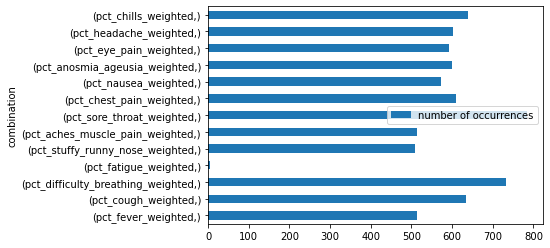

In [198]:
plt.figure(figsize=(10,10))
high_combinations.plot.barh(x='combination')

# Q4

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [51]:
df = pd.read_csv('covid_train.csv')

In [52]:
# Columns for task 4
# Mobility Data attributes: 
# 'driving','walking','transit','retail_and_recreation_percent_change_from_baseline',
# 'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
# 'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
# 'residential_percent_change_from_baseline'

columns_task4 = ['driving','walking','transit','retail_and_recreation_percent_change_from_baseline',
                 'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                 'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                 'residential_percent_change_from_baseline','pop_density','new_cases_percentages']

In [53]:
# Create a dataframe to store data required for task 4
df_for_task4 = df[columns_task4]

In [54]:
df_for_task4

driving     walking     transit  \
0            NaN         NaN         NaN   
1     130.283333   84.920000   59.420000   
2     164.786667  171.060000   60.080000   
3            NaN         NaN         NaN   
4     168.476667  146.010000         NaN   
...          ...         ...         ...   
3859  188.400000  194.713333         NaN   
3860  122.383333   70.313333         NaN   
3861  137.346667   96.416667  130.326667   
3862   58.880000   61.033333         NaN   
3863   86.656667   50.623333         NaN   

      retail_and_recreation_percent_change_from_baseline  \
0                                             -14.000000   
1                                             -13.000000   
2                                              -8.666667   
3                                             -63.666667   
4                                               2.000000   
...                                                  ...   
3859                                            2.666667   
3860                                           -8.333333   
3861                                           -1.666667   
3862                                          -59.666667   
3863                                          -16.000000   

      grocery_and_pharmacy_percent_change_from_baseline  \
0                                             -5.000000   
1                                             -6.666667   
2                                              2.333333   
3                                            -48.666667   
4                                             -1.666667   
...                                                 ...   
3859                                           7.000000   
3860                                           3.000000   
3861                                           3.333333   
3862                                         -33.333333   
3863                                          -0.333333   

      parks_percent_change_from_baseline  \
0                              11.000000   
1                              57.000000   
2                             169.666667   
3                             -55.666667   
4                             112.333333   
...                                  ...   
3859                           60.333333   
3860                          -18.000000   
3861                            2.666667   
3862                          -49.666667   
3863                           -9.333333   

      transit_stations_percent_change_from_baseline  \
0                                        -13.666667   
1                                        -28.666667   
2                                        -31.666667   
3                                        -64.333333   
4                                        -20.666667   
...                                             ...   
3859                                       0.333333   
3860                                     -27.333333   
3861                                     -24.666667   
3862                                     -55.333333   
3863                                     -24.333333   

      workplaces_percent_change_from_baseline  \
0                                  -10.666667   
1                                  -27.666667   
2                                  -18.333333   
3                                  -49.666667   
4                                  -34.666667   
...                                       ...   
3859                               -25.333333   
3860                               -13.000000   
3861                               -25.666667   
3862                               -37.333333   
3863                               -23.333333   

      residential_percent_change_from_baseline  pop_density  \
0                                    -2.666667    32.965589   
1                                     4.666667   205.418372   
2                                     2.333333     4.075188   
3                  

**4(a) Create a scatter plot for each attribute (y-axis) against pop density (x-axis, in log scale). Use different
colors for the different classes in new cases percentages.**

In [55]:
# Columns of attributes in mobility data
columns_task4[:-2]

['driving',
 'walking',
 'transit',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

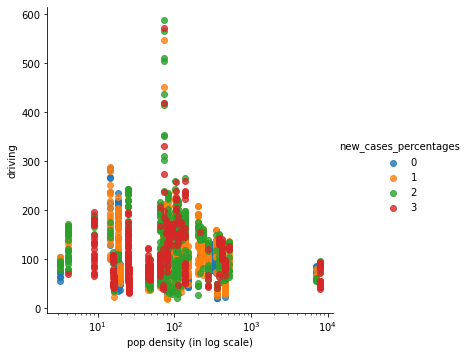

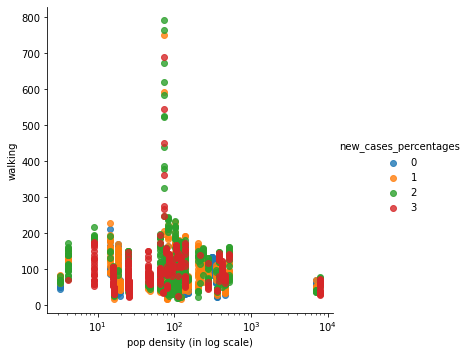

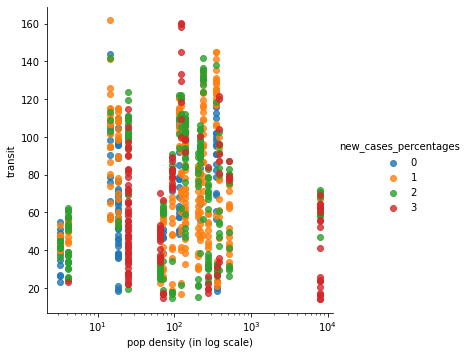

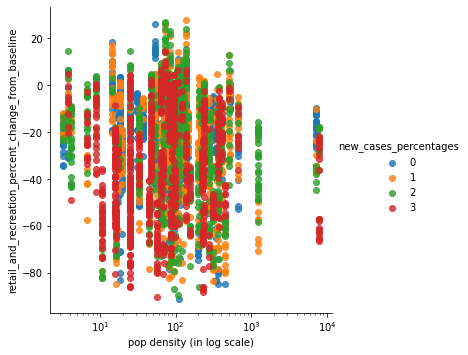

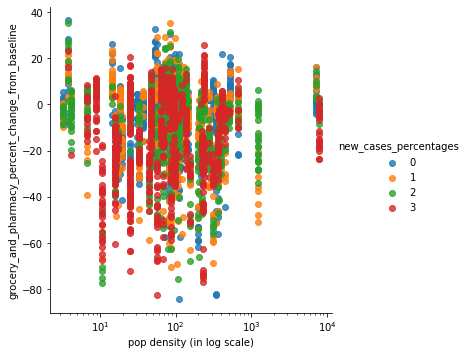

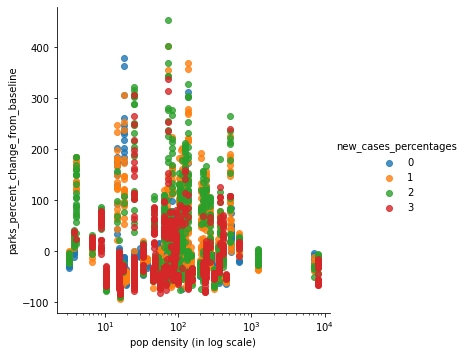

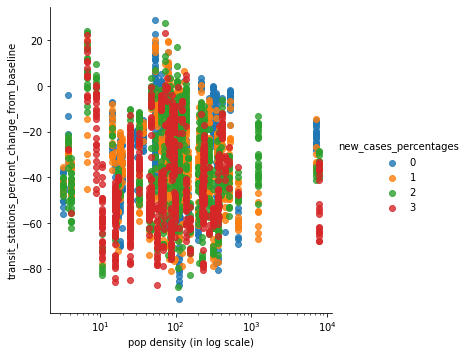

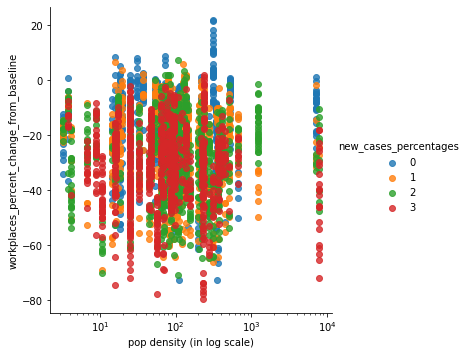

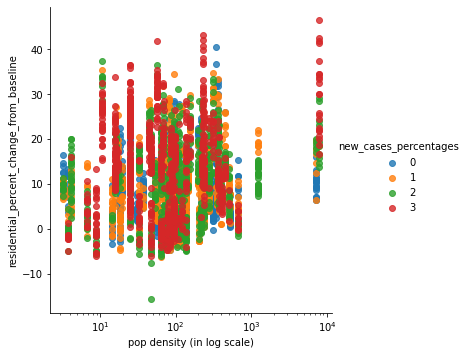

In [56]:
# Scatter plots for each attribute (y-axis) against pop density (x-axis, in log scale)
for attribute in columns_task4[:-2]:
    sns.lmplot('pop_density', attribute, df_for_task4, hue='new_cases_percentages', fit_reg=False)
    plt.xscale("log")
    plt.xlabel('pop density (in log scale)')
    plt.ylabel(attribute)
    plt.show()

**(b) Divide the Mobility Data into five equal-sized parts based on the percentiles of pop density. For each part,
report the top 5 attributes that are most correlated with new cases percentages. Be sure to take both
positive and negative correlated attributes into account.**

In [57]:
# the percentiles of pop density (pop density: people per km^2 of land area)

pop_density_quantile_0 = df_for_task4['pop_density'].quantile(0)
print("The 0% percentile of pop density is ",pop_density_quantile_0,'\n')

pop_density_quantile_02 = df_for_task4['pop_density'].quantile(0.2)
print("The 20% percentile of pop density is ",pop_density_quantile_02,'\n')

pop_density_quantile_04 = df_for_task4['pop_density'].quantile(0.4)
print("The 40% percentile of pop density is ",pop_density_quantile_04,'\n')

pop_density_quantile_06 = df_for_task4['pop_density'].quantile(0.6)
print("The 60% percentile of pop density is ",pop_density_quantile_06,'\n')

pop_density_quantile_08 = df_for_task4['pop_density'].quantile(0.8)
print("The 80% percentile of pop density is ",pop_density_quantile_08,'\n')

pop_density_quantile_1 = df_for_task4['pop_density'].quantile(1)
print("The 100% percentile of pop density is ",pop_density_quantile_1)

The 0% percentile of pop density is  3.24787091 

The 20% percentile of pop density is  30.59578423 

The 40% percentile of pop density is  77.47085096 

The 60% percentile of pop density is  107.9814868 

The 80% percentile of pop density is  235.25351426000185 

The 100% percentile of pop density is  7952.998418000001


In [58]:
print("The pop density of first part is between",pop_density_quantile_0,"and",pop_density_quantile_02,'\n')
print("The pop density of second part is between",pop_density_quantile_02,"and",pop_density_quantile_04,'\n')
print("The pop density of third part is between",pop_density_quantile_04,"and",pop_density_quantile_06,'\n')
print("The pop density of fourth part is between",pop_density_quantile_06,"and",pop_density_quantile_08,'\n')
print("The pop density of fifth part is between",pop_density_quantile_08,"and",pop_density_quantile_1)

The pop density of first part is between 3.24787091 and 30.59578423 

The pop density of second part is between 30.59578423 and 77.47085096 

The pop density of third part is between 77.47085096 and 107.9814868 

The pop density of fourth part is between 107.9814868 and 235.25351426000185 

The pop density of fifth part is between 235.25351426000185 and 7952.998418000001


In [59]:
list_for_index_first_part = [] # List to store indexes of rows that pop density belongs to 0% to 20% percentile

list_for_index_second_part = [] # List to store indexes of rows that pop density belongs to 20% to 40% percentile

list_for_index_third_part = [] # List to store indexes of rows that pop density belongs to 40% to 60% percentile

list_for_index_fourth_part = [] # List to store indexes of rows that pop density belongs to 60% to 80% percentile

list_for_index_fifth_part = [] # List to store indexes of rows that pop density belongs to 80% to 100% percentile

for i in range(len(df_for_task4['pop_density'])):
    if (pop_density_quantile_0 <= (df_for_task4['pop_density'].iloc[i]) < pop_density_quantile_02):
        list_for_index_first_part.append(i)
    elif (pop_density_quantile_02 <= (df_for_task4['pop_density'].iloc[i]) < pop_density_quantile_04):
        list_for_index_second_part.append(i)  
    elif (pop_density_quantile_04 <= (df_for_task4['pop_density'].iloc[i]) < pop_density_quantile_06):
        list_for_index_third_part.append(i)
    elif (pop_density_quantile_06 <= (df_for_task4['pop_density'].iloc[i]) < pop_density_quantile_08):
        list_for_index_fourth_part.append(i)
    elif (pop_density_quantile_08 <= (df_for_task4['pop_density'].iloc[i]) <= pop_density_quantile_1):
        list_for_index_fifth_part.append(i)
    else:
        continue

# Dataframe to store rows that pop density belongs to 0% to 20% percentile
first_part_df = df_for_task4.iloc[list_for_index_first_part]

# Dataframe to store rows that pop density belongs to 20% to 40% percentile
second_part_df = df_for_task4.iloc[list_for_index_second_part]

# Dataframe to store rows that pop density belongs to 40% to 60% percentile
third_part_df = df_for_task4.iloc[list_for_index_third_part]

# Dataframe to store rows that pop density belongs to 60% to 80% percentile
fourth_part_df = df_for_task4.iloc[list_for_index_fourth_part]

# Dataframe to store rows that pop density belongs to 80% to 100% percentile
fifth_part_df = df_for_task4.iloc[list_for_index_fifth_part]

In [60]:
# Correlations between attributes and new case percentages
first_part_corr = first_part_df.corr()['new_cases_percentages'].sort_values(ascending = False)
first_part_corr = first_part_corr.drop(['new_cases_percentages','pop_density'])
second_part_corr = second_part_df.corr()['new_cases_percentages'].sort_values(ascending = False)
second_part_corr = second_part_corr.drop(['new_cases_percentages','pop_density'])
third_part_corr = third_part_df.corr()['new_cases_percentages'].sort_values(ascending = False)
third_part_corr = third_part_corr.drop(['new_cases_percentages','pop_density'])
fourth_part_corr = fourth_part_df.corr()['new_cases_percentages'].sort_values(ascending = False)
fourth_part_corr = fourth_part_corr.drop(['new_cases_percentages','pop_density'])
fifth_part_corr = fifth_part_df.corr()['new_cases_percentages'].sort_values(ascending = False)
fifth_part_corr = fifth_part_corr.drop(['new_cases_percentages','pop_density'])

In [61]:
# Top 5 attributes that are most correlated with new cases percentages in first part mobility data 
# (0 to 20 percentile)
first_part_index = abs(first_part_corr).sort_values(ascending=False).head(5)
first_part_corr[first_part_index.index]

retail_and_recreation_percent_change_from_baseline   -0.399610
workplaces_percent_change_from_baseline              -0.399349
grocery_and_pharmacy_percent_change_from_baseline    -0.339602
residential_percent_change_from_baseline              0.316531
driving                                              -0.216457
Name: new_cases_percentages, dtype: float64

In [62]:
# Top 5 attributes that are most correlated with new cases percentages in second part mobility data
# (20 to 40 percentile)
second_part_corr
second_part_index = abs(second_part_corr).sort_values(ascending=False).head(5)
second_part_corr[second_part_index.index]

workplaces_percent_change_from_baseline              -0.476512
transit_stations_percent_change_from_baseline        -0.355472
retail_and_recreation_percent_change_from_baseline   -0.314820
grocery_and_pharmacy_percent_change_from_baseline    -0.299190
residential_percent_change_from_baseline              0.273031
Name: new_cases_percentages, dtype: float64

In [63]:
# Top 5 attributes that are most correlated with new cases percentages in third part mobility data
# (40 to 60 percentile)
third_part_corr
third_part_index = abs(third_part_corr).sort_values(ascending=False).head(5)
third_part_corr[third_part_index.index]

driving                                          0.391080
walking                                          0.283278
workplaces_percent_change_from_baseline         -0.254134
transit                                          0.234568
transit_stations_percent_change_from_baseline   -0.081535
Name: new_cases_percentages, dtype: float64

In [64]:
# Top 5 attributes that are most correlated with new cases percentages in fourth part mobility data
# (60 to 80 percentile)
fourth_part_corr
fourth_part_index = abs(fourth_part_corr).sort_values(ascending=False).head(5)
fourth_part_corr[fourth_part_index.index]

transit                                               0.292131
residential_percent_change_from_baseline              0.281994
workplaces_percent_change_from_baseline              -0.279136
grocery_and_pharmacy_percent_change_from_baseline    -0.263481
retail_and_recreation_percent_change_from_baseline   -0.238293
Name: new_cases_percentages, dtype: float64

In [65]:
# Top 5 attributes that are most correlated with new cases percentages in fifth part mobility data
# (80 to 100 percentile)
fifth_part_corr
fifth_part_index = abs(fifth_part_corr).sort_values(ascending=False).head(5)
fifth_part_corr[fifth_part_index.index]

transit_stations_percent_change_from_baseline        -0.359921
workplaces_percent_change_from_baseline              -0.357643
residential_percent_change_from_baseline              0.292798
transit                                              -0.277342
retail_and_recreation_percent_change_from_baseline   -0.207211
Name: new_cases_percentages, dtype: float64

# Q5

Suggestion 1: Increase implementation of H2_Testing policy_1 in country group 1 / developing countries

In [66]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(temp, metric="lift", min_threshold=0.5)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules = rules[rules['lift']<1].sort_values(by=['lift'])
rules = rules[rules['antecedent_len']==1].sort_values(by=['lift'])
rules = rules[rules['consequents_len']==1].sort_values(by=['lift'])
rules = rules[rules['consequents']==frozenset({'H2_Testing policy_1'})]
rules
# rules = rules[rules['antecedents']!=frozenset({'E1_Income support_1'})]
# rules[rules['antecedents']!=frozenset({'C3_Cancel public events_2'})]

antecedents            consequents  \
64           (C3_Cancel public events_2)  (H2_Testing policy_1)   
138                (E1_Income support_1)  (H2_Testing policy_1)   
20                 (C1_School closing_3)  (H2_Testing policy_1)   
44              (C2_Workplace closing_2)  (H2_Testing policy_1)   
148  (H1_Public information campaigns_2)  (H2_Testing policy_1)   

     antecedent support  consequent support   support  confidence      lift  \
64             0.732899             0.57329  0.328990    0.448889  0.783005   
138            0.625407             0.57329  0.306189    0.489583  0.853989   
20             0.755700             0.57329  0.394137    0.521552  0.909752   
44             0.583062             0.57329  0.322476    0.553073  0.964735   
148            0.986971             0.57329  0.560261    0.567657  0.990174   

     leverage  conviction  antecedent_len  consequents_len  
64  -0.091173    0.774272               1                1  
138 -0.052351    0.836003               1                1  
20  -0.039099    0.891863               1                1  
44  -0.011788    0.954764               1                1  
148 -0.005560    0.986971               1                1

In [67]:
data

country_name country_code  pop_total  pop_density           GDP  \
0      Kyrgyzstan          KGZ    6456900    32.965589   5470.811536   
1           Italy          ITA   60297396   205.418372  44196.693100   
2          Canada          CAN   37589262     4.075188  51341.705170   
3         Bolivia          BOL   11513100    10.480146   9086.060696   
4         Austria          AUT    8877067   107.127967  59110.562560   
...           ...          ...        ...          ...           ...   
3859       Russia          RUS  144373535     8.822068  29181.363220   
3860     Thailand          THA   69625582   135.897207  19228.294680   
3861        Japan          JPN  126264931   347.073458  43235.717570   
3862     Colombia          COL   50339443    44.748702  15643.731450   
3863      Morocco          MAR   36471769    80.728519   7826.167677   

      basic_water  safe_water  basic_san   safe_san  C1_School closing_1  \
0       87.455903   68.223320  96.507067        NaN                    0   
1       99.442734   95.039615  98.772433  96.208014                    0   
2       99.436244   98.860854  99.286013  82.316398                    0   
3       92.848735         NaN  60.716938  22.938271                    0   
4      100.000000   98.906201  99.972910  96.746738                    0   
...           ...         ...        ...        ...                  ...   
3859    97.089911   76.027734  90.482225  61.306219                    0   
3860    99.930712         NaN  98.750735        NaN                    0   
3861    99.010208   98.453707  99.894708  98.760358                    1   
3862    97.300110   73.233426  89.625358  16.986489                    0   
3863    86.778513   70.266440  88.503644  38.750151                    0   

      C1_School closing_2  C1_School closing_3  C2_Workplace closing_1  \
0                       0                    1                       0   
1                       0                    1                       0   
2                       0                    1                       0   
3                       0                    1                       0   
4                       0                    0                       1   
...                   ...                  ...                     ...   
3859                    1                    0                       0   
3860                    0                    0                       1   
3861                    0                    0                       0   
3862                    0                    1                       0   
3863                    0                    1                       1   

      C2_Workplace closing_2  C2_Workplace closing_3  \
0                          1                       0   
1                          1                       0   
2                          1                       0   
3                          1                       0   
4                          0                       0   
...                      ...                     ...   
3859                       1                       0   
3860                       0                       0   
3861                       0                       0   
3862                       1                       0   
3863                       0                       0   

      C3_Cancel public events_1  C3_Cancel public events_2  \
0                             0                          1   
1                             0                          1   
2                             0                          1   
3                             0                          1   
4                             1                          0   
...                         ...                        ...   
3859                          0                          1   
3860                          1                          0   
3861                          1                          0   
3862                          0              

Suggestion 2 and 3: Improving Immigration screening and prioritize patient in community check

In [68]:
high_combinations.sort_values('number of occurrences',ascending = False)

combination  number of occurrences
6            (pct_sore_throat_weighted,)                  781.0
2   (pct_difficulty_breathing_weighted,)                  730.0
12                (pct_chills_weighted,)                  636.0
1                  (pct_cough_weighted,)                  635.0
7             (pct_chest_pain_weighted,)                  607.0
11              (pct_headache_weighted,)                  600.0
9        (pct_anosmia_ageusia_weighted,)                  597.0
10              (pct_eye_pain_weighted,)                  589.0
8                 (pct_nausea_weighted,)                  571.0
0                  (pct_fever_weighted,)                  513.0
5      (pct_aches_muscle_pain_weighted,)                  510.0
4      (pct_stuffy_runny_nose_weighted,)                  508.0
3                (pct_fatigue_weighted,)                    5.0

<Figure size 720x720 with 0 Axes>

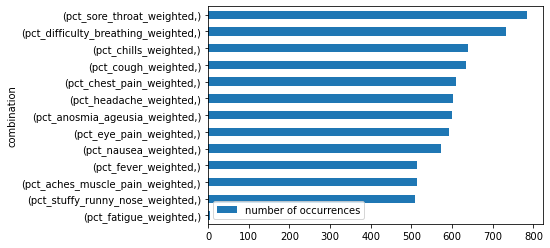

In [204]:
plt.figure(figsize=(10,10))
high_combinations.sort_values('number of occurrences',ascending = True).plot.barh(x='combination')

Suggestion 4: Increase implementation of C3_Cancel public events_2 in country group of label 2

In [69]:
rules1 = association_rules(temp2, metric="lift", min_threshold=0.5)
rules1["antecedent_len"] = rules1["antecedents"].apply(lambda x: len(x))
rules1["consequents_len"] = rules1["consequents"].apply(lambda x: len(x))
rules1 = rules1[rules1['lift']<1].sort_values(by=['lift'])
rules1 = rules1[(rules1['antecedent support']>rules1['consequent support'])]
rules1 = rules1[rules1['consequents']==frozenset({'C3_Cancel public events_2'})]
rules1

antecedents  \
94    (H1_Public information campaigns_2, E1_Income support_2)   
14                                       (E1_Income support_2)   
106  (H1_Public information campaigns_2, H3_Contact tracing_2)   
20                                      (H3_Contact tracing_2)   

                     consequents  antecedent support  consequent support  \
94   (C3_Cancel public events_2)            0.686992            0.636179   
14   (C3_Cancel public events_2)            0.686992            0.636179   
106  (C3_Cancel public events_2)            0.730691            0.636179   
20   (C3_Cancel public events_2)            0.730691            0.636179   

      support  confidence      lift  leverage  conviction  antecedent_len  \
94   0.376016    0.547337  0.860351 -0.061033    0.803736               2   
14   0.376016    0.547337  0.860351 -0.061033    0.803736               1   
106  0.434959    0.595271  0.935698 -0.029891    0.898926               2   
20   0.434959    0.595271  0.935698 -0.029891    0.898926               1   

     consequents_len  
94                 1  
14                 1  
106                1  
20                 1

# Q.6

## 6.1 Step 1 - Import libraries

In [161]:
import pandas as pd
pd.set_option('display.max_columns',300)
pd.set_option('display.max_colwidth',300)
pd.set_option('display.max_rows',300)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#Data Cleansing Package 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.model_selection import train_test_split

#Model Selection
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


#Models
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 

#Model Validation 
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

## 6.2 Step 2 - Import Data

#### Importing the data and observe shape

In [118]:
data =  pd.read_csv('covid_train.csv')
print (data.shape)
data.head()

(3864, 92)


country_name country_code  pop_total  pop_density           GDP  \
0   Kyrgyzstan          KGZ    6456900    32.965589   5470.811536   
1        Italy          ITA   60297396   205.418372  44196.693100   
2       Canada          CAN   37589262     4.075188  51341.705170   
3      Bolivia          BOL   11513100    10.480146   9086.060696   
4      Austria          AUT    8877067   107.127967  59110.562560   

   basic_water  safe_water  basic_san   safe_san  C1_School closing_1  \
0    87.455903   68.223320  96.507067        NaN                    0   
1    99.442734   95.039615  98.772433  96.208014                    0   
2    99.436244   98.860854  99.286013  82.316398                    0   
3    92.848735         NaN  60.716938  22.938271                    0   
4   100.000000   98.906201  99.972910  96.746738                    0   

   C1_School closing_2  C1_School closing_3  C2_Workplace closing_1  \
0                    0                    1                       0   
1                    0                    1                       0   
2                    0                    1                       0   
3                    0                    1                       0   
4                    0                    0                       1   

   C2_Workplace closing_2  C2_Workplace closing_3  C3_Cancel public events_1  \
0                       1                       0                          0   
1                       1                       0                          0   
2                       1                       0                          0   
3                       1                       0                          0   
4                       0                       0                          1   

   C3_Cancel public events_2  C4_Restrictions on gatherings_1  \
0                          1                                0   
1                          1                                0   
2                          1                                0   
3                          1                                0   
4                          0                                0   

   C4_Restrictions on gatherings_2  C4_Restrictions on gatherings_3  \
0                                0                                0   
1                                1                                0   
2                                0                                0   
3                                0                                0   
4                                1                                0   

   C4_Restrictions on gatherings_4  C5_Close public transport_1  \
0                                1                            0   
1                                0                            0   
2                                1                            0   
3                                1                            0   
4                                0                            0   

   C5_Close public transport_2  C6_Stay at home requirements_1  \
0                            1                               0   
1                            0                               1   
2                            0                               1   
3                            1                               0   
4                            0                               0   

   C6_Stay at home requirements_2  C6_Stay at home requirements_3  \
0                               1                               0   
1                               0                               0   
2                               0                               0   
3                               1                               0   
4                               0                               0   

   C7_Restrictions on internal movement_1  \
0                                       0   
1                                       0   
2                                       0   
3                          

In [119]:
Countries_Data_col = ['pop_total', 'pop_density', 'GDP', 'basic_water', 'safe_water', 'basic_san', 'safe_san']
Policies_Data_col = ['C1_School closing_1', 'C1_School closing_2', 'C1_School closing_3', 'C2_Workplace closing_1', 
                     'C2_Workplace closing_2', 'C2_Workplace closing_3', 'C3_Cancel public events_1', 
                     'C3_Cancel public events_2', 'C4_Restrictions on gatherings_1', 'C4_Restrictions on gatherings_2', 
                     'C4_Restrictions on gatherings_3', 'C4_Restrictions on gatherings_4', 'C5_Close public transport_1', 
                     'C5_Close public transport_2', 'C6_Stay at home requirements_1',  'C6_Stay at home requirements_2', 
                     'C6_Stay at home requirements_3', 'C7_Restrictions on internal movement_1', 
                     'C7_Restrictions on internal movement_2', 'C8_International travel controls_1',
                     'C8_International travel controls_2', 'C8_International travel controls_3', 
                     'C8_International travel controls_4']
Economic_policies_Data_col = ['E1_Income support_1', 'E1_Income support_2', 'E2_Debt/contract relief_1', 'E2_Debt/contract relief_2']
Health_system_policies_col = ['H1_Public information campaigns_1', 'H1_Public information campaigns_2', 'H2_Testing policy_1', 
                              'H2_Testing policy_2', 'H2_Testing policy_3', 'H3_Contact tracing_1', 'H3_Contact tracing_2', 
                              'H6_Facial Coverings_1', 'H6_Facial Coverings_2', 'H6_Facial Coverings_3', 'H6_Facial Coverings_4']
Related_Indexes_col = ['StringencyIndex', 'GovernmentResponseIndex', 'ContainmentHealthIndex', 'EconomicSupportIndex']
Symptoms_col = ['pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny_nose_weighted',
       'pct_aches_muscle_pain_weighted', 'pct_sore_throat_weighted',
       'pct_chest_pain_weighted', 'pct_nausea_weighted',
       'pct_anosmia_ageusia_weighted', 'pct_eye_pain_weighted',
       'pct_headache_weighted', 'pct_chills_weighted']
survey_col = ['pct_cmnty_sick_weighted', 'pct_ever_tested_weighted',
       'pct_tested_recently_weighted', 'pct_worked_outside_home_weighted',
       'pct_grocery_outside_home_weighted', 'pct_ate_outside_home_weighted',
       'pct_spent_time_with_non_hh_weighted',
       'pct_attended_public_event_weighted',
       'pct_used_public_transit_weighted',
       'pct_direct_contact_with_non_hh_weighted', 'pct__all_time_weighted',
       'pct_wear_mask_most_time_weighted', 'pct_wear_mask_half_time_weighted',
       'pct_wear_mask_some_time_weighted', 'pct_wear_mask_none_time_weighted',
       'pct_no_public_weighted']
Traveling_col = ['driving', 'walking', 'transit']
activity_data = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

dataset_col = [Countries_Data_col,Policies_Data_col,Economic_policies_Data_col,
          Health_system_policies_col,Related_Indexes_col,Symptoms_col,
          survey_col,Traveling_col,activity_data]

#### Drop irrelavent columns
1. Drop the column of ‘total_cases’ as the testset will not provide this column
2. Drop the column of ‘country_name’ and ‘country_code’ as the country name and country code are not a valid predictor for the model building.


In [120]:
data = data.drop(columns=['total_cases'])

In [121]:
data = data.drop(columns=['country_name','country_code'])

#### Check for missing data

In [122]:
data.isnull().sum().sum()

11373

In [123]:
data.isnull().sum().sort_values(ascending = False)

transit                                               3015
walking                                               1893
driving                                               1893
safe_san                                              1357
safe_water                                            1255
transit_stations_percent_change_from_baseline          335
parks_percent_change_from_baseline                     331
grocery_and_pharmacy_percent_change_from_baseline      321
retail_and_recreation_percent_change_from_baseline     317
residential_percent_change_from_baseline               306
workplaces_percent_change_from_baseline                306
pop_density                                             36
ContainmentHealthIndex                                   3
GovernmentResponseIndex                                  3
EconomicSupportIndex                                     2
C7_Restrictions on internal movement_2                   0
C7_Restrictions on internal movement_1                  

There are a total of 11373 null values across the dataset. The 15 listed columns above are the columns that include null value.

#### Checking for classifiers’ distribution

Text(0.5, 1.0, 'new_cases_percentages')

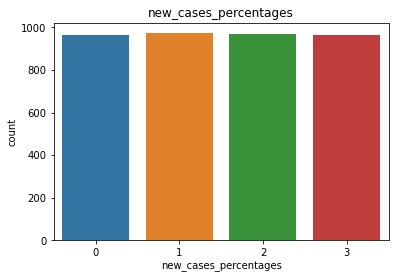

In [124]:
sns.countplot('new_cases_percentages', data=data)
plt.title('new_cases_percentages')

In [125]:
data['new_cases_percentages'].value_counts()

1    972
2    967
3    963
0    962
Name: new_cases_percentages, dtype: int64

There are 962 “0”, 972 “1”, 967 “2” and 963 “3” in the classifier's column “new_cases_percentages”. The data can be regarded as a balanced data.
So, using accuracy is a suitable way to evaluate the performance of our models.


##### Step 2 conclusion:
In the data set, there’s 3864 attributes and 92records. 11373 missing data is found across 15 attributes. For the classifiers, we have 962 “0”, 972 “1”, 967 “2” and 963 “3”. 
For the null value, we will use imputer to fill in the missing value for model training.
As the data set is not large enough. We will adopt cross validation (5-fold) to do testing for the data to search for the best data pre-processing and model’s construction parameters.


## 6.3 Step 3 - Feature engineering & handling missing values

Our first step after a brief data exploration is to handle the missing value and do the data segmentation. We followed two objectives when handling the data:

1. No overfitting of data
2. The fill-in value should show relevance to its attribute

We notice that the above two objectives might contradict thus we need to strike a balance between the two. We started by exploring the attributes correlation to evaluate appropriate feature engineering methods and identify the most suitable way to fill the missing data.


#### Correlation investigation - feature engineering methods 


In [126]:
def get_top_correlations(df, n):
    corr = df.corr().abs().unstack()
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    corr = corr.drop(labels=pairs_to_drop).sort_values(ascending=False)
    return corr[0:n]

In [127]:
for dataset in dataset_col:
    print("Top Correlations")
    print(get_top_correlations(data[dataset], 20))
    print()

Top Correlations
basic_water  basic_san      0.868939
safe_water   basic_san      0.808403
basic_water  safe_water     0.762894
safe_water   safe_san       0.732144
GDP          safe_san       0.728028
             safe_water     0.696726
basic_water  safe_san       0.586368
GDP          basic_san      0.577430
basic_san    safe_san       0.555405
GDP          basic_water    0.534389
pop_total    safe_water     0.433707
pop_density  GDP            0.340608
pop_total    basic_san      0.193178
pop_density  safe_san       0.183048
pop_total    safe_san       0.176557
             GDP            0.162819
pop_density  safe_water     0.124144
             basic_water    0.105360
             basic_san      0.079708
pop_total    basic_water    0.036994
dtype: float64

Top Correlations
C3_Cancel public events_1               C3_Cancel public events_2                 0.679764
C1_School closing_2                     C1_School closing_3                       0.666302
C8_International travel cont

#### Analysis on correlation:
In the correlation analysis of different subset of the training data, we found that in Policies data, including “Containment and closure policies”, “Economic policies” and “Health system policies”, the attributes which represent different ordinal scale position of the policies are always highly correlated with each other. For example,  H1_Public information campaigns_1  and H1_Public information campaigns_2 are having a high correlation of 0.9730. This also implies the similarity in attribute patterns, and provided us with an option of combining attributes into groups to reduce the complexity of handling data in the latter part. 

In the policy data, the extent of enacting the policy is in ordinal scale, with the higher value as tighter policies. In order to reduce the dimensionality and multilinearity of the dataset to prevent overfitting when handling missing value, we would combine the attribute of different ordinal scales of each policy in policilies data. 


In [128]:
data['C1_School closing_1'] = data['C1_School closing_1']*1
data['C1_School closing_2'] = data['C1_School closing_2']*2
data['C1_School closing_3'] = data['C1_School closing_3']*3
data['C1_School closing'] = data['C1_School closing_1'] + data['C1_School closing_2']+ data['C1_School closing_3']


data['C2_Workplace closing_1'] = data['C2_Workplace closing_1']*1
data['C2_Workplace closing_2'] = data['C2_Workplace closing_2']*2
data['C2_Workplace closing_3'] = data['C2_Workplace closing_3']*3
data['C2_Workplace closing'] = data['C2_Workplace closing_1'] + data['C2_Workplace closing_2']+ data['C2_Workplace closing_3']


data['C3_Cancel public events_1'] = data['C3_Cancel public events_1']*1
data['C3_Cancel public events_2'] = data['C3_Cancel public events_2']*2
data['C3_Cancel public events'] = data['C3_Cancel public events_1'] + data['C3_Cancel public events_2']


data['C4_Restrictions on gatherings_1'] = data['C4_Restrictions on gatherings_1']*1
data['C4_Restrictions on gatherings_2'] = data['C4_Restrictions on gatherings_2']*2
data['C4_Restrictions on gatherings_3'] = data['C4_Restrictions on gatherings_3']*3
data['C4_Restrictions on gatherings_4'] = data['C4_Restrictions on gatherings_4']*4
data['C4_Restrictions on gatherings'] = data['C4_Restrictions on gatherings_1']+ data['C4_Restrictions on gatherings_2']+data['C4_Restrictions on gatherings_3'] +data['C4_Restrictions on gatherings_4']


data['C5_Close public transport_1'] = data['C5_Close public transport_1']*1
data['C5_Close public transport_2'] = data['C5_Close public transport_2']*2
data['C5_Close public transport'] = data['C5_Close public transport_1'] + data['C5_Close public transport_2']



data['C6_Stay at home requirements_1'] = data['C6_Stay at home requirements_1']*1
data['C6_Stay at home requirements_2'] = data['C6_Stay at home requirements_2']*2
data['C6_Stay at home requirements_3'] = data['C6_Stay at home requirements_3']*3
data['C6_Stay at home requirements'] = data['C6_Stay at home requirements_1'] +data['C6_Stay at home requirements_2']+ data['C6_Stay at home requirements_3']



data['C7_Restrictions on internal movement_1'] = data['C7_Restrictions on internal movement_1']*1
data['C7_Restrictions on internal movement_2'] = data['C7_Restrictions on internal movement_2']*2
data['C7_Restrictions on internal movement'] = data['C7_Restrictions on internal movement_1'] + data['C7_Restrictions on internal movement_2']



data['C8_International travel controls_1'] = data['C8_International travel controls_1']*1
data['C8_International travel controls_2'] = data['C8_International travel controls_2']*2
data['C8_International travel controls_3'] = data['C8_International travel controls_3']*3
data['C8_International travel controls_4'] = data['C8_International travel controls_4']*4
data['C8_International travel controls'] = data['C8_International travel controls_1']+ data['C8_International travel controls_2'] +data['C8_International travel controls_3']+data['C8_International travel controls_4']


data['E1_Income support_1'] = data['E1_Income support_1']*1
data['E1_Income support_2'] = data['E1_Income support_2']*2
data['E1_Income support'] = data['E1_Income support_1']+ data['E1_Income support_2']


data['E2_Debt/contract relief_1'] = data['E2_Debt/contract relief_1']*1
data['E2_Debt/contract relief_2'] = data['E2_Debt/contract relief_2']*2
data['E2_Debt/contract relief'] = data['E2_Debt/contract relief_1']+ data['E2_Debt/contract relief_2']



data['H1_Public information campaigns_1'] = data['H1_Public information campaigns_1']*1
data['H1_Public information campaigns_2'] = data['H1_Public information campaigns_2']*2
data['H1_Public information campaigns'] = data['H1_Public information campaigns_1'] + data['H1_Public information campaigns_2']



data['H2_Testing policy_1'] = data['H2_Testing policy_1']*1
data['H2_Testing policy_2'] = data['H2_Testing policy_2']*2
data['H2_Testing policy_3'] = data['H2_Testing policy_3']*3
data['H2_Testing policy'] = data['H2_Testing policy_1'] + data['H2_Testing policy_2'] + data['H2_Testing policy_3']



data['H3_Contact tracing_1'] = data['H3_Contact tracing_1']*1
data['H3_Contact tracing_2'] = data['H3_Contact tracing_2']*2
data['H3_Contact tracing'] = data['H3_Contact tracing_1'] + data['H3_Contact tracing_2']



data['H6_Facial Coverings_1'] = data['H6_Facial Coverings_1']*1
data['H6_Facial Coverings_2'] = data['H6_Facial Coverings_2']*2
data['H6_Facial Coverings_3'] = data['H6_Facial Coverings_3']*3
data['H6_Facial Coverings_4'] = data['H6_Facial Coverings_4']*4
data['H6_Facial Coverings'] = data['H6_Facial Coverings_1'] + data['H6_Facial Coverings_2']+data['H6_Facial Coverings_3'] + data['H6_Facial Coverings_4']
    
    
Policies_Data_col_combined = ['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings',
                    'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
                    'C8_International travel controls']
Economic_policies_Data_col_combined = ['E1_Income support', 'E2_Debt/contract relief']
Health_system_policies_col_combined= ['H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing',
                             'H6_Facial Coverings']


In [129]:
data = data.drop(columns=Policies_Data_col)
data = data.drop(columns=Economic_policies_Data_col)
data = data.drop(columns=Health_system_policies_col)

In [130]:
dataset_col = [Countries_Data_col,Policies_Data_col_combined,Economic_policies_Data_col_combined,
          Health_system_policies_col_combined,Related_Indexes_col,Symptoms_col,
          survey_col,Traveling_col,activity_data]

#### Correlation investigation - Suitability of IterativeImputer 
We would like to use IterativeImputer to deal with the missing values. It imputes missing data by modeling each feature with missing values as a function of other features in a round-robin fashion. Compared to min-max imputer and constant value impiter, IterativeImputer can help to give a better estimation of the missing values’ with other features in the dataset. In order to prevent outputting an overfitted / irrelevant imputed value, we again, would investigate the attribute correlation. 


In [131]:
for dataset in dataset_col:
    print("Top Correlations")
    print(get_top_correlations(data[dataset], 20))
    print()

Top Correlations
basic_water  basic_san      0.868939
safe_water   basic_san      0.808403
basic_water  safe_water     0.762894
safe_water   safe_san       0.732144
GDP          safe_san       0.728028
             safe_water     0.696726
basic_water  safe_san       0.586368
GDP          basic_san      0.577430
basic_san    safe_san       0.555405
GDP          basic_water    0.534389
pop_total    safe_water     0.433707
pop_density  GDP            0.340608
pop_total    basic_san      0.193178
pop_density  safe_san       0.183048
pop_total    safe_san       0.176557
             GDP            0.162819
pop_density  safe_water     0.124144
             basic_water    0.105360
             basic_san      0.079708
pop_total    basic_water    0.036994
dtype: float64

Top Correlations
C6_Stay at home requirements   C7_Restrictions on internal movement    0.638187
C5_Close public transport      C6_Stay at home requirements            0.585649
                               C7_Restrictions on 

In [132]:
for dataset in dataset_col:
    print("Top Correlations")
    print(get_top_correlations(data[set(Countries_Data_col+Related_Indexes_col+dataset)], 20))
    print()

Top Correlations
GovernmentResponseIndex  ContainmentHealthIndex     0.961966
StringencyIndex          ContainmentHealthIndex     0.953756
                         GovernmentResponseIndex    0.903673
basic_water              basic_san                  0.868939
safe_water               basic_san                  0.808403
                         basic_water                0.762894
                         safe_san                   0.732144
safe_san                 GDP                        0.728028
safe_water               GDP                        0.696726
basic_water              safe_san                   0.586368
basic_san                GDP                        0.577430
                         safe_san                   0.555405
basic_water              GDP                        0.534389
                         EconomicSupportIndex       0.489548
GDP                      EconomicSupportIndex       0.446310
safe_water               pop_total                  0.433707
       

#### Analysis on IterativeImputer 

We run the code again to retrieve the correlation of attributes in different subset data, and the correlation in different subsets of data against Countries Data and Related Indexes data. If attributes are correlated, it implies the feasibility in using IterativeImputer to generate relevant data to fill in the missing values.


#### Handling missing value


In [133]:
imp = IterativeImputer(random_state=0)

imp.fit(data[Countries_Data_col+Related_Indexes_col])
data[Countries_Data_col+Related_Indexes_col] = np.round(imp.transform(data[Countries_Data_col+Related_Indexes_col]))

imp.fit(data[Countries_Data_col+Related_Indexes_col+Traveling_col])
data[Countries_Data_col+Related_Indexes_col+Traveling_col] = np.round(imp.transform(data[Countries_Data_col+Related_Indexes_col+Traveling_col]))

imp.fit(data[Countries_Data_col+Related_Indexes_col+activity_data])
data[Countries_Data_col+Related_Indexes_col+activity_data] = np.round(imp.transform(data[Countries_Data_col+Related_Indexes_col+activity_data]))

#### Step 3 Conclusion:
1. High correlation means two attributes are dependent on others. Having dependent attributes in the dataset for training will lead to overfitting and multicollinearity issues. 
2. As there are many fields that are highly correlated. Feature engineering on policies data are implemented in the stage. 
3. With the correlation of the data, IterativeImputer is applied to help to impute the missing data.


## 6.4 Step 4 - Model Selection

There are in total two decisions we would like to make. First, we would like to evaluate whether additional preprocessing of data (eg: PCA) is beneficial to model performance. Second, we would like to identify the optimal classifier among decision tree, random forest and xgboost. 

#### Spliting of data for model selection

In [134]:
X = data.drop(columns='new_cases_percentages')
y = data['new_cases_percentages']

### Model 1: Decision Tree classifier

In [88]:
%%time
# Creating an standardscaler object
std_slc = StandardScaler()
# Creating a pca object
pca = decomposition.PCA()
# Creating a Decision Tree Classifier
dec_tree = tree.DecisionTreeClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('dec_tree', dec_tree)])
    # Creating Parameter Space
n_components = [0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 
                0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,0.98, 0.99]
random_state = [42]

    # Creating a dictionary of all the parameter options 
parameters = dict(pca__n_components=n_components,
                     dec_tree__random_state=random_state)

cv = StratifiedKFold(n_splits = 5)

Wall time: 997 µs


In [89]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

Wall time: 6.42 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dec_tree__random_state': [42],
                         'pca__n_components': [0.8, 0.81, 0.82, 0.83, 0.84,
                                               0.85, 0.86, 0.87, 0.88, 0.89,
                                               0.9, 0.91, 0.92, 0.93, 0.94,
                                               0.95, 0.96, 0.97, 0.98, 0.99]},
             scoring='accuracy', verbose=30)

In [90]:
%%time
    # Viewing The Best Parameters
print('Best Number Of Components:', model.best_estimator_.get_params()['pca__n_components'])
print(); print(model.best_estimator_.get_params()['pca'])

Best Number Of Components: 0.9

PCA(n_components=0.9)
Wall time: 997 µs


In [91]:
model.best_score_

0.6658885708731878

In [92]:
%%time
# Creating a Decision Tree Classifier
dec_tree = tree.DecisionTreeClassifier()
    # Creating a pipeline of one steps
pipe = Pipeline(steps=[('dec_tree', dec_tree)])
    # Creating Parameter Space
random_state = [42]
    # Creating a dictionary of all the parameter options 
parameters = dict(dec_tree__random_state=random_state)

cv = StratifiedKFold(n_splits = 5)

Wall time: 0 ns


In [93]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1855s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Wall time: 484 ms


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('dec_tree', DecisionTreeClassifier())]),
             n_jobs=-1, param_grid={'dec_tree__random_state': [42]},
             scoring='accuracy', verbose=30)

In [94]:
model.best_score_

0.7248945967866263

### Model 2: Random forest classifier

In [95]:
%%time
# Creating an standardscaler object
std_slc = StandardScaler()
# Creating a pca object
pca = decomposition.PCA()
# Creating a Random Forest Classifier
RandomForest = RandomForestClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('RandomForest', RandomForest)])

n_components = [0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 
                0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,0.98, 0.99]
random_state = [42]

    # Creating a dictionary of all the parameter options 
parameters = dict(pca__n_components=n_components,
                     RandomForest__random_state=random_state)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 0 ns


In [96]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

Wall time: 33.4 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RandomForest__random_state': [42],
                         'pca__n_components': [0.8, 0.81, 0.82, 0.83, 0.84,
                                               0.85, 0.86, 0.87, 0.88, 0.89,
                                               0.9, 0.91, 0.92, 0.93, 0.94,
                                               0.95, 0.96, 0.97, 0.98, 0.99]},
             scoring='accuracy', verbose=30)

In [97]:
%%time
    # Viewing The Best Parameters
print('Best Number Of Components:', model.best_estimator_.get_params()['pca__n_components'])
print(); print(model.best_estimator_.get_params()['pca'])

Best Number Of Components: 0.94

PCA(n_components=0.94)
Wall time: 2 ms


In [98]:
model.best_score_

0.7976218085783804

In [99]:
%%time
# Creating a Random Forest Classifier
RandomForest = RandomForestClassifier()
    # Creating a pipeline of one steps
pipe = Pipeline(steps=[('RandomForest', RandomForest)])
    # Creating Parameter Space
random_state = [42]

    # Creating a dictionary of all the parameter options 
parameters = dict(RandomForest__random_state=random_state)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 0 ns


In [100]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


Wall time: 3.15 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('RandomForest',
                                        RandomForestClassifier())]),
             n_jobs=-1, param_grid={'RandomForest__random_state': [42]},
             scoring='accuracy', verbose=30)

In [101]:
model.best_score_

0.8131480873254731

### Model 3: Xgboost

In [102]:
%%time
# # Creating an standardscaler object
std_slc = StandardScaler()
# # Creating a pca object
pca = decomposition.PCA()
# Creating a XGBoost Classifier
xgb = XGBClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('xgb', xgb)])
    # Creating Parameter Space
n_components = [0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 
                0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,0.98, 0.99]
random_state = [42]

    # Creating a dictionary of all the parameter options 
parameters = dict(pca__n_components=n_components,
                  xgb__random_state=random_state)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 0 ns


In [103]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

Wall time: 2min 45s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=No...
                                                      num_parallel

In [104]:
%%time
    # Viewing The Best Parameters
print('Best Number Of Components:', model.best_estimator_.get_params()['pca__n_components'])
print(); print(model.best_estimator_.get_params()['pca'])

Best Number Of Components: 0.93

PCA(n_components=0.93)
Wall time: 5.98 ms


In [105]:
model.best_score_

0.7885608188271254

In [106]:
%%time
# Creating a XGBoost Classifier
xgb = XGBClassifier()
    # Creating a pipeline of one steps
pipe = Pipeline(steps=[('xgb', xgb)])
    # Creating Parameter Space
random_state = [42]
    # Creating a dictionary of all the parameter options 
parameters = dict(xgb__random_state=random_state)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 997 µs


In [107]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.4s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   12.4s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.8s finished


Wall time: 16.5 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                              

In [108]:
model.best_score_

0.8131490927615307

### Model 4: KNN/LMKNN

In [149]:
%%time
# # Creating an standardscaler object
std_slc = StandardScaler()
# # Creating a pca object
pca = decomposition.PCA()
# Creating a KNeighbors Classifier
knn = KNeighborsClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('knn', knn)])
    # Creating Parameter Space
n_components = [0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 
                0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,0.98, 0.99]

leaf_size = list(range(1,25))
n_neighbors = list(range(1,15))
p=[1,2]
metric = ['cosine']
    # Creating a dictionary of all the parameter options 
parameters = dict(pca__n_components=n_components,
                  knn__leaf_size=leaf_size,
                  knn__n_neighbors=n_neighbors,
                  knn__p=p,
                  knn__metric=metric)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 0 ns


In [150]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 13440 candidates, totalling 67200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    8.5s
[Paralle

[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:   14.0s
[Paralle

[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed:   19.7s
[Paralle

[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 551 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   26.5s
[Paralle

[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 683 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 684 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 685 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:   32.0s
[Paralle

[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 819 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 821 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 822 tasks      | elapsed:   37.5s
[Paralle

[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 949 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 950 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 951 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 953 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 954 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 955 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 957 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 959 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 961 tasks      | elapsed:   42.9s
[Paralle

[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 1079 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 1083 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 1085 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1086 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1087 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1089 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 1090 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 1091 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 1092 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1212 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 1213 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 1214 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1215 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1216 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1217 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 1219 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 1221 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 1222 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 1223 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 1225 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 1227 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1343 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1345 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1347 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1350 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1351 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1353 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1354 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1355 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1356 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1358 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1477 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1478 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1479 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1481 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1483 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1484 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1485 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1486 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1487 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1488 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1489 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1490 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1491 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1492 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1609 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1610 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1611 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1612 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1613 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1614 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1615 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1617 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1618 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1619 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1620 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1621 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1622 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1623 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1624 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1740 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1741 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1742 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1743 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1745 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1746 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1747 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1748 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1749 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1750 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1751 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1753 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1754 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1755 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1875 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1876 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1877 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1878 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1879 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1880 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1881 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1882 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1883 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1884 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1885 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1886 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1887 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1888 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1889 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1890 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2008 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2009 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2010 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2011 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2012 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2013 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2015 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2017 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2018 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2019 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2020 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2021 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2022 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2023 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2142 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2143 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2144 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2145 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2147 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2148 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2149 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2150 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2151 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2152 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2153 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2155 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2156 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2157 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2277 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2278 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2279 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2281 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2282 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2283 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2284 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2285 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2286 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2287 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2288 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2289 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2290 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2291 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2292 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2411 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2412 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2413 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2414 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2415 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2416 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2417 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2419 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2420 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2421 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2422 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2423 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2424 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2425 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2543 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2544 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2545 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2546 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2547 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2548 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2549 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2550 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2551 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2552 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2553 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2554 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2555 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2556 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2557 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2558 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2674 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2675 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2676 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2677 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2678 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2679 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2681 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2682 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2683 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2684 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2685 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2686 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2687 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2688 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2689 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2807 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2808 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2809 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2810 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2811 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2812 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2813 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2814 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2815 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2816 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2817 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2818 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2819 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2820 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2821 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2822 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2938 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2939 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2941 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2942 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2943 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2944 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2945 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2946 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2947 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2948 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2949 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2950 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2951 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2952 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2953 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3070 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3071 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3072 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3073 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3074 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3075 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3076 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3077 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3078 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3079 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3080 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3081 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3082 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3083 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3084 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3085 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3204 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3205 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3206 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3207 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3209 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3210 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3211 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3212 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3213 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3214 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3215 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3217 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3218 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3219 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3336 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3337 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3338 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3339 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3340 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3341 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3342 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3343 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3344 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3345 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3346 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3347 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3348 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3350 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3351 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3469 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3470 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3471 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3472 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3473 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3474 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3475 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3476 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3477 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3478 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3479 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3480 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3481 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3482 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3483 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3484 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3602 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3603 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3604 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3605 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3606 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3607 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3608 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3609 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3610 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3611 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3612 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3613 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3614 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3615 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3616 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3617 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3733 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3734 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3735 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3736 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3737 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3738 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3739 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3740 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3741 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3742 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3743 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3744 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3745 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3746 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3747 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3748 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3867 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3868 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3869 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3870 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3871 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3872 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3873 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3874 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3875 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3876 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3877 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3878 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3879 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3880 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3881 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3882 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4001 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4003 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4004 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4005 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4006 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4007 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4008 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4009 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4010 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4011 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4012 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4013 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4014 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4015 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4135 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4136 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4137 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4138 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4139 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4140 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4141 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4142 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4143 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4144 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4145 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4147 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4148 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4149 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4150 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4266 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4267 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4268 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4269 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4270 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4271 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4272 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4273 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4274 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4275 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4276 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4277 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4278 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4279 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4281 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4401 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4402 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4403 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4404 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4405 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4406 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4407 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4408 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4409 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4410 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4411 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4412 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4413 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4414 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4415 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4416 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4536 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4537 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4538 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4539 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4540 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4541 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4542 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4543 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4544 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4545 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4546 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4547 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4548 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4549 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4550 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4551 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4668 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4669 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4670 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4671 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4672 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4673 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4674 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4675 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4676 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4677 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4678 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4679 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4680 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4681 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4682 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4683 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4801 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4802 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4803 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4804 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4805 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4806 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4807 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4808 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4809 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4810 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4811 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4812 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4813 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4814 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4815 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4816 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4937 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4938 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4939 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4940 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4941 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4942 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4943 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4945 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4946 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4947 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4948 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4949 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4950 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4951 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5072 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5073 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5074 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5075 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5076 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5077 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5078 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5079 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5080 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5081 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5082 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5083 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5084 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5085 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5086 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5087 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5205 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5206 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5207 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5208 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5209 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5210 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5211 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5212 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5213 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5214 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5215 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5216 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5217 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5218 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5219 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5220 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5337 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5338 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5339 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5340 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5341 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5342 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5343 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5344 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5345 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5346 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5347 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5348 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5349 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5350 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5351 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5352 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5474 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5475 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5476 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5477 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5478 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5479 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5480 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5481 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5482 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5483 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5484 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5485 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5486 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5487 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5488 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5489 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5607 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5608 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5609 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5610 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5611 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5612 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5613 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5614 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5615 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5616 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5617 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5618 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5619 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5620 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5621 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5622 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5738 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5739 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5740 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5741 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5742 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5743 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5744 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5745 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5746 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5747 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5748 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5749 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5750 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5751 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5752 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5753 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5872 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5873 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5874 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5875 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5876 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5877 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5878 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5879 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5880 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5881 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5882 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5883 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5884 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5885 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5886 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5887 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6008 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6009 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6010 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6011 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6012 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6013 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6014 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6015 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6016 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6017 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6019 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6020 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6021 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6022 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6023 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6145 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6147 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6148 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6149 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6150 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6151 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6152 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6153 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6154 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6155 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6156 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6157 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6158 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6159 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6282 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6283 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6284 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6285 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6286 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6287 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6288 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6289 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6290 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6291 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6292 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6293 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6294 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6295 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6296 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6297 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6415 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6416 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6417 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6418 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6419 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6420 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6421 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6422 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6423 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6424 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6425 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6426 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6427 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6428 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6429 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6430 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6549 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6550 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6551 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6552 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6553 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6554 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6555 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6556 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6557 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6558 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6559 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6560 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6561 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6562 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6563 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6564 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6682 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6683 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6684 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6685 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6686 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6687 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6688 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6689 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6690 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6691 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6692 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6693 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6694 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6695 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6696 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6697 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6815 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6816 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6817 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6818 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6819 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6820 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6822 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6823 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6824 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6825 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6826 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6827 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6828 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6830 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6949 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6950 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6951 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6952 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6953 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6954 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6955 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6956 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6957 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6958 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6959 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6960 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6961 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6962 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6963 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6964 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7082 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7083 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7084 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7085 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7086 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7087 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7088 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7089 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7090 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7091 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7092 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7093 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7094 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7095 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7096 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7097 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7216 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7217 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7218 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7219 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7220 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7221 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7222 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7223 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7224 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7225 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7226 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7227 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7228 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7229 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7230 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7231 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7348 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7349 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7350 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7351 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7352 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7353 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7354 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7355 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7356 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7357 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7358 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7359 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7360 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7361 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7362 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7363 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7480 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7481 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7482 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7483 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7484 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7485 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7486 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7487 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7488 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7489 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7490 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7491 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7492 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7493 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7494 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7495 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7613 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7614 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7615 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7616 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7617 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7618 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7619 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7620 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7621 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7622 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7623 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7624 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7625 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7626 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7627 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7628 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7746 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7747 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7748 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7749 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7750 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7751 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7752 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7753 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7754 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7755 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7756 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7757 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7758 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7759 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7760 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7761 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7882 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7883 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7884 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7885 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7886 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7887 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7888 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7889 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7890 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7891 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7892 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7893 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7894 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7895 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7896 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7897 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8018 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8019 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8020 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8021 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8022 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8023 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8024 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8025 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8026 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8027 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8028 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8029 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8030 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8031 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8032 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8033 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8152 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8153 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8154 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8155 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8156 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8157 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8158 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8159 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8160 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8161 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8162 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8163 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8164 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8165 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8166 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8167 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8284 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8285 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8286 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8287 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8288 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8289 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8290 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8291 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8292 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8293 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8294 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8295 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8296 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8297 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8298 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8299 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8421 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8422 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8423 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8424 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8425 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8427 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8428 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8429 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8430 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8431 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8432 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8433 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8435 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8436 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8555 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8556 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8557 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8558 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8559 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8560 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8561 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8562 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8563 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8564 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8565 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8566 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8567 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8568 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8569 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8570 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8690 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8691 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8692 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8693 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8694 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8695 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8696 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8697 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8698 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8699 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8700 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8701 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8702 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8703 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8704 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8705 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8828 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8829 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8830 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8831 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8832 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8833 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8834 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8835 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8836 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8837 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8838 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8839 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8840 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8841 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8842 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8843 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8959 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8960 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8961 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8962 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8963 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8964 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8965 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8966 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8967 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8968 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8969 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8970 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8971 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8972 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8973 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8974 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9090 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9091 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9092 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9093 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9094 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9095 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9096 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9098 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9099 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9100 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9101 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9102 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9103 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9104 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9224 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9225 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9226 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9227 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9228 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9229 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9230 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9231 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9233 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9234 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9235 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9236 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9237 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9238 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9239 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9360 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9361 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9362 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9363 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9364 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9365 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9366 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9367 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9368 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9369 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9370 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9371 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9372 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9373 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9374 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9375 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9492 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9493 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9494 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9495 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9496 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9497 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9498 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9499 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9500 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9501 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9502 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9503 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9504 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9505 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9506 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9507 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9626 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9627 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9628 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9629 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9630 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9631 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9632 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9633 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9634 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9635 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9636 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9637 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9638 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9639 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9640 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9641 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9761 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9762 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9763 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9765 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9766 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9767 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9769 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9770 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9771 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9772 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9773 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9774 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9775 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9897 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9898 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9899 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9901 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9902 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9903 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9904 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9905 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9906 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9907 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9908 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9909 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9910 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9911 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9912 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 10030 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10031 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10032 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10033 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10034 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10035 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10036 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10037 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10038 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10039 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10040 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10041 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10042 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10043 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10044 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10045 tasks 

[Parallel(n_jobs=-1)]: Done 10165 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10166 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10167 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10168 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10169 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10170 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10171 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10172 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10173 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10174 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10175 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10176 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10177 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10178 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10179 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10180 tasks 

[Parallel(n_jobs=-1)]: Done 10298 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10299 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10300 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10301 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10302 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10303 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10304 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10305 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10306 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10307 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10308 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10309 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10310 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10311 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10312 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10313 tasks 

[Parallel(n_jobs=-1)]: Done 10431 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10432 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10433 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10434 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10435 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10436 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10437 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10438 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10439 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10440 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10441 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10442 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10443 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10444 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10445 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10446 tasks 

[Parallel(n_jobs=-1)]: Done 10561 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10562 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10563 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10564 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10565 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10566 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10567 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10568 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10569 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10570 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10571 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10572 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10573 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10574 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10575 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10576 tasks 

[Parallel(n_jobs=-1)]: Done 10692 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10693 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10694 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10695 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10696 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10697 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10698 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10699 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10700 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10701 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10702 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10703 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10704 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10705 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10706 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10707 tasks 

[Parallel(n_jobs=-1)]: Done 10822 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10823 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10824 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10825 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10826 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10827 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10828 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10829 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10830 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10831 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10833 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10834 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10835 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10836 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10837 tasks 

[Parallel(n_jobs=-1)]: Done 10952 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10953 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10954 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10955 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10956 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10957 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10958 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10959 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10960 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10961 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10962 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10963 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10964 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10965 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10966 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10967 tasks 

[Parallel(n_jobs=-1)]: Done 11081 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11082 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11083 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11084 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11085 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11086 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11087 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11088 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11089 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11090 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11091 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11092 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11093 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11094 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11095 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11096 tasks 

[Parallel(n_jobs=-1)]: Done 11211 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11212 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11213 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11214 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11215 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11216 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11217 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11218 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11219 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11220 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11221 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11222 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11223 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11224 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11225 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11226 tasks 

[Parallel(n_jobs=-1)]: Done 11345 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11346 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11347 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11348 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11349 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11350 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11351 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11352 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11353 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11354 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11355 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11356 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11357 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11358 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11359 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11360 tasks 

[Parallel(n_jobs=-1)]: Done 11477 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11478 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11479 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11480 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11481 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11482 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11483 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11484 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11485 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11486 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11487 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11488 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11489 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11490 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11491 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11492 tasks 

[Parallel(n_jobs=-1)]: Done 11606 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11607 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11608 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11609 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11610 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11611 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11612 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11613 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11614 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11615 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11616 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11617 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11618 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11619 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11620 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11621 tasks 

[Parallel(n_jobs=-1)]: Done 11737 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11738 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11739 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11740 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11741 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11742 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11743 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11744 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11745 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11746 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11747 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11748 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11749 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11750 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11751 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11752 tasks 

[Parallel(n_jobs=-1)]: Done 11870 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11871 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11872 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11873 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11874 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11875 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11876 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11877 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11878 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11879 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11880 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11881 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11882 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11883 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11884 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11885 tasks 

[Parallel(n_jobs=-1)]: Done 12001 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12002 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12003 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12004 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12005 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12006 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12007 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12008 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12009 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12010 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12011 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12012 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12013 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12014 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12015 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 12016 tasks 

[Parallel(n_jobs=-1)]: Done 12133 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12134 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12135 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12136 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12137 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12138 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12139 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12140 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12141 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12142 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12143 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12144 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12145 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12146 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12147 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12148 tasks 

[Parallel(n_jobs=-1)]: Done 12262 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12263 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12264 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12265 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12266 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12267 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12268 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12269 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12270 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12271 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12272 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12273 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12274 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12275 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12276 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12277 tasks 

[Parallel(n_jobs=-1)]: Done 12393 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12394 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12395 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12396 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12397 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12398 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12399 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12400 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12401 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12402 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12403 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12404 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12405 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12406 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12407 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12408 tasks 

[Parallel(n_jobs=-1)]: Done 12524 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12525 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12526 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12527 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12528 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12529 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12530 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12531 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12532 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12533 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12534 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12535 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12536 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12537 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12538 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12539 tasks 

[Parallel(n_jobs=-1)]: Done 12655 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12656 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12657 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12658 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12659 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12660 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12661 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12662 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12663 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12664 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12665 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12666 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12667 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12668 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12669 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12670 tasks 

[Parallel(n_jobs=-1)]: Done 12790 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12791 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12793 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12794 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12795 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12796 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12797 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12798 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12799 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12800 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12801 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12802 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12803 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12804 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12805 tasks 

[Parallel(n_jobs=-1)]: Done 12919 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12920 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12921 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12922 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12923 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12924 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12925 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12926 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12927 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12928 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12929 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12930 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12931 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12932 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12933 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 12934 tasks 

[Parallel(n_jobs=-1)]: Done 13051 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13052 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13053 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13054 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13055 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13056 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13057 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13058 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13059 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13060 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13061 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13062 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13063 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13064 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13065 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 13066 tasks 

[Parallel(n_jobs=-1)]: Done 13181 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13182 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13183 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13184 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13185 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13186 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13187 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13188 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13189 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13190 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13191 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13192 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13193 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13194 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13195 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13196 tasks 

[Parallel(n_jobs=-1)]: Done 13312 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13313 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13314 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13315 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13316 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13317 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13318 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13319 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13320 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13321 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13322 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13323 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13324 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 13325 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13326 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13327 tasks 

[Parallel(n_jobs=-1)]: Done 13441 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13442 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13443 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13444 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13445 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13446 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13447 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13448 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13449 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13450 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13451 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13452 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13453 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13454 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13455 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 13456 tasks 

[Parallel(n_jobs=-1)]: Done 13570 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13571 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13572 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13573 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13574 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13575 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13576 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13577 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13578 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13579 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13580 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13581 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13582 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13583 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13584 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 13585 tasks 

[Parallel(n_jobs=-1)]: Done 13701 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 13702 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 13703 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 13704 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13705 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13706 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13707 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13708 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13709 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13710 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13711 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13712 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13713 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13714 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13715 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13716 tasks 

[Parallel(n_jobs=-1)]: Done 13832 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13833 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 13834 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13835 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13836 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13837 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13838 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13839 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13840 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13841 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13842 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13843 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13844 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13845 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13846 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13847 tasks 

[Parallel(n_jobs=-1)]: Done 13962 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13963 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13964 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13965 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13966 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 13967 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13968 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13969 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13970 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13971 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13972 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13973 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13974 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13975 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13976 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 13977 tasks 

[Parallel(n_jobs=-1)]: Done 14095 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14096 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14097 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14098 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14099 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14100 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14101 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14102 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14103 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14104 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14105 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14106 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14107 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14108 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14109 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 14110 tasks 

[Parallel(n_jobs=-1)]: Done 14224 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14225 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14226 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14227 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14228 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14229 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14230 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14231 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14232 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14233 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14234 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14235 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14236 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14237 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14238 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 14239 tasks 

[Parallel(n_jobs=-1)]: Done 14356 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14357 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14358 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14359 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14360 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14361 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14362 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14363 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14364 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14365 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14366 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14367 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14368 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14369 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14370 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 14371 tasks 

[Parallel(n_jobs=-1)]: Done 14487 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14488 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14489 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14490 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14491 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14492 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14493 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14494 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14495 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14496 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14497 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14498 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14499 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14500 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14501 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 14502 tasks 

[Parallel(n_jobs=-1)]: Done 14616 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14617 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14618 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14619 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14620 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14621 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14622 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14623 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14624 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14625 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14626 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14627 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14628 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14629 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14630 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14631 tasks 

[Parallel(n_jobs=-1)]: Done 14747 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14748 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14749 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14750 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14751 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14752 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14753 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14754 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14755 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14756 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14757 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14758 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14759 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14760 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14761 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14762 tasks 

[Parallel(n_jobs=-1)]: Done 14878 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14879 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14880 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14881 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14882 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14883 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14884 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14885 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14886 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14887 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14888 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14889 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14890 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14891 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14892 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 14893 tasks 

[Parallel(n_jobs=-1)]: Done 15008 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15009 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15010 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15011 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15012 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15013 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15014 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15015 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15016 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15017 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15018 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15019 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15020 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15021 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15022 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 15023 tasks 

[Parallel(n_jobs=-1)]: Done 15142 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15143 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15144 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15145 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15146 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15147 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15148 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15149 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15150 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15151 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15152 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15153 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15154 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15155 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15156 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 15157 tasks 

[Parallel(n_jobs=-1)]: Done 15271 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15272 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15273 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15274 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15275 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15276 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15277 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15278 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15279 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15280 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15281 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15282 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15283 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15284 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15285 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 15286 tasks 

[Parallel(n_jobs=-1)]: Done 15406 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15407 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15408 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15409 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15410 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15411 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15412 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15413 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15414 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15415 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15416 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15417 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15418 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15419 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15420 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15421 tasks 

[Parallel(n_jobs=-1)]: Done 15536 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15537 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15538 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15539 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15540 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15541 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15542 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15543 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15544 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15545 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15546 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15547 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15548 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15549 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15550 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15551 tasks 

[Parallel(n_jobs=-1)]: Done 15666 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15667 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15668 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15669 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15670 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15671 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15672 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15673 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15674 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15675 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15676 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15677 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15678 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15679 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15680 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 15681 tasks 

[Parallel(n_jobs=-1)]: Done 15798 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15799 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15800 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15801 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15802 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15803 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15804 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15805 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15806 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15807 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15808 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15809 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15810 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15811 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15812 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 15813 tasks 

[Parallel(n_jobs=-1)]: Done 15930 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15931 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15932 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15933 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15934 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15935 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15936 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15937 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15938 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15939 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15940 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15941 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15942 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15943 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15944 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 15945 tasks 

[Parallel(n_jobs=-1)]: Done 16060 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16061 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16062 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16063 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16064 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16065 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16066 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16067 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16068 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16069 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16070 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16071 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16072 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16073 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16074 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 16075 tasks 

[Parallel(n_jobs=-1)]: Done 16189 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16190 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16191 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16192 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16193 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16194 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16195 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16196 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16197 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16198 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16199 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16200 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16201 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16202 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16203 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16204 tasks 

[Parallel(n_jobs=-1)]: Done 16324 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16325 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16326 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16327 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16328 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16329 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16330 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16331 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16332 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16333 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16334 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16335 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16336 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16337 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16338 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16339 tasks 

[Parallel(n_jobs=-1)]: Done 16455 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16456 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16457 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16458 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16459 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16460 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16461 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16462 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16463 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16464 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16465 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16466 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16467 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16468 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16469 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 16470 tasks 

[Parallel(n_jobs=-1)]: Done 16584 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16585 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16586 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16587 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16588 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16589 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16590 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16591 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16592 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16593 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16594 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16595 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16596 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16597 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16598 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 16599 tasks 

[Parallel(n_jobs=-1)]: Done 16713 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16714 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16715 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16716 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16717 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16718 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16719 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16720 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16721 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16722 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16723 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16724 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16725 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16726 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16727 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 16728 tasks 

[Parallel(n_jobs=-1)]: Done 16844 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16845 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16846 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16847 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16848 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16849 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16850 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16851 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16852 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16853 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16854 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16855 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16856 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16857 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16858 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 16859 tasks 

[Parallel(n_jobs=-1)]: Done 16978 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16979 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16980 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16981 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16982 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16983 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16984 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16985 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16986 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16987 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16988 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16989 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16990 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16991 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16992 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 16993 tasks 

[Parallel(n_jobs=-1)]: Done 17109 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17110 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17111 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17112 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17113 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17114 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17115 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17116 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17117 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17118 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17119 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17120 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17121 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17122 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17123 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 17124 tasks 

[Parallel(n_jobs=-1)]: Done 17238 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17239 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17240 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17241 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17242 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17243 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17244 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17245 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17246 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17247 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17248 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17249 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17250 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17251 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17252 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 17253 tasks 

[Parallel(n_jobs=-1)]: Done 17370 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17371 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17372 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17373 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17374 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17375 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17376 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17377 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17378 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17379 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17380 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17381 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17382 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17383 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17384 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17385 tasks 

[Parallel(n_jobs=-1)]: Done 17502 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 17503 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17504 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17505 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17506 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17507 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17508 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17509 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17510 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17511 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17512 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17513 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17514 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17515 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17516 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17517 tasks 

[Parallel(n_jobs=-1)]: Done 17633 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17634 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17635 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17636 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17637 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17638 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17639 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17640 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 17641 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17642 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17643 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17644 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17645 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17646 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17647 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17648 tasks 

[Parallel(n_jobs=-1)]: Done 17762 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17763 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17764 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17765 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17766 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17767 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17768 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17769 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17770 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17771 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17772 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17773 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17774 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17775 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17776 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 17777 tasks 

[Parallel(n_jobs=-1)]: Done 17891 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17892 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17893 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17894 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17895 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17896 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17897 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17898 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17899 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17900 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17901 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17902 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17903 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17904 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17905 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 17906 tasks 

[Parallel(n_jobs=-1)]: Done 18022 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18023 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18024 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18025 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18026 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18027 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18028 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18029 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18030 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18031 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18032 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18033 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18034 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18035 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18036 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 18037 tasks 

[Parallel(n_jobs=-1)]: Done 18151 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18152 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18153 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18154 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18155 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18156 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18157 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18158 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18159 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18160 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18161 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18162 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18163 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18164 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18165 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 18166 tasks 

[Parallel(n_jobs=-1)]: Done 18285 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18286 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18287 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18288 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18289 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18290 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18291 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18292 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18293 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18294 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18295 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18296 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18297 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18298 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18299 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 18300 tasks 

[Parallel(n_jobs=-1)]: Done 18420 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18421 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18422 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18423 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18424 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18425 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18426 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18427 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18428 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18429 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18430 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18431 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18432 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18433 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18434 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 18435 tasks 

[Parallel(n_jobs=-1)]: Done 18553 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18554 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18555 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18556 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18557 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18558 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18559 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18560 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18561 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18562 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18563 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18564 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18565 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18566 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18567 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 18568 tasks 

[Parallel(n_jobs=-1)]: Done 18688 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18689 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18690 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18691 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18692 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18693 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18694 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18695 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18696 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18697 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18698 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18699 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18700 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18701 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18702 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 18703 tasks 

[Parallel(n_jobs=-1)]: Done 18820 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18821 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18822 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18823 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18824 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18825 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18826 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18827 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18828 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18829 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18830 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18831 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18832 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18833 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18834 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 18835 tasks 

[Parallel(n_jobs=-1)]: Done 18952 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18953 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18954 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18955 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18956 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18957 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18958 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18959 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18960 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18961 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18962 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18963 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18964 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18965 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18966 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 18967 tasks 

[Parallel(n_jobs=-1)]: Done 19081 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 19082 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 19083 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 19084 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19085 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19086 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19087 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19088 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19089 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19090 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19091 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19092 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19093 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19094 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19095 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19096 tasks 

[Parallel(n_jobs=-1)]: Done 19215 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 19216 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19217 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19218 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19219 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19220 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19221 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19222 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19223 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19224 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19225 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19226 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19227 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19228 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19229 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19230 tasks 

[Parallel(n_jobs=-1)]: Done 19344 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19345 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19346 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19347 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19348 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19349 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19350 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19351 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19352 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19353 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19354 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19355 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19356 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19357 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19358 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 19359 tasks 

[Parallel(n_jobs=-1)]: Done 19477 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19478 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19479 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19480 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19481 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19482 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19483 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19484 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19485 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19486 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19487 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19488 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19489 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19490 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19491 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 19492 tasks 

[Parallel(n_jobs=-1)]: Done 19611 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19612 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19613 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19614 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19615 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19616 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19617 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19618 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19619 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19620 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19621 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19622 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19623 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19624 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19625 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 19626 tasks 

[Parallel(n_jobs=-1)]: Done 19740 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19741 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19742 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19743 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19744 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19745 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19746 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19747 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19748 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19749 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19750 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19751 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19752 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19753 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19754 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 19755 tasks 

[Parallel(n_jobs=-1)]: Done 19873 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19874 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19875 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19876 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19877 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19878 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19879 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19880 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19881 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19882 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19883 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19884 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19885 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19886 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19887 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 19888 tasks 

[Parallel(n_jobs=-1)]: Done 20003 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20004 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20005 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20006 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20007 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20008 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20009 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20010 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20011 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20012 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20013 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20014 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20015 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20016 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20017 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 20018 tasks 

[Parallel(n_jobs=-1)]: Done 20135 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20136 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20137 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20138 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20139 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20140 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20141 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20142 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20143 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20144 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20145 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20146 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20147 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20148 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20149 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 20150 tasks 

[Parallel(n_jobs=-1)]: Done 20268 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20269 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20270 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20271 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20272 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20273 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20274 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20275 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20276 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20277 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20278 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20279 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20280 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20281 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20282 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 20283 tasks 

[Parallel(n_jobs=-1)]: Done 20397 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20398 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20399 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20400 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20401 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20402 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20403 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20404 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20405 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20406 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20407 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20408 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20409 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20410 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20411 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20412 tasks 

[Parallel(n_jobs=-1)]: Done 20527 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20528 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 20529 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20530 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20531 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20532 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20533 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20534 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20535 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20536 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20537 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20538 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20539 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20540 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20541 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20542 tasks 

[Parallel(n_jobs=-1)]: Done 20659 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20660 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20661 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20662 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20663 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20664 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20665 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20666 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20667 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20668 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20669 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20670 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20671 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20672 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20673 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 20674 tasks 

[Parallel(n_jobs=-1)]: Done 20790 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20791 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20792 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20793 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20794 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20795 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20796 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20797 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20798 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20799 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20800 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20801 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20802 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20803 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20804 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 20805 tasks 

[Parallel(n_jobs=-1)]: Done 20919 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20920 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20921 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20922 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20923 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20924 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20925 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20926 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20927 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20928 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20929 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20930 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20931 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20932 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20933 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 20934 tasks 

[Parallel(n_jobs=-1)]: Done 21051 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21052 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21053 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21054 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21055 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21056 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21057 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21058 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21059 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21060 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21061 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21062 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21063 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21064 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21065 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 21066 tasks 

[Parallel(n_jobs=-1)]: Done 21183 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21184 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21185 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21186 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21187 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21188 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21189 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21190 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21191 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21192 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21193 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21194 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21195 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21196 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21197 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 21198 tasks 

[Parallel(n_jobs=-1)]: Done 21316 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21317 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21318 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21319 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21320 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21321 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21322 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21323 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21324 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21325 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21326 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21327 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21328 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21329 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21330 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 21331 tasks 

[Parallel(n_jobs=-1)]: Done 21449 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21450 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21451 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21452 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21453 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21454 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21455 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21456 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21457 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21458 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21459 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21460 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21461 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21462 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21463 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 21464 tasks 

[Parallel(n_jobs=-1)]: Done 21583 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21584 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21585 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21586 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21587 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21588 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21589 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21590 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21591 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21592 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21593 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21594 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21595 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21596 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21597 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 21598 tasks 

[Parallel(n_jobs=-1)]: Done 21713 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21714 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21715 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21716 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21717 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21718 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21719 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21720 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21721 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21722 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21723 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21724 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21725 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21726 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21727 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 21728 tasks 

[Parallel(n_jobs=-1)]: Done 21847 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21848 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21849 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21850 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21851 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21852 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21853 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21854 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21855 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21856 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21857 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21858 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21859 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21860 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21861 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21862 tasks 

[Parallel(n_jobs=-1)]: Done 21977 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21978 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21979 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21980 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21981 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21982 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21983 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21984 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21985 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21986 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21987 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21988 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 21989 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 21990 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 21991 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 21992 tasks 

[Parallel(n_jobs=-1)]: Done 22109 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22110 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22111 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22112 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22113 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22114 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22115 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22116 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22117 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22118 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22119 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22120 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22121 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22122 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 22123 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22124 tasks 

[Parallel(n_jobs=-1)]: Done 22239 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22240 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22241 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22242 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22243 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22244 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22245 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22246 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22247 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22248 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22249 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22250 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22251 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22252 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22253 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 22254 tasks 

[Parallel(n_jobs=-1)]: Done 22373 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22374 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22375 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22376 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22377 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22378 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22379 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22380 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22381 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22382 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22383 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22384 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22385 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22386 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22387 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 22388 tasks 

[Parallel(n_jobs=-1)]: Done 22504 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22505 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22506 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22507 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22508 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22509 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22510 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22511 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22512 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22513 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22514 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22515 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22516 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22517 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22518 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 22519 tasks 

[Parallel(n_jobs=-1)]: Done 22634 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22635 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22636 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22637 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22638 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22639 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22640 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22641 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22642 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22643 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22644 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22645 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22646 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22647 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22648 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 22649 tasks 

[Parallel(n_jobs=-1)]: Done 22764 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22765 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22766 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22767 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22768 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22769 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22770 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22771 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22772 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22773 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22774 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22775 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22776 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22777 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22778 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 22779 tasks 

[Parallel(n_jobs=-1)]: Done 22894 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22895 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22896 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22897 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22898 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22899 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22900 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22901 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22902 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22903 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22904 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22905 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22906 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22907 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22908 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 22909 tasks 

[Parallel(n_jobs=-1)]: Done 23023 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23024 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23025 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23026 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23027 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23028 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23029 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23030 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23031 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23032 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23033 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23034 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23035 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23036 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23037 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 23038 tasks 

[Parallel(n_jobs=-1)]: Done 23152 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23153 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23154 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23155 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23156 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23157 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23158 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23159 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23160 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23161 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23162 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23163 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23164 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23165 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23166 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 23167 tasks 

[Parallel(n_jobs=-1)]: Done 23284 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23285 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23286 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23287 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23288 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23289 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23290 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23291 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23292 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23293 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23294 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23295 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23296 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23297 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23298 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23299 tasks 

[Parallel(n_jobs=-1)]: Done 23416 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23417 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23418 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23419 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23420 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23421 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23422 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23423 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23424 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23425 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23426 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 23427 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23428 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23429 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23430 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23431 tasks 

[Parallel(n_jobs=-1)]: Done 23550 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23551 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23552 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23553 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23554 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23555 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23556 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23557 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23558 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23559 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23560 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23561 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23562 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23563 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23564 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 23565 tasks 

[Parallel(n_jobs=-1)]: Done 23680 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23681 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23682 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23683 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23684 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23685 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23686 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23687 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23688 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23689 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23690 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23691 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23692 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23693 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23694 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 23695 tasks 

[Parallel(n_jobs=-1)]: Done 23810 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23811 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23812 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23813 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23814 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23815 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23816 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23817 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23818 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23819 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23820 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23821 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 23822 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 23823 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 23824 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 23825 tasks 

[Parallel(n_jobs=-1)]: Done 23940 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23941 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23942 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23943 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23944 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23945 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23946 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23947 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23948 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23949 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23950 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23951 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23952 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23953 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23954 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 23955 tasks 

[Parallel(n_jobs=-1)]: Done 24070 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24071 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24072 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24073 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24074 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24075 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24076 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24077 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24078 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24079 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24080 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24081 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24082 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24083 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24084 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24085 tasks 

[Parallel(n_jobs=-1)]: Done 24204 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24205 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24206 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24207 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24208 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24209 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24210 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24211 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24212 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24213 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24214 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24215 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24216 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24217 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24218 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 24219 tasks 

[Parallel(n_jobs=-1)]: Done 24336 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24337 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24338 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24339 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24340 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24341 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24342 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24343 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24344 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24345 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24346 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24347 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24348 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24349 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24350 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 24351 tasks 

[Parallel(n_jobs=-1)]: Done 24466 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24467 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24468 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24469 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24470 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24471 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24472 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24473 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24474 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24475 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24476 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24477 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24478 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24479 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24480 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 24481 tasks 

[Parallel(n_jobs=-1)]: Done 24595 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24596 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24597 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24598 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24599 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24600 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24601 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24602 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24603 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24604 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24605 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24606 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24607 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24608 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24609 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 24610 tasks 

[Parallel(n_jobs=-1)]: Done 24727 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24728 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24729 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24730 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24731 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24732 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24733 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24734 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24735 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24736 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24737 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24738 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24739 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24740 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24741 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24742 tasks 

[Parallel(n_jobs=-1)]: Done 24858 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24859 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24860 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24861 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24862 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24863 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24864 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24865 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24866 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24867 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24868 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24869 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24870 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24871 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24872 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 24873 tasks 

[Parallel(n_jobs=-1)]: Done 24987 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24988 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24989 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24990 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24991 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24992 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24993 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24994 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24995 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24996 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24997 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24998 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 24999 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 25000 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 25001 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 25002 tasks 

[Parallel(n_jobs=-1)]: Done 25117 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25118 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25119 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25120 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25121 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25122 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25123 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25124 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25125 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25126 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25127 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25128 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25129 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25130 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25131 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 25132 tasks 

[Parallel(n_jobs=-1)]: Done 25247 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25248 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25249 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25250 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25251 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25252 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25253 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25254 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25255 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25256 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25257 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25258 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25259 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25260 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25261 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25262 tasks 

[Parallel(n_jobs=-1)]: Done 25376 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25377 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25378 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25379 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25380 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25381 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25382 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25383 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 25384 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25385 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25386 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25387 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25388 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25389 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25390 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25391 tasks 

[Parallel(n_jobs=-1)]: Done 25510 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25511 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25512 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25513 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25514 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25515 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25516 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25517 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25518 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25519 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25520 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25521 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25522 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25523 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25524 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 25525 tasks 

[Parallel(n_jobs=-1)]: Done 25643 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25644 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25645 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25646 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25647 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25648 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25649 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25650 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25651 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25652 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25653 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25654 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25655 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25656 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25657 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 25658 tasks 

[Parallel(n_jobs=-1)]: Done 25775 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25776 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25777 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25778 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25779 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25780 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25781 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25782 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25783 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25784 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25785 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25786 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25787 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 25788 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 25789 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 25790 tasks 

[Parallel(n_jobs=-1)]: Done 25904 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25905 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25906 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25907 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25908 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25909 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25910 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25911 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25912 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25913 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25914 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25915 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25916 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25917 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25918 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 25919 tasks 

[Parallel(n_jobs=-1)]: Done 26037 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26038 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26039 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26040 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26041 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26042 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26043 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26044 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26045 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26046 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26047 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26048 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26049 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26050 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26051 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26052 tasks 

[Parallel(n_jobs=-1)]: Done 26168 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 26169 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26170 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26171 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26172 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26173 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26174 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26175 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26176 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26177 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26178 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26179 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26180 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26181 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26182 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26183 tasks 

[Parallel(n_jobs=-1)]: Done 26300 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26301 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26302 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26303 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26304 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26305 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26306 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26307 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26308 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26309 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26310 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26311 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26312 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26313 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26314 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 26315 tasks 

[Parallel(n_jobs=-1)]: Done 26435 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26436 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26437 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26438 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26439 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26440 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26441 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26442 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26443 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26444 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26445 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26446 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26447 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26448 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26449 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 26450 tasks 

[Parallel(n_jobs=-1)]: Done 26565 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26566 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26567 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26568 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26569 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26570 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26571 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26572 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26573 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26574 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26575 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26576 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26577 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26578 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26579 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 26580 tasks 

[Parallel(n_jobs=-1)]: Done 26697 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26698 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26699 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26700 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26701 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26702 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26703 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26704 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26705 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26706 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26707 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26708 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26709 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26710 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26711 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 26712 tasks 

[Parallel(n_jobs=-1)]: Done 26826 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26827 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26828 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26829 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26830 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26831 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26832 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26833 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26834 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26835 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26836 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26837 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26838 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26839 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26840 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 26841 tasks 

[Parallel(n_jobs=-1)]: Done 26958 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26959 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26960 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26961 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26962 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26963 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26964 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26965 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26966 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26967 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26968 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26969 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26970 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26971 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26972 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 26973 tasks 

[Parallel(n_jobs=-1)]: Done 27087 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27088 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27089 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27090 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27091 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27092 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27093 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27094 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27095 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27096 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27097 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27098 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27099 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27100 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27101 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 27102 tasks 

[Parallel(n_jobs=-1)]: Done 27221 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27222 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27223 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27224 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27225 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27226 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27227 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27228 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27229 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27230 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27231 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27232 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27233 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27234 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27235 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 27236 tasks 

[Parallel(n_jobs=-1)]: Done 27353 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27354 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27355 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27356 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27357 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27358 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27359 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27360 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27361 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27362 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27363 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27364 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27365 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27366 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27367 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 27368 tasks 

[Parallel(n_jobs=-1)]: Done 27483 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27484 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27485 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27486 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27487 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27488 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27489 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27490 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27491 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27492 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27493 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27494 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27495 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27496 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27497 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 27498 tasks 

[Parallel(n_jobs=-1)]: Done 27614 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27615 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27616 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27617 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27618 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27619 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27620 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27621 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27622 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27623 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27624 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27625 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27626 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27627 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27628 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 27629 tasks 

[Parallel(n_jobs=-1)]: Done 27747 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27748 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27749 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27750 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27751 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27752 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27753 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27754 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27755 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27756 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27757 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27758 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27759 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27760 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27761 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 27762 tasks 

[Parallel(n_jobs=-1)]: Done 27879 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27880 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27881 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27882 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27883 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27884 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27885 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27886 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27887 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27888 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27889 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27890 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27891 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27892 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27893 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 27894 tasks 

[Parallel(n_jobs=-1)]: Done 28008 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28009 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28010 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28011 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28012 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28013 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28014 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28015 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28016 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28017 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28018 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28019 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28020 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28021 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28022 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 28023 tasks 

[Parallel(n_jobs=-1)]: Done 28142 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28143 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28144 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28145 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28146 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28147 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28148 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28149 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28150 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28151 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28152 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28153 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28154 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28155 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28156 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 28157 tasks 

[Parallel(n_jobs=-1)]: Done 28276 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28277 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28278 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28279 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28280 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28281 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28282 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28283 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28284 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28285 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28286 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28287 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28288 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28289 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28290 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28291 tasks 

[Parallel(n_jobs=-1)]: Done 28409 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28410 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28411 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28412 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28413 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 28414 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28415 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28416 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28417 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28418 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28419 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28420 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28421 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28422 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28423 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28424 tasks 

[Parallel(n_jobs=-1)]: Done 28538 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28539 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28540 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28541 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28542 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28543 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28544 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28545 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28546 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28547 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28548 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28549 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28550 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28551 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28552 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 28553 tasks 

[Parallel(n_jobs=-1)]: Done 28667 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28668 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28669 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28670 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28671 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28672 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28673 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28674 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28675 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28676 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28677 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28678 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28679 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28680 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28681 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 28682 tasks 

[Parallel(n_jobs=-1)]: Done 28803 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28804 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28805 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28806 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28807 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28808 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28809 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28810 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28811 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28812 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28813 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28814 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28815 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28816 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28817 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 28818 tasks 

[Parallel(n_jobs=-1)]: Done 28932 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28933 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28934 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28935 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28936 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28937 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28938 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28939 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28940 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28941 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28942 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28943 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28944 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28945 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28946 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 28947 tasks 

[Parallel(n_jobs=-1)]: Done 29061 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29062 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29063 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29064 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29065 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29066 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29067 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29068 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29069 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29070 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29071 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29072 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29073 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29074 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29075 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 29076 tasks 

[Parallel(n_jobs=-1)]: Done 29192 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29193 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29194 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29195 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29196 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29197 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29198 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29199 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29200 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29201 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29202 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29203 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29204 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29205 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29206 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 29207 tasks 

[Parallel(n_jobs=-1)]: Done 29324 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29325 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29326 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29327 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29328 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29329 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29330 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29331 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29332 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29333 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29334 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29335 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29336 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29337 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29338 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 29339 tasks 

[Parallel(n_jobs=-1)]: Done 29457 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29458 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29459 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29460 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29461 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29462 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29463 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29464 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29465 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29466 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29467 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29468 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29469 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29470 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29471 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 29472 tasks 

[Parallel(n_jobs=-1)]: Done 29590 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29591 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29592 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29593 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29594 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29595 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29596 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29597 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29598 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29599 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29600 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29601 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29602 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29603 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29604 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 29605 tasks 

[Parallel(n_jobs=-1)]: Done 29721 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29722 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29723 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29724 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29725 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29726 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29727 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29728 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29729 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29730 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29731 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29732 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29733 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29734 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29735 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 29736 tasks 

[Parallel(n_jobs=-1)]: Done 29853 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29854 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29855 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29856 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29857 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29858 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29859 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29860 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29861 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29862 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29863 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29864 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29865 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29866 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29867 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 29868 tasks 

[Parallel(n_jobs=-1)]: Done 29983 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29984 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29985 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29986 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29987 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29988 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29989 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29990 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29991 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29992 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29993 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29994 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29995 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29996 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29997 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 29998 tasks 

[Parallel(n_jobs=-1)]: Done 30119 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30120 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30121 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30122 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30123 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30124 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30125 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30126 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30127 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30128 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30129 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30130 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30131 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30132 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30133 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 30134 tasks 

[Parallel(n_jobs=-1)]: Done 30249 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30250 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30251 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30252 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30253 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30254 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30255 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30256 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30257 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30258 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30259 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30260 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30261 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30262 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30263 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 30264 tasks 

[Parallel(n_jobs=-1)]: Done 30380 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30381 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30382 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30383 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30384 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30385 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30386 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30387 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30388 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30389 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30390 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30391 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30392 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30393 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30394 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 30395 tasks 

[Parallel(n_jobs=-1)]: Done 30509 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30510 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30511 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30512 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30513 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30514 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30515 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30516 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30517 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30518 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30519 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30520 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30521 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30522 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30523 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 30524 tasks 

[Parallel(n_jobs=-1)]: Done 30638 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30639 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30640 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30641 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30642 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30643 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30644 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30645 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30646 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30647 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30648 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30649 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30650 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30651 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30652 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 30653 tasks 

[Parallel(n_jobs=-1)]: Done 30767 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30768 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30769 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30770 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30771 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30772 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30773 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30774 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30775 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30776 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30777 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30778 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30779 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30780 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30781 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30782 tasks 

[Parallel(n_jobs=-1)]: Done 30899 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30900 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30901 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30902 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30903 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30904 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30905 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30906 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30907 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30908 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30909 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30910 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30911 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30912 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30913 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 30914 tasks 

[Parallel(n_jobs=-1)]: Done 31031 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31032 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31033 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31034 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31035 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31036 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31037 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31038 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31039 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31040 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31041 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31042 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31043 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31044 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31045 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 31046 tasks 

[Parallel(n_jobs=-1)]: Done 31160 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31161 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31162 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31163 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31164 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31165 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31166 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31167 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31168 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31169 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31170 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31171 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31172 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31173 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31174 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 31175 tasks 

[Parallel(n_jobs=-1)]: Done 31291 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31292 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31293 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31294 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31295 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31296 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31297 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31298 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31299 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31300 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31301 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31302 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31303 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31304 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31305 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 31306 tasks 

[Parallel(n_jobs=-1)]: Done 31423 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31424 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31425 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31426 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31427 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31428 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31429 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31430 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31431 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31432 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31433 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31434 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31435 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31436 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31437 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 31438 tasks 

[Parallel(n_jobs=-1)]: Done 31552 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31553 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31554 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31555 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31556 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31557 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31558 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31559 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31560 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31561 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31562 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31563 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31564 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31565 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31566 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 31567 tasks 

[Parallel(n_jobs=-1)]: Done 31684 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31685 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31686 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31687 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31688 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31689 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31690 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31691 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31692 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31693 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31694 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31695 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31696 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31697 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31698 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 31699 tasks 

[Parallel(n_jobs=-1)]: Done 31813 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31814 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31815 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31816 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31817 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31818 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31819 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31820 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31821 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31822 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31823 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31824 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31825 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31826 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31827 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31828 tasks 

[Parallel(n_jobs=-1)]: Done 31945 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31946 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31947 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31948 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31949 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31950 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31951 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31952 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31953 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31954 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31955 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31956 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31957 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31958 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31959 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 31960 tasks 

[Parallel(n_jobs=-1)]: Done 32076 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 32077 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32078 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32079 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32080 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32081 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32082 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32083 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32084 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32085 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32086 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32087 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32088 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32089 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32090 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32091 tasks 

[Parallel(n_jobs=-1)]: Done 32208 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32209 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32210 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32211 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32212 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32213 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32214 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32215 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32216 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32217 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32218 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32219 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 32220 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32221 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32222 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32223 tasks 

[Parallel(n_jobs=-1)]: Done 32340 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32341 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32342 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32343 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32344 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32345 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32346 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32347 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32348 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32349 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32350 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32351 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32352 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32353 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32354 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 32355 tasks 

[Parallel(n_jobs=-1)]: Done 32474 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32475 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32476 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32477 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32478 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32479 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32480 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32481 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32482 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32483 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32484 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32485 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32486 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32487 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32488 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 32489 tasks 

[Parallel(n_jobs=-1)]: Done 32606 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32607 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32608 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32609 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32610 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32611 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32612 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32613 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32614 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32615 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32616 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32617 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32618 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32619 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32620 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 32621 tasks 

[Parallel(n_jobs=-1)]: Done 32736 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32737 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32738 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32739 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32740 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32741 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32742 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32743 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32744 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32745 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32746 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32747 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32748 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32749 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32750 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 32751 tasks 

[Parallel(n_jobs=-1)]: Done 32867 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32868 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32869 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32870 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32871 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32872 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32873 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32874 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32875 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32876 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32877 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32878 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32879 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32880 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32881 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 32882 tasks 

[Parallel(n_jobs=-1)]: Done 32999 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33000 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33001 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33002 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33003 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33004 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33005 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33006 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33007 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33008 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33009 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33010 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33011 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33012 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33013 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 33014 tasks 

[Parallel(n_jobs=-1)]: Done 33130 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33131 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33132 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33133 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33134 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33135 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33136 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33137 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33138 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33139 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33140 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33141 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33142 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33143 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33144 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 33145 tasks 

[Parallel(n_jobs=-1)]: Done 33262 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33263 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33264 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33265 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33266 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33267 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33268 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33269 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33270 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33271 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33272 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33273 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33274 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33275 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33276 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 33277 tasks 

[Parallel(n_jobs=-1)]: Done 33395 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33396 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33397 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33398 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33399 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33400 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33401 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33402 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33403 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33404 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33405 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33406 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33407 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33408 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33409 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 33410 tasks 

[Parallel(n_jobs=-1)]: Done 33524 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33525 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33526 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33527 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33528 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33529 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33530 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33531 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33532 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33533 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33534 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33535 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33536 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33537 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33538 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33539 tasks 

[Parallel(n_jobs=-1)]: Done 33654 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33655 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33656 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33657 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33658 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33659 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33660 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33661 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33662 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33663 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33664 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33665 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33666 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33667 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33668 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 33669 tasks 

[Parallel(n_jobs=-1)]: Done 33785 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33786 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33787 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33788 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33789 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33790 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33791 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33792 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33793 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33794 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33795 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33796 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33797 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33798 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33799 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 33800 tasks 

[Parallel(n_jobs=-1)]: Done 33916 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33917 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33918 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33919 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33920 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33921 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33922 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33923 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33924 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33925 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33926 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33927 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33928 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33929 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33930 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 33931 tasks 

[Parallel(n_jobs=-1)]: Done 34046 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34047 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34048 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34049 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34050 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34051 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34052 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34053 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34054 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34055 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34056 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34057 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34058 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34059 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34060 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 34061 tasks 

[Parallel(n_jobs=-1)]: Done 34177 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34178 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34179 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34180 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34181 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34182 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34183 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34184 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34185 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34186 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34187 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34188 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34189 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34190 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34191 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 34192 tasks 

[Parallel(n_jobs=-1)]: Done 34309 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34310 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34311 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34312 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34313 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34314 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34315 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34316 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34317 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34318 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34319 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34320 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34321 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34322 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34323 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34324 tasks 

[Parallel(n_jobs=-1)]: Done 34443 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 34444 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34445 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34446 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34447 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34448 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34449 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34450 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34451 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34452 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34453 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34454 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34455 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34456 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34457 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34458 tasks 

[Parallel(n_jobs=-1)]: Done 34578 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34579 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34580 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34581 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34582 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34583 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34584 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34585 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34586 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34587 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34588 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34589 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34590 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 34591 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34592 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34593 tasks 

[Parallel(n_jobs=-1)]: Done 34710 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34711 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34712 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34713 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34714 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34715 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34716 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34717 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34718 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34719 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34720 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34721 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34722 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34723 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34724 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 34725 tasks 

[Parallel(n_jobs=-1)]: Done 34843 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34844 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34845 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34846 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34847 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34848 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34849 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34850 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34851 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34852 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34853 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34854 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34855 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34856 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34857 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 34858 tasks 

[Parallel(n_jobs=-1)]: Done 34972 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34973 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34974 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34975 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34976 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34977 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34978 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34979 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34980 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34981 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34982 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34983 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34984 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34985 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34986 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 34987 tasks 

[Parallel(n_jobs=-1)]: Done 35106 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35107 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35108 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35109 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35110 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35111 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35112 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35113 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35114 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35115 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35116 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35117 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35118 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35119 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35120 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 35121 tasks 

[Parallel(n_jobs=-1)]: Done 35236 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35237 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35238 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35239 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35240 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35241 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35242 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35243 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35244 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35245 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35246 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35247 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35248 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35249 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35250 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 35251 tasks 

[Parallel(n_jobs=-1)]: Done 35366 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35367 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35368 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35369 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35370 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35371 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35372 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35373 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35374 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35375 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35376 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35377 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35378 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35379 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35380 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 35381 tasks 

[Parallel(n_jobs=-1)]: Done 35497 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35498 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35499 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35500 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35501 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35502 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35503 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35504 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35505 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35506 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35507 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35508 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35509 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35510 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35511 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 35512 tasks 

[Parallel(n_jobs=-1)]: Done 35626 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35627 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35628 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35629 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35630 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35631 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35632 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35633 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35634 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35635 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35636 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35637 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35638 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35639 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35640 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35641 tasks 

[Parallel(n_jobs=-1)]: Done 35756 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35757 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35758 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35759 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35760 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35761 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35762 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35763 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35764 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35765 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35766 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35767 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 35768 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35769 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35770 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35771 tasks 

[Parallel(n_jobs=-1)]: Done 35885 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35886 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35887 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35888 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35889 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35890 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35891 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35892 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35893 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35894 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35895 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35896 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35897 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35898 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35899 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 35900 tasks 

[Parallel(n_jobs=-1)]: Done 36020 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36021 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36022 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36023 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36024 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36025 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36026 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36027 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36028 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36029 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36030 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36031 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36032 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36033 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36034 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 36035 tasks 

[Parallel(n_jobs=-1)]: Done 36149 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36150 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36151 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36152 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36153 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36154 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36155 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36156 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36157 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36158 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36159 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36160 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36161 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36162 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36163 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 36164 tasks 

[Parallel(n_jobs=-1)]: Done 36284 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36285 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36286 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36287 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36288 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36289 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36290 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36291 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36292 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36293 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36294 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36295 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36296 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36297 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36298 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 36299 tasks 

[Parallel(n_jobs=-1)]: Done 36420 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36421 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36422 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36423 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36424 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36425 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36426 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36427 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36428 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36429 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36430 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36431 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36432 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36433 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36434 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 36435 tasks 

[Parallel(n_jobs=-1)]: Done 36552 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36553 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36554 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36555 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36556 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36557 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36558 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36559 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36560 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36561 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36562 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36563 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36564 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36565 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36566 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 36567 tasks 

[Parallel(n_jobs=-1)]: Done 36683 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36684 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36685 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36686 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36687 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36688 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36689 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36690 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36691 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36692 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36693 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36694 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36695 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36696 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36697 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 36698 tasks 

[Parallel(n_jobs=-1)]: Done 36814 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36815 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36816 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36817 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36818 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36819 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36820 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36821 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36822 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36823 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36824 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36825 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36826 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36827 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36828 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36829 tasks 

[Parallel(n_jobs=-1)]: Done 36946 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36947 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36948 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36949 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36950 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36951 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36952 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36953 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36954 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36955 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36956 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36957 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36958 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36959 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36960 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 36961 tasks 

[Parallel(n_jobs=-1)]: Done 37079 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37080 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37081 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37082 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37083 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37084 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37085 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37086 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37087 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37088 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37089 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37090 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37091 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37092 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37093 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 37094 tasks 

[Parallel(n_jobs=-1)]: Done 37212 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37213 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37214 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37215 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37216 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37217 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37218 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37219 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37220 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37221 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37222 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37223 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37224 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37225 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37226 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 37227 tasks 

[Parallel(n_jobs=-1)]: Done 37344 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37345 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37346 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37347 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37348 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37349 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37350 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37351 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37352 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37353 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37354 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37355 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37356 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37357 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37358 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37359 tasks 

[Parallel(n_jobs=-1)]: Done 37476 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37477 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37478 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37479 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37480 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37481 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37482 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37483 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37484 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37485 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37486 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37487 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37488 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37489 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37490 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37491 tasks 

[Parallel(n_jobs=-1)]: Done 37607 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37608 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37609 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37610 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37611 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37612 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37613 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37614 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37615 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37616 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37617 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37618 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37619 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37620 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37621 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 37622 tasks 

[Parallel(n_jobs=-1)]: Done 37737 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37738 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37739 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37740 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37741 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37742 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37743 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37744 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37745 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37746 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37747 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37748 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37749 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37750 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37751 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37752 tasks 

[Parallel(n_jobs=-1)]: Done 37866 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37867 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37868 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37869 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37870 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37871 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37872 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37873 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37874 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37875 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37876 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37877 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37878 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37879 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37880 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37881 tasks 

[Parallel(n_jobs=-1)]: Done 37997 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37998 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 37999 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 38000 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 38001 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 38002 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38003 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38004 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38005 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38006 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38007 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38008 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38009 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38010 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38011 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38012 tasks 

[Parallel(n_jobs=-1)]: Done 38126 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38127 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38128 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38129 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38130 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38131 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38132 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38133 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38134 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38135 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38136 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38137 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38138 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38139 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38140 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38141 tasks 

[Parallel(n_jobs=-1)]: Done 38258 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38259 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38260 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38261 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38262 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38263 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38264 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38265 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38266 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38267 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38268 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38269 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38270 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38271 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38272 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 38273 tasks 

[Parallel(n_jobs=-1)]: Done 38390 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38391 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38392 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38393 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38394 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38395 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38396 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38397 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38398 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38399 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38400 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38401 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38402 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38403 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38404 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38405 tasks 

[Parallel(n_jobs=-1)]: Done 38521 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38522 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38523 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38524 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38525 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38526 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38527 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38528 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38529 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38530 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38531 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38532 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38533 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38534 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38535 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 38536 tasks 

[Parallel(n_jobs=-1)]: Done 38651 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38652 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38653 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38654 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38655 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38656 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38657 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38658 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38659 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38660 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38661 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38662 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38663 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38664 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38665 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38666 tasks 

[Parallel(n_jobs=-1)]: Done 38781 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38782 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38783 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38784 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38785 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38786 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38787 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38788 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38789 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38790 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38791 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38792 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38793 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38794 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38795 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 38796 tasks 

[Parallel(n_jobs=-1)]: Done 38912 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38913 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38914 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38915 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38916 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38917 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38918 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38919 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38920 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38921 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38922 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38923 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38924 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38925 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38926 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38927 tasks 

[Parallel(n_jobs=-1)]: Done 39045 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39046 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39047 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39048 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39049 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39050 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39051 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39052 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39053 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39054 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39055 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39056 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39057 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39058 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39059 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 39060 tasks 

[Parallel(n_jobs=-1)]: Done 39174 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39175 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39176 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39177 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39178 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39179 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39180 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39181 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39182 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39183 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39184 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39185 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39186 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39187 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39188 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39189 tasks 

[Parallel(n_jobs=-1)]: Done 39304 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39305 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39306 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39307 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39308 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39309 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39310 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39311 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39312 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39313 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39314 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39315 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39316 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39317 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39318 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 39319 tasks 

[Parallel(n_jobs=-1)]: Done 39439 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39440 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39441 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39442 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39443 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39444 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39445 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39446 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39447 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39448 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39449 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39450 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39451 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39452 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39453 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39454 tasks 

[Parallel(n_jobs=-1)]: Done 39574 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39575 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39576 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39577 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39578 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39579 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39580 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39581 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39582 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39583 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39584 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39585 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39586 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39587 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39588 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39589 tasks 

[Parallel(n_jobs=-1)]: Done 39703 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39704 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39705 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39706 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39707 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39708 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39709 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39710 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39711 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39712 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39713 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39714 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39715 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39716 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39717 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 39718 tasks 

[Parallel(n_jobs=-1)]: Done 39837 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39838 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39839 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39840 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39841 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39842 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39843 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39844 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39845 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39846 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39847 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39848 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39849 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39850 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39851 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39852 tasks 

[Parallel(n_jobs=-1)]: Done 39969 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39970 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39971 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39972 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39973 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39974 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39975 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39976 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39977 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39978 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39979 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39980 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39981 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39982 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39983 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39984 tasks 

[Parallel(n_jobs=-1)]: Done 40099 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40100 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40101 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40102 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40103 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40104 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40105 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40106 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40107 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40108 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40109 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40110 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40111 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40112 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40113 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 40114 tasks 

[Parallel(n_jobs=-1)]: Done 40229 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40230 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40231 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40232 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40233 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40234 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40235 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40236 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40237 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40238 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40239 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40240 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40241 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40242 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40243 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40244 tasks 

[Parallel(n_jobs=-1)]: Done 40359 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40360 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40361 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40362 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40363 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40364 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40365 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40366 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40367 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40368 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40369 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40370 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40371 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40372 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40373 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 40374 tasks 

[Parallel(n_jobs=-1)]: Done 40492 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40493 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40494 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40495 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40496 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40497 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40498 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40499 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40500 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40501 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40502 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40503 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40504 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40505 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40506 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40507 tasks 

[Parallel(n_jobs=-1)]: Done 40626 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40627 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40628 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40629 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40630 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40631 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40632 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40633 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40634 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40635 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40636 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40637 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40638 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40639 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40640 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40641 tasks 

[Parallel(n_jobs=-1)]: Done 40756 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40757 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40758 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40759 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40760 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40761 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40762 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40763 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40764 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40765 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40766 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40767 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40768 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40769 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40770 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 40771 tasks 

[Parallel(n_jobs=-1)]: Done 40885 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40886 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40887 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40888 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40889 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40890 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40891 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40892 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40893 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40894 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40895 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40896 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40897 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40898 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40899 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40900 tasks 

[Parallel(n_jobs=-1)]: Done 41020 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41021 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41022 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41023 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41024 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41025 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41026 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41027 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41028 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41029 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41030 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41031 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41032 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41033 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41034 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 41035 tasks 

[Parallel(n_jobs=-1)]: Done 41153 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41154 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41155 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41156 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41157 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41158 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41159 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41160 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41161 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41162 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41163 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41164 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41165 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41166 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41167 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 41168 tasks 

[Parallel(n_jobs=-1)]: Done 41282 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41283 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41284 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41285 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41286 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41287 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41288 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41289 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41290 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41291 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41292 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41293 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41294 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41295 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41296 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 41297 tasks 

[Parallel(n_jobs=-1)]: Done 41414 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41415 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41416 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41417 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41418 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41419 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41420 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41421 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41422 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41423 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41424 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41425 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41426 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41427 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41428 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 41429 tasks 

[Parallel(n_jobs=-1)]: Done 41546 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41547 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41548 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41549 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41550 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41551 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41552 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41553 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41554 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41555 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41556 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41557 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41558 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41559 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41560 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41561 tasks 

[Parallel(n_jobs=-1)]: Done 41680 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41681 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41682 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41683 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41684 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41685 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 41686 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41687 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41688 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41689 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41690 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41691 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41692 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41693 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41694 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41695 tasks 

[Parallel(n_jobs=-1)]: Done 41811 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41812 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41813 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41814 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41815 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41816 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41817 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41818 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41819 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41820 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41821 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41822 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41823 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41824 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41825 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 41826 tasks 

[Parallel(n_jobs=-1)]: Done 41944 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41945 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41946 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41947 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41948 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41949 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41950 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41951 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41952 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41953 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41954 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41955 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41956 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41957 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41958 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 41959 tasks 

[Parallel(n_jobs=-1)]: Done 42074 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42075 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42076 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42077 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42078 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42079 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42080 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42081 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42082 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42083 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42084 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42085 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42086 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42087 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42088 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 42089 tasks 

[Parallel(n_jobs=-1)]: Done 42206 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42207 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42208 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42209 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42210 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42211 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42212 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42213 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42214 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42215 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42216 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42217 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42218 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42219 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42220 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 42221 tasks 

[Parallel(n_jobs=-1)]: Done 42338 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42339 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42340 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42341 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42342 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42343 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42344 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42345 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42346 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42347 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42348 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42349 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42350 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42351 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42352 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 42353 tasks 

[Parallel(n_jobs=-1)]: Done 42468 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42469 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42470 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42471 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42472 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42473 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42474 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42475 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42476 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42477 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42478 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42479 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42480 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42481 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42482 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42483 tasks 

[Parallel(n_jobs=-1)]: Done 42602 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42603 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42604 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42605 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42606 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42607 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42608 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42609 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42610 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42611 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42612 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42613 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 42614 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42615 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42616 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42617 tasks 

[Parallel(n_jobs=-1)]: Done 42734 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42735 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42736 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42737 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42738 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42739 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42740 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42741 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42742 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42743 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42744 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42745 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42746 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42747 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42748 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 42749 tasks 

[Parallel(n_jobs=-1)]: Done 42867 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42868 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42869 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42870 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42871 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42872 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42873 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42874 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42875 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42876 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42877 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42878 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42879 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42880 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42881 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 42882 tasks 

[Parallel(n_jobs=-1)]: Done 42996 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 42997 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 42998 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 42999 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43000 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43001 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43002 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43003 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43004 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43005 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43006 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43007 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43008 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43009 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43010 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 43011 tasks 

[Parallel(n_jobs=-1)]: Done 43128 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43129 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43130 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43131 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43132 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43133 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43134 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43135 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43136 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43137 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43138 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43139 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43140 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43141 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43142 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 43143 tasks 

[Parallel(n_jobs=-1)]: Done 43257 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43258 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43259 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43260 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43261 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43262 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43263 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43264 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43265 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43266 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43267 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43268 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43269 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43270 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43271 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 43272 tasks 

[Parallel(n_jobs=-1)]: Done 43390 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43391 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43392 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43393 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43394 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43395 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43396 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43397 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43398 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43399 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43400 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43401 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43402 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43403 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43404 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 43405 tasks 

[Parallel(n_jobs=-1)]: Done 43520 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43521 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43522 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43523 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43524 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43525 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43526 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43527 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43528 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43529 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43530 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43531 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43532 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43533 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43534 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43535 tasks 

[Parallel(n_jobs=-1)]: Done 43654 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43655 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43656 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43657 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 43658 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43659 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43660 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43661 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43662 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43663 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43664 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43665 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43666 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43667 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43668 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43669 tasks 

[Parallel(n_jobs=-1)]: Done 43785 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43786 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43787 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43788 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43789 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43790 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43791 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43792 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43793 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43794 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43795 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43796 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43797 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43798 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43799 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 43800 tasks 

[Parallel(n_jobs=-1)]: Done 43915 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43916 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43917 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43918 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43919 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43920 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43921 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43922 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43923 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43924 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43925 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43926 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43927 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43928 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43929 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 43930 tasks 

[Parallel(n_jobs=-1)]: Done 44045 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44046 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44047 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44048 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44049 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44050 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44051 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44052 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44053 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44054 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44055 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44056 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44057 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44058 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44059 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 44060 tasks 

[Parallel(n_jobs=-1)]: Done 44174 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44175 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44176 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44177 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44178 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44179 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44180 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44181 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44182 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44183 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44184 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44185 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44186 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44187 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44188 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 44189 tasks 

[Parallel(n_jobs=-1)]: Done 44307 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44308 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44309 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44310 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44311 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44312 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44313 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44314 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44315 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44316 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44317 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44318 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44319 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44320 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44321 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 44322 tasks 

[Parallel(n_jobs=-1)]: Done 44436 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44437 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44438 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44439 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44440 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44441 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44442 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44443 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44444 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44445 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44446 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44447 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44448 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44449 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44450 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 44451 tasks 

[Parallel(n_jobs=-1)]: Done 44572 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44573 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44574 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44575 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44576 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44577 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44578 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44579 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44580 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44581 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44582 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44583 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44584 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44585 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44586 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44587 tasks 

[Parallel(n_jobs=-1)]: Done 44702 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44703 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44704 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44705 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 44706 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44707 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44708 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44709 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44710 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44711 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44712 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44713 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44714 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44715 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44716 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44717 tasks 

[Parallel(n_jobs=-1)]: Done 44833 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44834 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44835 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44836 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44837 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44838 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44839 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44840 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44841 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44842 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44843 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44844 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44845 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44846 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44847 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 44848 tasks 

[Parallel(n_jobs=-1)]: Done 44965 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44966 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44967 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44968 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44969 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44970 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44971 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44972 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44973 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44974 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44975 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44976 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44977 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44978 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44979 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 44980 tasks 

[Parallel(n_jobs=-1)]: Done 45095 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45096 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45097 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45098 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45099 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45100 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45101 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45102 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45103 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45104 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45105 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45106 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45107 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45108 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45109 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 45110 tasks 

[Parallel(n_jobs=-1)]: Done 45228 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45229 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45230 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45231 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45232 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45233 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45234 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45235 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45236 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45237 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45238 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45239 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45240 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45241 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45242 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 45243 tasks 

[Parallel(n_jobs=-1)]: Done 45361 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45362 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45363 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45364 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45365 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45366 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45367 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45368 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45369 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45370 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45371 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45372 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45373 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45374 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45375 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45376 tasks 

[Parallel(n_jobs=-1)]: Done 45491 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45492 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45493 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45494 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45495 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45496 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45497 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45498 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45499 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45500 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 45501 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45502 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45503 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45504 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45505 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45506 tasks 

[Parallel(n_jobs=-1)]: Done 45625 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45626 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45627 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45628 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45629 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45630 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45631 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45632 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45633 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45634 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45635 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45636 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45637 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45638 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45639 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 45640 tasks 

[Parallel(n_jobs=-1)]: Done 45756 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45757 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45758 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45759 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45760 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45761 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45762 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45763 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45764 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45765 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45766 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45767 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45768 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45769 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45770 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 45771 tasks 

[Parallel(n_jobs=-1)]: Done 45885 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45886 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45887 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45888 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45889 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45890 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45891 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45892 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45893 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45894 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45895 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45896 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45897 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45898 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45899 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 45900 tasks 

[Parallel(n_jobs=-1)]: Done 46016 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46017 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46018 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46019 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46020 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46021 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46022 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46023 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46024 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46025 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46026 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46027 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46028 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46029 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46030 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 46031 tasks 

[Parallel(n_jobs=-1)]: Done 46145 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46146 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46147 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46148 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46149 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46150 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46151 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46152 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46153 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46154 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46155 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46156 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46157 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46158 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46159 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 46160 tasks 

[Parallel(n_jobs=-1)]: Done 46274 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46275 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46276 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46277 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46278 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46279 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46280 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46281 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46282 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46283 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46284 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46285 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46286 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46287 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46288 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 46289 tasks 

[Parallel(n_jobs=-1)]: Done 46405 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46406 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46407 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46408 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46409 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46410 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46411 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46412 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46413 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46414 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46415 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46416 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46417 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46418 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46419 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46420 tasks 

[Parallel(n_jobs=-1)]: Done 46534 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46535 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46536 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46537 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46538 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46539 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46540 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46541 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46542 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46543 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46544 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46545 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46546 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46547 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46548 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 46549 tasks 

[Parallel(n_jobs=-1)]: Done 46663 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46664 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46665 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46666 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46667 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46668 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46669 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46670 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46671 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46672 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46673 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46674 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46675 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46676 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46677 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 46678 tasks 

[Parallel(n_jobs=-1)]: Done 46792 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46793 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46794 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46795 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46796 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46797 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46798 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46799 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46800 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46801 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46802 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46803 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46804 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46805 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46806 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 46807 tasks 

[Parallel(n_jobs=-1)]: Done 46923 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46924 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46925 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46926 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46927 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46928 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46929 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46930 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46931 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46932 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46933 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46934 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46935 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46936 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46937 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 46938 tasks 

[Parallel(n_jobs=-1)]: Done 47053 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47054 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47055 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47056 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47057 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47058 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47059 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47060 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47061 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47062 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47063 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47064 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47065 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47066 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47067 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 47068 tasks 

[Parallel(n_jobs=-1)]: Done 47183 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47184 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47185 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47186 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47187 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47188 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47189 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47190 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47191 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47192 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47193 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47194 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47195 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47196 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47197 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 47198 tasks 

[Parallel(n_jobs=-1)]: Done 47312 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47313 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47314 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47315 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47316 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47317 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47318 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47319 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47320 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47321 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47322 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47323 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47324 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47325 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47326 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 47327 tasks 

[Parallel(n_jobs=-1)]: Done 47445 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47446 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47447 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47448 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47449 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47450 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47451 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47452 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47453 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47454 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47455 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47456 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47457 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47458 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47459 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 47460 tasks 

[Parallel(n_jobs=-1)]: Done 47577 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47578 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47579 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47580 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47581 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47582 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47583 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47584 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47585 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47586 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47587 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47588 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47589 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47590 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47591 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 47592 tasks 

[Parallel(n_jobs=-1)]: Done 47713 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47714 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47715 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47716 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47717 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47718 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47719 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47720 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47721 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47722 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47723 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47724 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47725 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47726 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47727 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47728 tasks 

[Parallel(n_jobs=-1)]: Done 47846 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47847 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47848 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47849 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47850 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47851 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47852 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47853 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47854 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47855 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47856 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47857 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47858 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 47859 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47860 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47861 tasks 

[Parallel(n_jobs=-1)]: Done 47977 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47978 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47979 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47980 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47981 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47982 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47983 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47984 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47985 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47986 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47987 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47988 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47989 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47990 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47991 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 47992 tasks 

[Parallel(n_jobs=-1)]: Done 48108 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48109 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48110 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48111 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48112 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48113 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48114 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48115 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48116 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48117 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48118 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48119 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48120 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48121 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48122 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 48123 tasks 

[Parallel(n_jobs=-1)]: Done 48239 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48240 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48241 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48242 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48243 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48244 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48245 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48246 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48247 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48248 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48249 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48250 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48251 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48252 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48253 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 48254 tasks 

[Parallel(n_jobs=-1)]: Done 48368 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48369 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48370 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48371 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48372 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48373 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48374 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48375 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48376 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48377 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48378 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48379 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48380 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48381 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48382 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 48383 tasks 

[Parallel(n_jobs=-1)]: Done 48497 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48498 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48499 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48500 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48501 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48502 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48503 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48504 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48505 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48506 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48507 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48508 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48509 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48510 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48511 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 48512 tasks 

[Parallel(n_jobs=-1)]: Done 48627 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48628 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48629 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48630 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48631 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48632 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48633 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48634 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48635 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48636 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48637 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48638 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48639 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48640 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48641 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 48642 tasks 

[Parallel(n_jobs=-1)]: Done 48760 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48761 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48762 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48763 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48764 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48765 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48766 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48767 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48768 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48769 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48770 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48771 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48772 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48773 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48774 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48775 tasks 

[Parallel(n_jobs=-1)]: Done 48889 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 48890 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48891 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48892 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48893 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48894 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48895 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48896 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48897 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48898 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48899 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48900 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48901 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48902 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48903 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 48904 tasks 

[Parallel(n_jobs=-1)]: Done 49019 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49020 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49021 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49022 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49023 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49024 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49025 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49026 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49027 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49028 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49029 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49030 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49031 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49032 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49033 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 49034 tasks 

[Parallel(n_jobs=-1)]: Done 49154 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49155 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49156 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49157 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49158 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49159 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49160 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49161 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49162 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49163 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49164 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49165 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49166 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49167 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49168 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 49169 tasks 

[Parallel(n_jobs=-1)]: Done 49284 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49285 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49286 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49287 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49288 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49289 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49290 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49291 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49292 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49293 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49294 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49295 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49296 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49297 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49298 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 49299 tasks 

[Parallel(n_jobs=-1)]: Done 49415 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49416 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49417 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49418 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49419 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49420 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49421 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49422 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49423 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49424 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49425 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49426 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49427 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49428 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49429 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 49430 tasks 

[Parallel(n_jobs=-1)]: Done 49544 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49545 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49546 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49547 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49548 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49549 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49550 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49551 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49552 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49553 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49554 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49555 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49556 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49557 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49558 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 49559 tasks 

[Parallel(n_jobs=-1)]: Done 49673 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49674 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49675 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49676 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49677 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49678 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49679 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49681 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49682 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49683 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49684 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49685 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49686 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49687 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 49688 tasks 

[Parallel(n_jobs=-1)]: Done 49806 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49807 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49808 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49809 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49810 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49811 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49812 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49813 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49814 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49815 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49816 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49817 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49818 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49819 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49820 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 49821 tasks 

[Parallel(n_jobs=-1)]: Done 49935 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49936 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49937 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49938 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49939 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49940 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49941 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49942 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49943 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49944 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49945 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49946 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49947 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49948 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49949 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 49950 tasks 

[Parallel(n_jobs=-1)]: Done 50064 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50065 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50066 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50067 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50068 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50069 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50070 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50071 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50072 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50073 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50074 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50075 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50076 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50077 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50078 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50079 tasks 

[Parallel(n_jobs=-1)]: Done 50194 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50195 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50196 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50197 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50198 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50199 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 50200 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50201 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50202 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50203 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50204 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50205 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50206 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50207 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50208 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50209 tasks 

[Parallel(n_jobs=-1)]: Done 50326 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50327 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50328 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50329 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50330 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50331 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50332 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50333 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50334 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50335 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50336 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50337 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50338 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50339 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50340 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 50341 tasks 

[Parallel(n_jobs=-1)]: Done 50456 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50457 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50458 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50459 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50460 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50461 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50462 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50463 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50464 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50465 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50466 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50467 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50468 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50469 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50470 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 50471 tasks 

[Parallel(n_jobs=-1)]: Done 50589 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50590 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50591 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50592 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50593 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50594 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50595 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50596 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50597 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50598 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50599 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50600 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50601 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50602 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50603 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 50604 tasks 

[Parallel(n_jobs=-1)]: Done 50720 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50721 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50722 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50723 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50724 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50725 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50726 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50727 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50728 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50729 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50730 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50731 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50732 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50733 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50734 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 50735 tasks 

[Parallel(n_jobs=-1)]: Done 50853 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50854 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50855 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50856 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50857 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50858 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50859 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50860 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50861 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50862 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50863 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50864 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50865 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50866 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50867 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 50868 tasks 

[Parallel(n_jobs=-1)]: Done 50985 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50986 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50987 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50988 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50989 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50990 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50991 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50992 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50993 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50994 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50995 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50996 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50997 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50998 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 50999 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51000 tasks 

[Parallel(n_jobs=-1)]: Done 51116 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51117 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51118 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51119 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51120 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51121 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51122 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51123 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51124 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51125 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51126 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 51127 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51128 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51129 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51130 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51131 tasks 

[Parallel(n_jobs=-1)]: Done 51248 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51249 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51250 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51251 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51252 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51253 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51254 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51255 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51256 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51257 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51258 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51259 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51260 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51261 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51262 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 51263 tasks 

[Parallel(n_jobs=-1)]: Done 51378 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51379 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51380 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51381 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51382 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51383 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51384 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51385 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51386 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51387 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51388 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51389 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51390 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51391 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51392 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 51393 tasks 

[Parallel(n_jobs=-1)]: Done 51509 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51510 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51511 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51512 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51513 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51514 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51515 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51516 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51517 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51518 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51519 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51520 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51521 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51522 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51523 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 51524 tasks 

[Parallel(n_jobs=-1)]: Done 51642 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51643 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51644 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51645 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51646 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51647 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51648 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51649 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51650 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51651 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51652 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51653 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51654 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51655 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51656 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 51657 tasks 

[Parallel(n_jobs=-1)]: Done 51774 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51775 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51776 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51777 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51778 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51779 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51780 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51781 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51782 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51783 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51784 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51785 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51786 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51787 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51788 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 51789 tasks 

[Parallel(n_jobs=-1)]: Done 51908 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51909 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51910 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51911 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51912 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51913 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51914 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51915 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51916 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51917 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51918 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51919 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51920 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51921 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51922 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 51923 tasks 

[Parallel(n_jobs=-1)]: Done 52042 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52043 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52044 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52045 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52046 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52047 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52048 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52049 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52050 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52051 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52052 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52053 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52054 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52055 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52056 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 52057 tasks 

[Parallel(n_jobs=-1)]: Done 52174 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52175 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52176 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52177 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52178 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52179 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52180 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52181 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52182 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52183 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52184 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52185 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52186 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52187 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52188 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 52189 tasks 

[Parallel(n_jobs=-1)]: Done 52308 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52309 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52310 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52311 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52312 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52313 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52314 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52315 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52316 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52317 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52318 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52319 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52320 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52321 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52322 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52323 tasks 

[Parallel(n_jobs=-1)]: Done 52440 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52441 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52442 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52443 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 52444 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52445 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52446 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52447 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52448 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52449 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52450 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52451 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52452 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52453 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52454 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52455 tasks 

[Parallel(n_jobs=-1)]: Done 52570 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52571 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52572 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52573 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52574 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52575 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52576 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52577 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52578 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52579 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52580 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52581 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52582 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52583 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52584 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 52585 tasks 

[Parallel(n_jobs=-1)]: Done 52702 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52703 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52704 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52705 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52706 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52707 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52708 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52709 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52710 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52711 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52712 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52713 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52714 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52715 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52716 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 52717 tasks 

[Parallel(n_jobs=-1)]: Done 52835 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52836 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52837 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52838 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52839 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52840 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52841 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52842 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52843 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52844 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52845 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52846 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52847 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52848 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52849 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 52850 tasks 

[Parallel(n_jobs=-1)]: Done 52969 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52970 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52971 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52972 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52973 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52974 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52975 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52976 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52977 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52978 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52979 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52980 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52981 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52982 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52983 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 52984 tasks 

[Parallel(n_jobs=-1)]: Done 53102 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53103 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53104 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53105 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53106 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53107 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53108 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53109 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53110 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53111 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53112 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53113 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53114 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53115 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53116 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 53117 tasks 

[Parallel(n_jobs=-1)]: Done 53236 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53237 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53238 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53239 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53240 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53241 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53242 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53243 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53244 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53245 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53246 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53247 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53248 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53249 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53250 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 53251 tasks 

[Parallel(n_jobs=-1)]: Done 53368 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53369 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53370 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53371 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53372 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53373 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53374 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53375 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53376 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53377 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53378 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53379 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53380 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53381 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53382 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53383 tasks 

[Parallel(n_jobs=-1)]: Done 53498 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53499 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53500 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53501 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53502 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53503 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53504 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53505 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53506 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53507 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53508 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53509 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53510 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53511 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53512 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 53513 tasks 

[Parallel(n_jobs=-1)]: Done 53627 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53628 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53629 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53630 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53631 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53632 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53633 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53634 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53635 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53636 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53637 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53638 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53639 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53640 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53641 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 53642 tasks 

[Parallel(n_jobs=-1)]: Done 53759 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53760 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53761 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53762 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53763 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53764 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53765 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53766 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53767 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53768 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53769 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53770 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53771 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53772 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53773 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 53774 tasks 

[Parallel(n_jobs=-1)]: Done 53888 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53889 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53890 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53891 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53892 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53893 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53894 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53895 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53896 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53897 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53898 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53899 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53900 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53901 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53902 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 53903 tasks 

[Parallel(n_jobs=-1)]: Done 54018 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54019 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54020 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54021 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54022 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54023 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54024 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54025 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54026 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54027 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54028 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54029 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54030 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54031 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54032 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 54033 tasks 

[Parallel(n_jobs=-1)]: Done 54148 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54149 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54150 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54151 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54152 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54153 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54154 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54155 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54156 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54157 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54158 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54159 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54160 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54161 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54162 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 54163 tasks 

[Parallel(n_jobs=-1)]: Done 54278 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54279 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54280 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54281 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54282 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54283 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54284 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54285 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54286 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54287 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54288 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54289 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54290 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54291 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54292 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54293 tasks 

[Parallel(n_jobs=-1)]: Done 54408 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54409 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54410 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54411 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54412 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54413 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54414 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54415 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54416 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54417 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54418 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 54419 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54420 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54421 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54422 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54423 tasks 

[Parallel(n_jobs=-1)]: Done 54542 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54543 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54544 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54545 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54546 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54547 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54548 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54549 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54550 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54551 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54552 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54553 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54554 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54555 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54556 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 54557 tasks 

[Parallel(n_jobs=-1)]: Done 54676 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54677 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54678 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54679 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54680 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54681 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54682 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54683 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54684 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54685 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54686 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54687 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54688 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54689 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54690 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 54691 tasks 

[Parallel(n_jobs=-1)]: Done 54806 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54807 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54808 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54809 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54810 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54811 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54812 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54813 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54814 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54815 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54816 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54817 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54818 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54819 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54820 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 54821 tasks 

[Parallel(n_jobs=-1)]: Done 54938 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54939 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54940 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54941 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54942 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54943 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54944 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54945 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54946 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54947 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54948 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54949 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54950 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54951 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54952 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 54953 tasks 

[Parallel(n_jobs=-1)]: Done 55073 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55074 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55075 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55076 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55077 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55078 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55079 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55080 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55081 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55082 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55083 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55084 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55085 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55086 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55087 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 55088 tasks 

[Parallel(n_jobs=-1)]: Done 55205 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55206 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55207 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55208 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55209 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55210 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55211 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55212 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55213 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55214 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55215 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55216 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55217 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55218 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55219 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 55220 tasks 

[Parallel(n_jobs=-1)]: Done 55340 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55341 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55342 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55343 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55344 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55345 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55346 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55347 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55348 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55349 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55350 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55351 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55352 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55353 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55354 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 55355 tasks 

[Parallel(n_jobs=-1)]: Done 55471 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55472 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55473 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55474 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55475 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55476 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55477 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55478 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55479 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55480 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55481 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55482 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55483 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55484 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55485 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 55486 tasks 

[Parallel(n_jobs=-1)]: Done 55606 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55607 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55608 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55609 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55610 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55611 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55612 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55613 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55614 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55615 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55616 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55617 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55618 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55619 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55620 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 55621 tasks 

[Parallel(n_jobs=-1)]: Done 55739 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55740 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55741 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55742 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55743 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55744 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55745 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55746 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55747 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55748 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55749 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55750 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55751 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55752 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55753 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 55754 tasks 

[Parallel(n_jobs=-1)]: Done 55869 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55870 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55871 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55872 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55873 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55874 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55875 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55876 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55877 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55878 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55879 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55880 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55881 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55882 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55883 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 55884 tasks 

[Parallel(n_jobs=-1)]: Done 56003 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56004 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56005 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56006 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56007 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56008 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56009 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56010 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56011 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56012 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56013 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56014 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56015 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56016 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56017 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56018 tasks 

[Parallel(n_jobs=-1)]: Done 56135 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56136 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56137 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56138 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56139 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56140 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56141 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56142 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56143 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56144 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56145 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56146 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56147 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56148 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56149 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 56150 tasks 

[Parallel(n_jobs=-1)]: Done 56267 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56268 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56269 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56270 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56271 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56272 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56273 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56274 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56275 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56276 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56277 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56278 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56279 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56280 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56281 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 56282 tasks 

[Parallel(n_jobs=-1)]: Done 56396 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56397 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56398 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56399 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56400 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56401 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56402 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56403 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56404 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56405 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56406 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56407 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56408 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56409 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56410 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 56411 tasks 

[Parallel(n_jobs=-1)]: Done 56528 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56529 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56530 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56531 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56532 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56533 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56534 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56535 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56536 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56537 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56538 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56539 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56540 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56541 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56542 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 56543 tasks 

[Parallel(n_jobs=-1)]: Done 56663 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56664 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56665 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56666 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56667 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56668 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56669 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56670 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56671 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56672 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56673 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56674 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56675 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56676 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56677 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 56678 tasks 

[Parallel(n_jobs=-1)]: Done 56797 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56798 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56799 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56800 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56801 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56802 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56803 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56804 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56805 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56806 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56807 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56808 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56809 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56810 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56811 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56812 tasks 

[Parallel(n_jobs=-1)]: Done 56927 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56928 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56929 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56930 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56931 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56932 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56933 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56934 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56935 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56936 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56937 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56938 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56939 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56940 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56941 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 56942 tasks 

[Parallel(n_jobs=-1)]: Done 57060 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57061 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57062 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57063 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57064 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57065 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57066 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57067 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57068 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57069 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57070 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57071 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57072 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57073 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57074 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 57075 tasks 

[Parallel(n_jobs=-1)]: Done 57189 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57190 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57191 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57192 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57193 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57194 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57195 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57196 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57197 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57198 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57199 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57200 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57201 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57202 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57203 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 57204 tasks 

[Parallel(n_jobs=-1)]: Done 57323 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57324 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57325 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57326 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57327 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57328 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57329 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57330 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57331 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57332 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57333 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57334 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57335 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57336 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57337 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 57338 tasks 

[Parallel(n_jobs=-1)]: Done 57454 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57455 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57456 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57457 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57458 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57459 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57460 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57461 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57462 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57463 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57464 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57465 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57466 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57467 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57468 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 57469 tasks 

[Parallel(n_jobs=-1)]: Done 57586 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57587 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57588 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57589 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57590 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57591 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57592 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57593 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57594 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57595 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57596 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57597 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57598 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57599 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57600 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 57601 tasks 

[Parallel(n_jobs=-1)]: Done 57721 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57722 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57723 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57724 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57725 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57726 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57727 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57728 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57729 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57730 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57731 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57732 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57733 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57734 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57735 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 57736 tasks 

[Parallel(n_jobs=-1)]: Done 57851 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57852 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57853 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57854 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57855 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57856 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57857 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57858 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57859 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57860 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57861 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57862 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57863 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57864 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57865 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57866 tasks 

[Parallel(n_jobs=-1)]: Done 57982 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57983 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57984 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57985 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57986 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57987 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57988 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57989 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57990 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57991 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57992 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57993 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57994 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 57995 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 57996 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 57997 tasks 

[Parallel(n_jobs=-1)]: Done 58113 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58114 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58115 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58116 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58117 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58118 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58119 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58120 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58121 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58122 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58123 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58124 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58125 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58126 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58127 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 58128 tasks 

[Parallel(n_jobs=-1)]: Done 58243 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58244 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58245 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58246 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58247 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58248 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58249 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58250 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58251 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58252 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58253 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58254 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58255 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58256 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58257 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 58258 tasks 

[Parallel(n_jobs=-1)]: Done 58377 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58378 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58379 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58380 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58381 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58382 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58383 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58384 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58385 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58386 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58387 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58388 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58389 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58390 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58391 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 58392 tasks 

[Parallel(n_jobs=-1)]: Done 58508 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58509 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58510 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58511 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58512 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58513 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58514 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58515 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58516 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58517 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58518 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58519 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58520 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58521 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58522 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 58523 tasks 

[Parallel(n_jobs=-1)]: Done 58640 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58641 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58642 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58643 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58644 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58645 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58646 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58647 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58648 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58649 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58650 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58651 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58652 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58653 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58654 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 58655 tasks 

[Parallel(n_jobs=-1)]: Done 58771 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58772 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58773 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58774 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58775 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58776 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58777 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58778 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58779 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58780 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58781 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58782 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58783 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58784 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58785 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58786 tasks 

[Parallel(n_jobs=-1)]: Done 58902 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58903 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58904 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58905 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58906 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58907 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58908 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 58909 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 58910 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 58911 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 58912 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 58913 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 58914 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 58915 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 58916 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 58917 tasks 

[Parallel(n_jobs=-1)]: Done 59031 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59032 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59033 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59034 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59035 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59036 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59037 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59038 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59039 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59040 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59041 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59042 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59043 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59044 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59045 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 59046 tasks 

[Parallel(n_jobs=-1)]: Done 59162 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59163 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59164 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59165 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59166 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59167 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59168 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59169 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59170 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59171 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59172 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59173 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59174 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59175 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59176 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 59177 tasks 

[Parallel(n_jobs=-1)]: Done 59294 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59295 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59296 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59297 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59298 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59299 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59300 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59301 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59302 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59303 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59304 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59305 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59306 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59307 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59308 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 59309 tasks 

[Parallel(n_jobs=-1)]: Done 59427 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59428 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59429 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59430 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59431 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59432 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59433 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59434 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59435 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59436 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59437 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59438 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59439 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59440 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59441 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 59442 tasks 

[Parallel(n_jobs=-1)]: Done 59559 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59560 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59561 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59562 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59563 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59564 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59565 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59566 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59567 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59568 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59569 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59570 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59571 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59572 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59573 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 59574 tasks 

[Parallel(n_jobs=-1)]: Done 59691 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59692 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59693 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59694 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59695 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59696 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59697 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59698 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59699 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59700 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59701 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59702 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59703 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59704 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59705 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 59706 tasks 

[Parallel(n_jobs=-1)]: Done 59826 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59827 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59828 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59829 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59830 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59831 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59832 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59833 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59834 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59835 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59836 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59837 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59838 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59839 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59840 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59841 tasks 

[Parallel(n_jobs=-1)]: Done 59959 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59960 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59961 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59962 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59963 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59964 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59965 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59966 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59967 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59968 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59969 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59970 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59971 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59972 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59973 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 59974 tasks 

[Parallel(n_jobs=-1)]: Done 60090 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60091 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60092 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60093 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60094 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60095 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60096 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60097 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60098 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60099 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60100 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60101 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60102 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60103 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60104 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 60105 tasks 

[Parallel(n_jobs=-1)]: Done 60221 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60222 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60223 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60224 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60225 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60226 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60227 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60228 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60229 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60230 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60231 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60232 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60233 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60234 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60235 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 60236 tasks 

[Parallel(n_jobs=-1)]: Done 60353 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60354 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60355 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60356 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60357 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60358 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60359 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60360 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60361 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60362 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60363 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60364 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60365 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60366 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60367 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 60368 tasks 

[Parallel(n_jobs=-1)]: Done 60485 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60486 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60487 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60488 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60489 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60490 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60491 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60492 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60493 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60494 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60495 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60496 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60497 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60498 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60499 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 60500 tasks 

[Parallel(n_jobs=-1)]: Done 60615 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60616 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60617 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60618 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60619 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60620 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60621 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60622 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60623 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60624 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60625 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60626 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60627 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60628 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60629 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 60630 tasks 

[Parallel(n_jobs=-1)]: Done 60746 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60747 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60748 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60749 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60750 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60751 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60752 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60753 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60754 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60755 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60756 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60757 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60758 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60759 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60760 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 60761 tasks 

[Parallel(n_jobs=-1)]: Done 60877 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60878 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60879 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60880 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60881 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60882 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60883 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60884 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60885 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60886 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60887 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60888 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60889 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60890 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60891 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 60892 tasks 

[Parallel(n_jobs=-1)]: Done 61010 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61011 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61012 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61013 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61014 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61015 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61016 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61017 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61018 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61019 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61020 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61021 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61022 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61023 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61024 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 61025 tasks 

[Parallel(n_jobs=-1)]: Done 61144 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61145 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61146 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61147 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61148 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61149 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61150 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61151 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61152 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61153 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61154 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61155 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61156 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61157 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61158 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61159 tasks 

[Parallel(n_jobs=-1)]: Done 61274 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61275 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61276 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61277 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61278 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61279 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61280 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61281 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61282 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61283 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61284 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 61285 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61286 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61287 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61288 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61289 tasks 

[Parallel(n_jobs=-1)]: Done 61406 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61407 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61408 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61409 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61410 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61411 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61412 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61413 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61414 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61415 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61416 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61417 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61418 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61419 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61420 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 61421 tasks 

[Parallel(n_jobs=-1)]: Done 61539 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61540 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61541 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61542 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61543 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61544 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61545 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61546 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61547 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61548 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61549 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61550 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61551 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61552 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61553 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 61554 tasks 

[Parallel(n_jobs=-1)]: Done 61669 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61670 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61671 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61672 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61673 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61674 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61675 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61676 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61677 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61678 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61679 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61680 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61681 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61682 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61683 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 61684 tasks 

[Parallel(n_jobs=-1)]: Done 61798 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61799 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61800 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61801 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61802 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61803 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61804 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61805 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61806 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61807 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61808 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61809 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61810 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61811 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61812 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 61813 tasks 

[Parallel(n_jobs=-1)]: Done 61931 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61932 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61933 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61934 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61935 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61936 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61937 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61938 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61939 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61940 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61941 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61942 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61943 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61944 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61945 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 61946 tasks 

[Parallel(n_jobs=-1)]: Done 62064 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62065 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62066 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62067 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62068 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62069 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62070 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62071 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62072 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62073 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62074 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62075 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62076 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62077 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62078 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62079 tasks 

[Parallel(n_jobs=-1)]: Done 62198 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62199 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62200 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62201 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62202 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62203 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62204 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62205 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62206 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62207 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62208 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62209 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62210 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62211 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62212 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 62213 tasks 

[Parallel(n_jobs=-1)]: Done 62331 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62332 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62333 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62334 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62335 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62336 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62337 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62338 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62339 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62340 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62341 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62342 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62343 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62344 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62345 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 62346 tasks 

[Parallel(n_jobs=-1)]: Done 62461 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62462 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62463 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62464 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62465 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62466 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62467 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62468 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62469 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62470 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62471 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62472 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62473 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62474 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62475 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 62476 tasks 

[Parallel(n_jobs=-1)]: Done 62590 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62591 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62592 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62593 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62594 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62595 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62596 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62597 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62598 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62599 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62600 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62601 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62602 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62603 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62604 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 62605 tasks 

[Parallel(n_jobs=-1)]: Done 62722 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62723 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62724 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62725 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62726 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62727 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62728 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62729 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62730 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62731 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62732 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62733 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62734 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62735 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62736 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 62737 tasks 

[Parallel(n_jobs=-1)]: Done 62856 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62857 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62858 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62859 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62860 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62861 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62862 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62863 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62864 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62865 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62866 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62867 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62868 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62869 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62870 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 62871 tasks 

[Parallel(n_jobs=-1)]: Done 62990 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 62991 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 62992 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 62993 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 62994 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 62995 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 62996 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 62997 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 62998 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 62999 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 63000 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 63001 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 63002 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 63003 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 63004 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 63005 tasks 

[Parallel(n_jobs=-1)]: Done 63120 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63121 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63122 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63123 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63124 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63125 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63126 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63127 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63128 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63129 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63130 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63131 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63132 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63133 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63134 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 63135 tasks 

[Parallel(n_jobs=-1)]: Done 63251 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63252 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63253 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63254 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63255 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63256 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63257 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63258 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63259 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63260 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63261 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63262 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63263 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63264 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63265 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 63266 tasks 

[Parallel(n_jobs=-1)]: Done 63381 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63382 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63383 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63384 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63385 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63386 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63387 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63388 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63389 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63390 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63391 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63392 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63393 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63394 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63395 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 63396 tasks 

[Parallel(n_jobs=-1)]: Done 63515 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63516 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63517 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63518 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63519 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63520 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63521 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63522 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63523 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63524 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63525 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63526 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63527 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63528 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63529 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63530 tasks 

[Parallel(n_jobs=-1)]: Done 63644 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63645 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63646 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63647 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63648 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63649 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63650 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63651 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63652 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63653 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63654 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 63655 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63656 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63657 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63658 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63659 tasks 

[Parallel(n_jobs=-1)]: Done 63777 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63778 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63779 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63780 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63781 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63782 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63783 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63784 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63785 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63786 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63787 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63788 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63789 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63790 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63791 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 63792 tasks 

[Parallel(n_jobs=-1)]: Done 63910 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63911 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63912 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63913 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63914 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63915 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63916 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63917 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63918 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63919 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63920 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63921 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63922 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63923 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63924 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 63925 tasks 

[Parallel(n_jobs=-1)]: Done 64039 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64040 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64041 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64042 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64043 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64044 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64045 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64046 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64047 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64048 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64049 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64050 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64051 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64052 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64053 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 64054 tasks 

[Parallel(n_jobs=-1)]: Done 64169 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64170 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64171 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64172 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64173 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64174 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64175 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64176 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64177 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64178 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64179 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64180 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64181 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64182 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64183 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 64184 tasks 

[Parallel(n_jobs=-1)]: Done 64302 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64303 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64304 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64305 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64306 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64307 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64308 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64309 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64310 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64311 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64312 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64313 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64314 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64315 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64316 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 64317 tasks 

[Parallel(n_jobs=-1)]: Done 64436 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64437 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64438 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64439 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64440 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64441 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64442 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64443 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64444 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64445 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64446 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64447 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64448 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64449 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64450 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 64451 tasks 

[Parallel(n_jobs=-1)]: Done 64566 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64567 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64568 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64569 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64570 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64571 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64572 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64573 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64574 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64575 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64576 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64577 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64578 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64579 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64580 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 64581 tasks 

[Parallel(n_jobs=-1)]: Done 64696 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64697 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64698 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64699 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64700 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64701 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64702 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64703 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64704 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64705 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64706 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64707 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64708 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64709 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64710 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64711 tasks 

[Parallel(n_jobs=-1)]: Done 64825 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64826 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64827 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64828 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64829 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64830 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64831 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64832 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64833 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64834 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64835 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64836 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64837 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64838 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64839 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 64840 tasks 

[Parallel(n_jobs=-1)]: Done 64955 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64956 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64957 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64958 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64959 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64960 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64961 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64962 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64963 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64964 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64965 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64966 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64967 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64968 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64969 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 64970 tasks 

[Parallel(n_jobs=-1)]: Done 65087 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65088 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65089 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65090 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65091 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65092 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65093 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65094 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65095 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65096 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65097 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65098 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65099 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65100 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65101 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 65102 tasks 

[Parallel(n_jobs=-1)]: Done 65219 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65220 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65221 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65222 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65223 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65224 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65225 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65226 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65227 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65228 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65229 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65230 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65231 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65232 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65233 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 65234 tasks 

[Parallel(n_jobs=-1)]: Done 65349 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65350 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65351 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65352 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65353 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65354 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65355 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65356 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65357 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65358 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65359 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65360 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65361 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65362 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65363 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 65364 tasks 

[Parallel(n_jobs=-1)]: Done 65479 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65480 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65481 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65482 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65483 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65484 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65485 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65486 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65487 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65488 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65489 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65490 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65491 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65492 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65493 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 65494 tasks 

[Parallel(n_jobs=-1)]: Done 65614 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65615 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65616 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65617 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65618 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65619 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65620 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65621 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65622 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65623 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65624 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65625 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65626 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65627 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65628 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 65629 tasks 

[Parallel(n_jobs=-1)]: Done 65744 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65745 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65746 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65747 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65748 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65749 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65750 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65751 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65752 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65753 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65754 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65755 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65756 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65757 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65758 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 65759 tasks 

[Parallel(n_jobs=-1)]: Done 65875 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65876 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65877 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65878 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65879 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65880 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65881 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65882 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65883 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65884 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65885 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65886 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65887 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65888 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65889 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 65890 tasks 

[Parallel(n_jobs=-1)]: Done 66005 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66006 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66007 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66008 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66009 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66010 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66011 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66012 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66013 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66014 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66015 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66016 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66017 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66018 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66019 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66020 tasks 

[Parallel(n_jobs=-1)]: Done 66138 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66139 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66140 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 66141 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66142 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66143 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66144 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66145 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66146 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66147 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66148 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66149 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66150 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66151 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66152 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66153 tasks 

[Parallel(n_jobs=-1)]: Done 66270 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66271 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66272 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66273 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66274 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66275 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66276 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66277 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66278 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66279 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66280 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 66281 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66282 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66283 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66284 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66285 tasks 

[Parallel(n_jobs=-1)]: Done 66402 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66403 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66404 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66405 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66406 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66407 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66408 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66409 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66410 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66411 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66412 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66413 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66414 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66415 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66416 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 66417 tasks 

[Parallel(n_jobs=-1)]: Done 66533 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66534 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66535 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66536 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66537 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66538 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66539 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66540 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66541 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66542 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66543 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66544 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66545 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66546 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66547 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 66548 tasks 

[Parallel(n_jobs=-1)]: Done 66663 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66664 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66665 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66666 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66667 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66668 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66669 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66670 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66671 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66672 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66673 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66674 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66675 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66676 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66677 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 66678 tasks 

[Parallel(n_jobs=-1)]: Done 66793 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66794 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66795 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66796 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66797 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66798 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66799 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66800 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66801 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66802 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66803 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66804 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66805 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66806 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66807 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 66808 tasks 

[Parallel(n_jobs=-1)]: Done 66926 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66927 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66928 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66929 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66930 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66931 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66932 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66933 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66934 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66935 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66936 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66937 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66938 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66939 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66940 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 66941 tasks 

[Parallel(n_jobs=-1)]: Done 67058 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67059 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67060 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67061 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67062 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67063 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67064 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67065 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67066 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67067 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67068 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67069 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67070 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67071 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67072 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 67073 tasks 

Wall time: 46min 17s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24],
                         'knn__metric': ['cosine'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'knn__p': [1, 2],
                         'pca__n_components': [0.8, 0.81, 0.82, 0.83, 0.84,
                                               0.85, 0.86, 0.87, 0.88, 0.89,
                                               0.9, 0.91, 0.92, 0.93, 0.94,
                 

In [151]:
%%time
    # Viewing The Best Parameters
print('Best Number Of Components:', model.best_estimator_.get_params()['pca__n_components'])
print(); print(model.best_estimator_.get_params()['pca'])

Best Number Of Components: 0.99

PCA(n_components=0.99)
Wall time: 2.5 ms


In [152]:
model.best_score_

0.7924434777362943

In [153]:
%%time
    # Creating a KNeighbors Classifier
knn = KNeighborsClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('knn', knn)])

leaf_size = list(range(1,25))
n_neighbors = list(range(1,15))
p=[1,2]
metric = ['cosine']
    # Creating a dictionary of all the parameter options 
parameters = dict(knn__leaf_size=leaf_size,
                  knn__n_neighbors=n_neighbors,
                  knn__p=p,
                  knn__metric=metric)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 998 µs


In [154]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    5.4s
[Paralle

[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   10.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 419 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 421 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 422 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 423 tasks      | elapsed:   14.7s
[Paralle

[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 551 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 553 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 555 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 557 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 559 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 561 tasks      | elapsed:   19.3s
[Paralle

[Parallel(n_jobs=-1)]: Done 685 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 687 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 689 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 690 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 691 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 693 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 694 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 695 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 697 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 699 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:   23.8s
[Paralle

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 819 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 821 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 822 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 823 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 825 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 826 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 827 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 829 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 830 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 831 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 833 tasks      | elapsed:   28.4s
[Paralle

[Parallel(n_jobs=-1)]: Done 953 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 954 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 955 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 957 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 959 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 961 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 962 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 963 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 966 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 967 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed:   32.9s
[Paralle

[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 1085 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 1086 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 1087 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 1089 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 1090 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 1091 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 1092 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 1093 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1094 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1095 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1097 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 1099 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 1219 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 1221 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 1222 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 1223 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 1225 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 1227 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 1228 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1229 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 1233 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1356 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 1357 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 1358 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 1359 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 1361 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 1362 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 1363 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 1364 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 1365 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 1366 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 1367 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1369 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1370 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 1371 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1489 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 1490 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1491 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1492 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1493 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1494 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 1495 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 1496 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 1497 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 1498 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1499 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1501 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1502 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 1503 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1626 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 1627 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 1628 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 1629 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 1630 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 1631 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1633 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1634 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1635 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 1637 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 1638 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 1639 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 1641 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1759 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 1760 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 1761 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 1762 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1763 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1765 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1766 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1767 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 1769 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1770 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1771 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1772 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 1773 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 1774 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1890 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1891 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1892 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1893 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1894 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1895 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1897 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1898 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1899 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1900 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1901 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1902 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1903 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1905 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2023 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2025 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2026 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2027 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2029 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2030 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2031 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2033 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2034 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2035 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2036 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2037 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2038 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2156 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2157 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2159 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2161 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2163 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2164 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2165 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2166 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2167 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2168 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2169 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2171 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2289 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2290 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2291 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2292 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2293 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2294 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2295 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2296 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2297 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2298 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2299 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2300 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2301 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2302 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2303 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2304 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2423 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2424 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2425 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2427 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2429 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2431 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2432 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2433 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2435 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2436 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2437 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2561 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2562 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2563 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2564 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2565 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2566 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2567 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2569 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2570 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2571 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2573 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2574 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2575 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2697 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2698 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2699 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2700 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2701 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2702 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2703 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2705 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2706 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2707 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2708 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2709 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2710 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2711 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2712 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2833 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2834 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2835 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2836 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2837 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2838 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2839 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2840 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2841 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2842 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2843 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2845 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2846 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2847 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2963 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2964 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2965 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2966 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2967 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2968 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2969 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2970 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2971 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2972 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2973 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2974 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2975 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2977 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2978 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3094 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3095 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3096 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3097 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3098 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3099 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3100 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3101 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3102 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3103 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3104 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3105 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3106 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3107 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3108 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3109 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3225 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3226 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3227 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3228 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3229 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3230 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3231 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3232 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3233 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3235 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3236 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3237 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3238 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3239 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3240 tasks      | elapsed: 

Wall time: 1min 54s


[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:  1.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24],
                         'knn__metric': ['cosine'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'knn__p': [1, 2]},
             scoring='accuracy', verbose=30)

In [155]:
model.best_score_

0.7158372936342492

In [162]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k, num_classes, classes=[], best_params_=[], best_estimator_=[]):
        self.k = k
        self.num_classes = num_classes
        self.classes = classes
        self.best_params_ = best_params_
        self.best_estimator_ = best_estimator_
        
    def fit(self, x, y):
        classes = [[] for i in range(self.num_classes)]
        m = x.shape[0]
        for i in range(m):
            for j in range(self.num_classes):
                if y[i] == j:
                    classes[j].append(x[i])
                    break
        self.classes=classes
        return self
    def predict(self, x_test):
        pred = []
        for i in range(x_test.shape[0]):
            # find k nearest neighbors for each class
            min_dist = 1.1
            label = 0
            for j in range(self.num_classes):
                distances = []
                for l in range(len(self.classes[j])):
                    dis = self.distance_cosine(x_test[i], self.classes[j][l])
                    distances.append((dis, self.classes[j][l]))
                distances = sorted(distances, key=lambda x: x[0])
                distances = distances[:self.k]
                # Get jth mean vectors
                mean_vectors = distances[0][1]/self.k
                for l in range(1, self.k):
                     mean_vectors= mean_vectors+distances[l][1]/self.k
                # Check if distance is smaller than others
                dis = self.distance_cosine(x_test[i], mean_vectors)
                if dis < min_dist:
                    min_dist = dis
                    label = j
            pred.append(label)
        return pred
    def get_params(self, deep=True):
        return {"num_classes": self.num_classes,
                'classes': self.classes,
                'best_params_': self.best_params_,
                'best_estimator_': self.best_estimator_,
                "k": self.k}
    def score(self, data, target):
        return accuracy_score(self.predict(data), target)
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    def distance_cosine(self, x, y):
        return 1 - np.inner(x, y) / (scipy.linalg.norm(x) * scipy.linalg.norm(y))

In [163]:
KNNClassifier = KNN(k=5, num_classes=4)
parameter_grid = {'k': range(1,25), 'num_classes': [4]}
clf = GridSearchCV(KNNClassifier, parameter_grid, n_jobs=-1, cv=3, verbose=30)
clf.fit(X.to_numpy(), y.to_numpy())

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  5

GridSearchCV(cv=3, estimator=KNN(k=5, num_classes=4), n_jobs=-1,
             param_grid={'k': range(1, 25), 'num_classes': [4]}, verbose=30)

In [164]:
clf.best_params_

{'k': 2, 'num_classes': 4}

In [168]:
clf.best_score_

0.7153209109730848

#### Conclusion
We identified that using XGboost classifier without undergoing PCA process would attain the highest accuracy, thus will be the optimal model. 

## 6.5 Step 5 - ParameterSelection

After choosing the optimal classifier, we also have to identify the best parameter to pass into the model. There are many parameters that we can select in the Xgboost classifier model. Parameter tuning can help to raise the accuracy of the model. There is a wide range of selection for each parameter, and the combination of the possible parameters will be a large number. To save computing power and time, the parameter selection will first be started with random search cv to search for an approximate range of the best parameter. After that, detailed grid search cv will be done in rounds to narrow down the range of the parameters to figure out the best parameters.


### Step 5.1  - Randomized Search CV to design for the range for detailed grid search

In [20]:
params={
 "booster"          : ['gbtree', 'gblinear', 'dart'] ,
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
 "max_depth"        : [ 10,15,20,25],
 "n_estimators"     : [ 100,500,1000],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "random_state"     : [ 42 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [21]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [22]:
classifier=XGBClassifier()
cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

In [23]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='accuracy',n_jobs=-1,cv=cv,verbose=50)

In [24]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed: 717.3min
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 717.3min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 717.3min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 717.6min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 717.8min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 718.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 718.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 718.6min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 719.6min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 720.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 721.5min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 722.5min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 723.5min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 723.7min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 723.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 7

In [25]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
random_search.best_params_

{'random_state': 42,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7,
 'booster': 'gbtree'}

### Step 5.2 - Grid search CV to search for the best parameter for the model

#### First Round Tuning

In [25]:
%%time
# Creating a XgBoost Classifier Object
xgb = XGBClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('xgb', xgb)])

    # Creating Parameter Space
booster = ['gbtree']
learning_rate = [0.04,0.05,0.06]
max_depth = [8,10,12]
n_estimators = [50,100,200]
min_child_weight = [1,2]
random_state = [42]
gamma = [0.1,0.2,0.3]
colsample_bytree = [0.6,0.7,0.8]

    # Creating a dictionary of all the parameter options 
parameters = dict(xgb__booster=booster,
                  xgb__learning_rate=learning_rate,
                  xgb__max_depth=max_depth,
                  xgb__n_estimators=n_estimators,
                  xgb__min_child_weight = min_child_weight,
                  xgb__random_state=random_state,
                  xgb__gamma= gamma,
                  xgb__colsample_bytree= colsample_bytree)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 0 ns


In [26]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  4.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 12.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed: 16.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed: 20.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 797 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed: 24.7min
[Paralle

[Parallel(n_jobs=-1)]: Done 930 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 931 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed: 29.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 1063 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 1066 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 1067 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 1069 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 1071 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 1194 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 1195 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 1197 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 1198 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 1199 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 1201 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 1203 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 1205 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1324 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 1325 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 1326 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 1327 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 1329 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 1331 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 1332 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 1333 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 1334 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 1335 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1455 tasks      | elapsed: 47.1min
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed: 47.1min
[Parallel(n_jobs=-1)]: Done 1457 tasks      | elapsed: 47.1min
[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 1459 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 1460 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 1461 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 1462 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 1463 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 1467 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 1468 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 1469 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1586 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done 1587 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done 1589 tasks      | elapsed: 52.0min
[Parallel(n_jobs=-1)]: Done 1590 tasks      | elapsed: 52.0min
[Parallel(n_jobs=-1)]: Done 1591 tasks      | elapsed: 52.0min
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed: 52.1min
[Parallel(n_jobs=-1)]: Done 1593 tasks      | elapsed: 52.1min
[Parallel(n_jobs=-1)]: Done 1594 tasks      | elapsed: 52.2min
[Parallel(n_jobs=-1)]: Done 1595 tasks      | elapsed: 52.2min
[Parallel(n_jobs=-1)]: Done 1596 tasks      | elapsed: 52.2min
[Parallel(n_jobs=-1)]: Done 1597 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 1598 tasks      | elapsed: 52.4min
[Parallel(n_jobs=-1)]: Done 1599 tasks      | elapsed: 52.4min
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done 1601 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1717 tasks      | elapsed: 57.4min
[Parallel(n_jobs=-1)]: Done 1718 tasks      | elapsed: 57.4min
[Parallel(n_jobs=-1)]: Done 1719 tasks      | elapsed: 57.5min
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed: 57.5min
[Parallel(n_jobs=-1)]: Done 1721 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 1723 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 1725 tasks      | elapsed: 57.8min
[Parallel(n_jobs=-1)]: Done 1726 tasks      | elapsed: 57.8min
[Parallel(n_jobs=-1)]: Done 1727 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 1729 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 1730 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 1731 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed: 62.8min
[Parallel(n_jobs=-1)]: Done 1849 tasks      | elapsed: 62.9min
[Parallel(n_jobs=-1)]: Done 1850 tasks      | elapsed: 62.9min
[Parallel(n_jobs=-1)]: Done 1851 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 1852 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 1853 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 1854 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 1855 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed: 63.1min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 63.2min
[Parallel(n_jobs=-1)]: Done 1858 tasks      | elapsed: 63.2min
[Parallel(n_jobs=-1)]: Done 1859 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 1860 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 1861 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 1862 tasks      | elapsed: 63.4min
[Parallel(n_jobs=-1)]: Done 1863 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1980 tasks      | elapsed: 68.5min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 68.6min
[Parallel(n_jobs=-1)]: Done 1982 tasks      | elapsed: 68.6min
[Parallel(n_jobs=-1)]: Done 1983 tasks      | elapsed: 68.7min
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed: 68.7min
[Parallel(n_jobs=-1)]: Done 1985 tasks      | elapsed: 68.8min
[Parallel(n_jobs=-1)]: Done 1986 tasks      | elapsed: 68.8min
[Parallel(n_jobs=-1)]: Done 1987 tasks      | elapsed: 68.8min
[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed: 68.8min
[Parallel(n_jobs=-1)]: Done 1989 tasks      | elapsed: 68.9min
[Parallel(n_jobs=-1)]: Done 1990 tasks      | elapsed: 68.9min
[Parallel(n_jobs=-1)]: Done 1991 tasks      | elapsed: 69.0min
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed: 69.0min
[Parallel(n_jobs=-1)]: Done 1993 tasks      | elapsed: 69.1min
[Parallel(n_jobs=-1)]: Done 1994 tasks      | elapsed: 69.1min
[Parallel(n_jobs=-1)]: Done 1995 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2111 tasks      | elapsed: 73.9min
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed: 73.9min
[Parallel(n_jobs=-1)]: Done 2113 tasks      | elapsed: 73.9min
[Parallel(n_jobs=-1)]: Done 2114 tasks      | elapsed: 74.0min
[Parallel(n_jobs=-1)]: Done 2115 tasks      | elapsed: 74.0min
[Parallel(n_jobs=-1)]: Done 2116 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 2117 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 2118 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 2119 tasks      | elapsed: 74.2min
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed: 74.2min
[Parallel(n_jobs=-1)]: Done 2121 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done 2122 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done 2123 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done 2124 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done 2125 tasks      | elapsed: 74.4min
[Parallel(n_jobs=-1)]: Done 2126 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2242 tasks      | elapsed: 79.4min
[Parallel(n_jobs=-1)]: Done 2243 tasks      | elapsed: 79.4min
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed: 79.5min
[Parallel(n_jobs=-1)]: Done 2245 tasks      | elapsed: 79.5min
[Parallel(n_jobs=-1)]: Done 2246 tasks      | elapsed: 79.5min
[Parallel(n_jobs=-1)]: Done 2247 tasks      | elapsed: 79.6min
[Parallel(n_jobs=-1)]: Done 2248 tasks      | elapsed: 79.6min
[Parallel(n_jobs=-1)]: Done 2249 tasks      | elapsed: 79.6min
[Parallel(n_jobs=-1)]: Done 2250 tasks      | elapsed: 79.7min
[Parallel(n_jobs=-1)]: Done 2251 tasks      | elapsed: 79.8min
[Parallel(n_jobs=-1)]: Done 2252 tasks      | elapsed: 79.8min
[Parallel(n_jobs=-1)]: Done 2253 tasks      | elapsed: 79.8min
[Parallel(n_jobs=-1)]: Done 2254 tasks      | elapsed: 79.8min
[Parallel(n_jobs=-1)]: Done 2255 tasks      | elapsed: 79.9min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed: 79.9min
[Parallel(n_jobs=-1)]: Done 2257 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2374 tasks      | elapsed: 84.3min
[Parallel(n_jobs=-1)]: Done 2375 tasks      | elapsed: 84.4min
[Parallel(n_jobs=-1)]: Done 2376 tasks      | elapsed: 84.5min
[Parallel(n_jobs=-1)]: Done 2377 tasks      | elapsed: 84.5min
[Parallel(n_jobs=-1)]: Done 2378 tasks      | elapsed: 84.5min
[Parallel(n_jobs=-1)]: Done 2379 tasks      | elapsed: 84.6min
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed: 84.6min
[Parallel(n_jobs=-1)]: Done 2381 tasks      | elapsed: 84.7min
[Parallel(n_jobs=-1)]: Done 2382 tasks      | elapsed: 84.7min
[Parallel(n_jobs=-1)]: Done 2383 tasks      | elapsed: 84.7min
[Parallel(n_jobs=-1)]: Done 2384 tasks      | elapsed: 84.8min
[Parallel(n_jobs=-1)]: Done 2385 tasks      | elapsed: 84.8min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed: 84.8min
[Parallel(n_jobs=-1)]: Done 2387 tasks      | elapsed: 84.9min
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed: 84.9min
[Parallel(n_jobs=-1)]: Done 2389 tasks      | elapsed: 

Wall time: 1h 26min 51s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                              

In [27]:
%%time
print('Best xgb__booster:', model.best_estimator_.get_params()['xgb__booster'])
print('Best xgb__learning_rate:', model.best_estimator_.get_params()['xgb__learning_rate'])
print('Best max_depth:', model.best_estimator_.get_params()['xgb__max_depth'])
print('Best n_estimators:', model.best_estimator_.get_params()['xgb__n_estimators'])
print('Best xgb__min_child_weight:', model.best_estimator_.get_params()['xgb__min_child_weight'])
print('Best xgb__gamma:', model.best_estimator_.get_params()['xgb__gamma'])
print('Best colsample_bytree:', model.best_estimator_.get_params()['xgb__colsample_bytree'])
print(); print(model.best_estimator_.get_params()['xgb'])

Best xgb__booster: gbtree
Best xgb__learning_rate: 0.04
Best max_depth: 12
Best n_estimators: 200
Best xgb__min_child_weight: 2
Best xgb__gamma: 0.2
Best colsample_bytree: 0.6

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=12,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Wall time: 20 ms


In [28]:
model.best_score_

0.8237564431694026

#### Second Round Tuning

In [41]:
%%time
# Creating a XgBoost Classifier Object
xgb = XGBClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('xgb', xgb)])

    # Creating Parameter Space
booster = ['gbtree']
learning_rate = [0.03,0.04,0.05]
max_depth = [11,12,13]
n_estimators = [100,150,200,250,300]
min_child_weight = [1,2,3]
random_state = [42]
gamma = [0.1,0.2,0.3]
colsample_bytree = [0.5,0.6,0.7]

    # Creating a dictionary of all the parameter options 
parameters = dict(xgb__booster=booster,
                  xgb__learning_rate=learning_rate,
                  xgb__max_depth=max_depth,
                  xgb__n_estimators=n_estimators,
                  xgb__min_child_weight = min_child_weight,
                  xgb__random_state=random_state,
                  xgb__gamma= gamma,
                  xgb__colsample_bytree= colsample_bytree)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 0 ns


In [42]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 1215 candidates, totalling 6075 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  8.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 14.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 21.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed: 28.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed: 34.8min
[Paralle

[Parallel(n_jobs=-1)]: Done 797 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed: 41.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 930 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 931 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed: 48.5min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed: 48.5min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed: 48.8min
[Paralle

[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed: 54.6min
[Parallel(n_jobs=-1)]: Done 1063 tasks      | elapsed: 54.6min
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed: 54.8min
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed: 54.8min
[Parallel(n_jobs=-1)]: Done 1066 tasks      | elapsed: 54.9min
[Parallel(n_jobs=-1)]: Done 1067 tasks      | elapsed: 54.9min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 55.0min
[Parallel(n_jobs=-1)]: Done 1069 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 1071 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done 1194 tasks      | elapsed: 61.2min
[Parallel(n_jobs=-1)]: Done 1195 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 1197 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 1198 tasks      | elapsed: 61.4min
[Parallel(n_jobs=-1)]: Done 1199 tasks      | elapsed: 61.4min
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 1201 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 1203 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 1205 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed: 61.8min
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed: 61.8min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1324 tasks      | elapsed: 67.7min
[Parallel(n_jobs=-1)]: Done 1325 tasks      | elapsed: 67.7min
[Parallel(n_jobs=-1)]: Done 1326 tasks      | elapsed: 67.7min
[Parallel(n_jobs=-1)]: Done 1327 tasks      | elapsed: 67.7min
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed: 67.8min
[Parallel(n_jobs=-1)]: Done 1329 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 1331 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 1332 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 1333 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 1334 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 1335 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed: 68.2min
[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed: 68.2min
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed: 68.2min
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1455 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed: 74.2min
[Parallel(n_jobs=-1)]: Done 1457 tasks      | elapsed: 74.2min
[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done 1459 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done 1460 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done 1461 tasks      | elapsed: 74.4min
[Parallel(n_jobs=-1)]: Done 1462 tasks      | elapsed: 74.5min
[Parallel(n_jobs=-1)]: Done 1463 tasks      | elapsed: 74.5min
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed: 74.8min
[Parallel(n_jobs=-1)]: Done 1467 tasks      | elapsed: 74.8min
[Parallel(n_jobs=-1)]: Done 1468 tasks      | elapsed: 74.8min
[Parallel(n_jobs=-1)]: Done 1469 tasks      | elapsed: 74.9min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1586 tasks      | elapsed: 80.9min
[Parallel(n_jobs=-1)]: Done 1587 tasks      | elapsed: 81.0min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed: 81.0min
[Parallel(n_jobs=-1)]: Done 1589 tasks      | elapsed: 81.1min
[Parallel(n_jobs=-1)]: Done 1590 tasks      | elapsed: 81.1min
[Parallel(n_jobs=-1)]: Done 1591 tasks      | elapsed: 81.2min
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed: 81.2min
[Parallel(n_jobs=-1)]: Done 1593 tasks      | elapsed: 81.3min
[Parallel(n_jobs=-1)]: Done 1594 tasks      | elapsed: 81.4min
[Parallel(n_jobs=-1)]: Done 1595 tasks      | elapsed: 81.5min
[Parallel(n_jobs=-1)]: Done 1596 tasks      | elapsed: 81.5min
[Parallel(n_jobs=-1)]: Done 1597 tasks      | elapsed: 81.6min
[Parallel(n_jobs=-1)]: Done 1598 tasks      | elapsed: 81.6min
[Parallel(n_jobs=-1)]: Done 1599 tasks      | elapsed: 81.7min
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed: 81.7min
[Parallel(n_jobs=-1)]: Done 1601 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1717 tasks      | elapsed: 87.5min
[Parallel(n_jobs=-1)]: Done 1718 tasks      | elapsed: 87.5min
[Parallel(n_jobs=-1)]: Done 1719 tasks      | elapsed: 87.7min
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed: 87.7min
[Parallel(n_jobs=-1)]: Done 1721 tasks      | elapsed: 87.7min
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed: 87.8min
[Parallel(n_jobs=-1)]: Done 1723 tasks      | elapsed: 87.9min
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed: 87.9min
[Parallel(n_jobs=-1)]: Done 1725 tasks      | elapsed: 87.9min
[Parallel(n_jobs=-1)]: Done 1726 tasks      | elapsed: 87.9min
[Parallel(n_jobs=-1)]: Done 1727 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 1729 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 1730 tasks      | elapsed: 88.1min
[Parallel(n_jobs=-1)]: Done 1731 tasks      | elapsed: 88.2min
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed: 94.3min
[Parallel(n_jobs=-1)]: Done 1849 tasks      | elapsed: 94.3min
[Parallel(n_jobs=-1)]: Done 1850 tasks      | elapsed: 94.4min
[Parallel(n_jobs=-1)]: Done 1851 tasks      | elapsed: 94.4min
[Parallel(n_jobs=-1)]: Done 1852 tasks      | elapsed: 94.4min
[Parallel(n_jobs=-1)]: Done 1853 tasks      | elapsed: 94.4min
[Parallel(n_jobs=-1)]: Done 1854 tasks      | elapsed: 94.5min
[Parallel(n_jobs=-1)]: Done 1855 tasks      | elapsed: 94.5min
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed: 94.6min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 94.6min
[Parallel(n_jobs=-1)]: Done 1858 tasks      | elapsed: 94.6min
[Parallel(n_jobs=-1)]: Done 1859 tasks      | elapsed: 94.6min
[Parallel(n_jobs=-1)]: Done 1860 tasks      | elapsed: 94.6min
[Parallel(n_jobs=-1)]: Done 1861 tasks      | elapsed: 94.8min
[Parallel(n_jobs=-1)]: Done 1862 tasks      | elapsed: 94.8min
[Parallel(n_jobs=-1)]: Done 1863 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed: 100.7min
[Parallel(n_jobs=-1)]: Done 1979 tasks      | elapsed: 100.8min
[Parallel(n_jobs=-1)]: Done 1980 tasks      | elapsed: 100.8min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 100.9min
[Parallel(n_jobs=-1)]: Done 1982 tasks      | elapsed: 100.9min
[Parallel(n_jobs=-1)]: Done 1983 tasks      | elapsed: 100.9min
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed: 100.9min
[Parallel(n_jobs=-1)]: Done 1985 tasks      | elapsed: 100.9min
[Parallel(n_jobs=-1)]: Done 1986 tasks      | elapsed: 101.1min
[Parallel(n_jobs=-1)]: Done 1987 tasks      | elapsed: 101.2min
[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed: 101.2min
[Parallel(n_jobs=-1)]: Done 1989 tasks      | elapsed: 101.3min
[Parallel(n_jobs=-1)]: Done 1990 tasks      | elapsed: 101.3min
[Parallel(n_jobs=-1)]: Done 1991 tasks      | elapsed: 101.4min
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed: 101.4min
[Parallel(n_jobs=-1)]: Done 1993 tasks  

[Parallel(n_jobs=-1)]: Done 2107 tasks      | elapsed: 107.7min
[Parallel(n_jobs=-1)]: Done 2108 tasks      | elapsed: 107.8min
[Parallel(n_jobs=-1)]: Done 2109 tasks      | elapsed: 107.8min
[Parallel(n_jobs=-1)]: Done 2110 tasks      | elapsed: 107.8min
[Parallel(n_jobs=-1)]: Done 2111 tasks      | elapsed: 108.0min
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed: 108.0min
[Parallel(n_jobs=-1)]: Done 2113 tasks      | elapsed: 108.0min
[Parallel(n_jobs=-1)]: Done 2114 tasks      | elapsed: 108.2min
[Parallel(n_jobs=-1)]: Done 2115 tasks      | elapsed: 108.2min
[Parallel(n_jobs=-1)]: Done 2116 tasks      | elapsed: 108.4min
[Parallel(n_jobs=-1)]: Done 2117 tasks      | elapsed: 108.4min
[Parallel(n_jobs=-1)]: Done 2118 tasks      | elapsed: 108.4min
[Parallel(n_jobs=-1)]: Done 2119 tasks      | elapsed: 108.6min
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed: 108.6min
[Parallel(n_jobs=-1)]: Done 2121 tasks      | elapsed: 108.6min
[Parallel(n_jobs=-1)]: Done 2122 tasks  

[Parallel(n_jobs=-1)]: Done 2236 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 2237 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 2238 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 2239 tasks      | elapsed: 115.6min
[Parallel(n_jobs=-1)]: Done 2240 tasks      | elapsed: 115.7min
[Parallel(n_jobs=-1)]: Done 2241 tasks      | elapsed: 115.8min
[Parallel(n_jobs=-1)]: Done 2242 tasks      | elapsed: 115.8min
[Parallel(n_jobs=-1)]: Done 2243 tasks      | elapsed: 115.8min
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed: 116.0min
[Parallel(n_jobs=-1)]: Done 2245 tasks      | elapsed: 116.1min
[Parallel(n_jobs=-1)]: Done 2246 tasks      | elapsed: 116.1min
[Parallel(n_jobs=-1)]: Done 2247 tasks      | elapsed: 116.2min
[Parallel(n_jobs=-1)]: Done 2248 tasks      | elapsed: 116.3min
[Parallel(n_jobs=-1)]: Done 2249 tasks      | elapsed: 116.3min
[Parallel(n_jobs=-1)]: Done 2250 tasks      | elapsed: 116.3min
[Parallel(n_jobs=-1)]: Done 2251 tasks  

[Parallel(n_jobs=-1)]: Done 2365 tasks      | elapsed: 122.7min
[Parallel(n_jobs=-1)]: Done 2366 tasks      | elapsed: 122.8min
[Parallel(n_jobs=-1)]: Done 2367 tasks      | elapsed: 122.8min
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed: 122.9min
[Parallel(n_jobs=-1)]: Done 2369 tasks      | elapsed: 122.9min
[Parallel(n_jobs=-1)]: Done 2370 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 2371 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 2372 tasks      | elapsed: 123.2min
[Parallel(n_jobs=-1)]: Done 2373 tasks      | elapsed: 123.2min
[Parallel(n_jobs=-1)]: Done 2374 tasks      | elapsed: 123.3min
[Parallel(n_jobs=-1)]: Done 2375 tasks      | elapsed: 123.3min
[Parallel(n_jobs=-1)]: Done 2376 tasks      | elapsed: 123.3min
[Parallel(n_jobs=-1)]: Done 2377 tasks      | elapsed: 123.3min
[Parallel(n_jobs=-1)]: Done 2378 tasks      | elapsed: 123.4min
[Parallel(n_jobs=-1)]: Done 2379 tasks      | elapsed: 123.5min
[Parallel(n_jobs=-1)]: Done 2380 tasks  

[Parallel(n_jobs=-1)]: Done 2494 tasks      | elapsed: 130.1min
[Parallel(n_jobs=-1)]: Done 2495 tasks      | elapsed: 130.2min
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed: 130.2min
[Parallel(n_jobs=-1)]: Done 2497 tasks      | elapsed: 130.3min
[Parallel(n_jobs=-1)]: Done 2498 tasks      | elapsed: 130.4min
[Parallel(n_jobs=-1)]: Done 2499 tasks      | elapsed: 130.4min
[Parallel(n_jobs=-1)]: Done 2500 tasks      | elapsed: 130.4min
[Parallel(n_jobs=-1)]: Done 2501 tasks      | elapsed: 130.4min
[Parallel(n_jobs=-1)]: Done 2502 tasks      | elapsed: 130.5min
[Parallel(n_jobs=-1)]: Done 2503 tasks      | elapsed: 130.6min
[Parallel(n_jobs=-1)]: Done 2504 tasks      | elapsed: 130.6min
[Parallel(n_jobs=-1)]: Done 2505 tasks      | elapsed: 130.6min
[Parallel(n_jobs=-1)]: Done 2506 tasks      | elapsed: 130.7min
[Parallel(n_jobs=-1)]: Done 2507 tasks      | elapsed: 130.8min
[Parallel(n_jobs=-1)]: Done 2508 tasks      | elapsed: 130.8min
[Parallel(n_jobs=-1)]: Done 2509 tasks  

[Parallel(n_jobs=-1)]: Done 2623 tasks      | elapsed: 137.1min
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed: 137.2min
[Parallel(n_jobs=-1)]: Done 2625 tasks      | elapsed: 137.2min
[Parallel(n_jobs=-1)]: Done 2626 tasks      | elapsed: 137.2min
[Parallel(n_jobs=-1)]: Done 2627 tasks      | elapsed: 137.2min
[Parallel(n_jobs=-1)]: Done 2628 tasks      | elapsed: 137.3min
[Parallel(n_jobs=-1)]: Done 2629 tasks      | elapsed: 137.3min
[Parallel(n_jobs=-1)]: Done 2630 tasks      | elapsed: 137.3min
[Parallel(n_jobs=-1)]: Done 2631 tasks      | elapsed: 137.5min
[Parallel(n_jobs=-1)]: Done 2632 tasks      | elapsed: 137.5min
[Parallel(n_jobs=-1)]: Done 2633 tasks      | elapsed: 137.6min
[Parallel(n_jobs=-1)]: Done 2634 tasks      | elapsed: 137.6min
[Parallel(n_jobs=-1)]: Done 2635 tasks      | elapsed: 137.6min
[Parallel(n_jobs=-1)]: Done 2636 tasks      | elapsed: 137.8min
[Parallel(n_jobs=-1)]: Done 2637 tasks      | elapsed: 137.8min
[Parallel(n_jobs=-1)]: Done 2638 tasks  

[Parallel(n_jobs=-1)]: Done 2752 tasks      | elapsed: 144.3min
[Parallel(n_jobs=-1)]: Done 2753 tasks      | elapsed: 144.4min
[Parallel(n_jobs=-1)]: Done 2754 tasks      | elapsed: 144.4min
[Parallel(n_jobs=-1)]: Done 2755 tasks      | elapsed: 144.5min
[Parallel(n_jobs=-1)]: Done 2756 tasks      | elapsed: 144.5min
[Parallel(n_jobs=-1)]: Done 2757 tasks      | elapsed: 144.6min
[Parallel(n_jobs=-1)]: Done 2758 tasks      | elapsed: 144.6min
[Parallel(n_jobs=-1)]: Done 2759 tasks      | elapsed: 144.6min
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed: 144.7min
[Parallel(n_jobs=-1)]: Done 2761 tasks      | elapsed: 144.9min
[Parallel(n_jobs=-1)]: Done 2762 tasks      | elapsed: 144.9min
[Parallel(n_jobs=-1)]: Done 2763 tasks      | elapsed: 144.9min
[Parallel(n_jobs=-1)]: Done 2764 tasks      | elapsed: 145.0min
[Parallel(n_jobs=-1)]: Done 2765 tasks      | elapsed: 145.0min
[Parallel(n_jobs=-1)]: Done 2766 tasks      | elapsed: 145.2min
[Parallel(n_jobs=-1)]: Done 2767 tasks  

[Parallel(n_jobs=-1)]: Done 2881 tasks      | elapsed: 151.9min
[Parallel(n_jobs=-1)]: Done 2882 tasks      | elapsed: 151.9min
[Parallel(n_jobs=-1)]: Done 2883 tasks      | elapsed: 152.0min
[Parallel(n_jobs=-1)]: Done 2884 tasks      | elapsed: 152.0min
[Parallel(n_jobs=-1)]: Done 2885 tasks      | elapsed: 152.1min
[Parallel(n_jobs=-1)]: Done 2886 tasks      | elapsed: 152.2min
[Parallel(n_jobs=-1)]: Done 2887 tasks      | elapsed: 152.3min
[Parallel(n_jobs=-1)]: Done 2888 tasks      | elapsed: 152.3min
[Parallel(n_jobs=-1)]: Done 2889 tasks      | elapsed: 152.4min
[Parallel(n_jobs=-1)]: Done 2890 tasks      | elapsed: 152.4min
[Parallel(n_jobs=-1)]: Done 2891 tasks      | elapsed: 152.6min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed: 152.6min
[Parallel(n_jobs=-1)]: Done 2893 tasks      | elapsed: 152.7min
[Parallel(n_jobs=-1)]: Done 2894 tasks      | elapsed: 152.8min
[Parallel(n_jobs=-1)]: Done 2895 tasks      | elapsed: 152.9min
[Parallel(n_jobs=-1)]: Done 2896 tasks  

[Parallel(n_jobs=-1)]: Done 3010 tasks      | elapsed: 159.1min
[Parallel(n_jobs=-1)]: Done 3011 tasks      | elapsed: 159.3min
[Parallel(n_jobs=-1)]: Done 3012 tasks      | elapsed: 159.3min
[Parallel(n_jobs=-1)]: Done 3013 tasks      | elapsed: 159.3min
[Parallel(n_jobs=-1)]: Done 3014 tasks      | elapsed: 159.5min
[Parallel(n_jobs=-1)]: Done 3015 tasks      | elapsed: 159.5min
[Parallel(n_jobs=-1)]: Done 3016 tasks      | elapsed: 159.6min
[Parallel(n_jobs=-1)]: Done 3017 tasks      | elapsed: 159.7min
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed: 159.7min
[Parallel(n_jobs=-1)]: Done 3019 tasks      | elapsed: 159.8min
[Parallel(n_jobs=-1)]: Done 3020 tasks      | elapsed: 159.8min
[Parallel(n_jobs=-1)]: Done 3021 tasks      | elapsed: 159.9min
[Parallel(n_jobs=-1)]: Done 3022 tasks      | elapsed: 160.0min
[Parallel(n_jobs=-1)]: Done 3023 tasks      | elapsed: 160.1min
[Parallel(n_jobs=-1)]: Done 3024 tasks      | elapsed: 160.1min
[Parallel(n_jobs=-1)]: Done 3025 tasks  

[Parallel(n_jobs=-1)]: Done 3139 tasks      | elapsed: 166.7min
[Parallel(n_jobs=-1)]: Done 3140 tasks      | elapsed: 166.7min
[Parallel(n_jobs=-1)]: Done 3141 tasks      | elapsed: 166.9min
[Parallel(n_jobs=-1)]: Done 3142 tasks      | elapsed: 166.9min
[Parallel(n_jobs=-1)]: Done 3143 tasks      | elapsed: 166.9min
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed: 167.1min
[Parallel(n_jobs=-1)]: Done 3145 tasks      | elapsed: 167.1min
[Parallel(n_jobs=-1)]: Done 3146 tasks      | elapsed: 167.2min
[Parallel(n_jobs=-1)]: Done 3147 tasks      | elapsed: 167.2min
[Parallel(n_jobs=-1)]: Done 3148 tasks      | elapsed: 167.3min
[Parallel(n_jobs=-1)]: Done 3149 tasks      | elapsed: 167.4min
[Parallel(n_jobs=-1)]: Done 3150 tasks      | elapsed: 167.4min
[Parallel(n_jobs=-1)]: Done 3151 tasks      | elapsed: 167.4min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed: 167.4min
[Parallel(n_jobs=-1)]: Done 3153 tasks      | elapsed: 167.5min
[Parallel(n_jobs=-1)]: Done 3154 tasks  

[Parallel(n_jobs=-1)]: Done 3268 tasks      | elapsed: 174.1min
[Parallel(n_jobs=-1)]: Done 3269 tasks      | elapsed: 174.2min
[Parallel(n_jobs=-1)]: Done 3270 tasks      | elapsed: 174.3min
[Parallel(n_jobs=-1)]: Done 3271 tasks      | elapsed: 174.4min
[Parallel(n_jobs=-1)]: Done 3272 tasks      | elapsed: 174.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 174.5min
[Parallel(n_jobs=-1)]: Done 3274 tasks      | elapsed: 174.6min
[Parallel(n_jobs=-1)]: Done 3275 tasks      | elapsed: 174.7min
[Parallel(n_jobs=-1)]: Done 3276 tasks      | elapsed: 174.7min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 174.7min
[Parallel(n_jobs=-1)]: Done 3278 tasks      | elapsed: 174.8min
[Parallel(n_jobs=-1)]: Done 3279 tasks      | elapsed: 174.8min
[Parallel(n_jobs=-1)]: Done 3280 tasks      | elapsed: 174.9min
[Parallel(n_jobs=-1)]: Done 3281 tasks      | elapsed: 174.9min
[Parallel(n_jobs=-1)]: Done 3282 tasks      | elapsed: 175.0min
[Parallel(n_jobs=-1)]: Done 3283 tasks  

[Parallel(n_jobs=-1)]: Done 3397 tasks      | elapsed: 182.5min
[Parallel(n_jobs=-1)]: Done 3398 tasks      | elapsed: 182.6min
[Parallel(n_jobs=-1)]: Done 3399 tasks      | elapsed: 182.7min
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed: 182.7min
[Parallel(n_jobs=-1)]: Done 3401 tasks      | elapsed: 182.7min
[Parallel(n_jobs=-1)]: Done 3402 tasks      | elapsed: 182.7min
[Parallel(n_jobs=-1)]: Done 3403 tasks      | elapsed: 182.8min
[Parallel(n_jobs=-1)]: Done 3404 tasks      | elapsed: 182.9min
[Parallel(n_jobs=-1)]: Done 3405 tasks      | elapsed: 182.9min
[Parallel(n_jobs=-1)]: Done 3406 tasks      | elapsed: 183.0min
[Parallel(n_jobs=-1)]: Done 3407 tasks      | elapsed: 183.0min
[Parallel(n_jobs=-1)]: Done 3408 tasks      | elapsed: 183.0min
[Parallel(n_jobs=-1)]: Done 3409 tasks      | elapsed: 183.1min
[Parallel(n_jobs=-1)]: Done 3410 tasks      | elapsed: 183.1min
[Parallel(n_jobs=-1)]: Done 3411 tasks      | elapsed: 183.3min
[Parallel(n_jobs=-1)]: Done 3412 tasks  

[Parallel(n_jobs=-1)]: Done 3526 tasks      | elapsed: 190.9min
[Parallel(n_jobs=-1)]: Done 3527 tasks      | elapsed: 190.9min
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed: 191.0min
[Parallel(n_jobs=-1)]: Done 3529 tasks      | elapsed: 191.0min
[Parallel(n_jobs=-1)]: Done 3530 tasks      | elapsed: 191.0min
[Parallel(n_jobs=-1)]: Done 3531 tasks      | elapsed: 191.3min
[Parallel(n_jobs=-1)]: Done 3532 tasks      | elapsed: 191.3min
[Parallel(n_jobs=-1)]: Done 3533 tasks      | elapsed: 191.3min
[Parallel(n_jobs=-1)]: Done 3534 tasks      | elapsed: 191.3min
[Parallel(n_jobs=-1)]: Done 3535 tasks      | elapsed: 191.4min
[Parallel(n_jobs=-1)]: Done 3536 tasks      | elapsed: 191.6min
[Parallel(n_jobs=-1)]: Done 3537 tasks      | elapsed: 191.6min
[Parallel(n_jobs=-1)]: Done 3538 tasks      | elapsed: 191.6min
[Parallel(n_jobs=-1)]: Done 3539 tasks      | elapsed: 191.9min
[Parallel(n_jobs=-1)]: Done 3540 tasks      | elapsed: 191.9min
[Parallel(n_jobs=-1)]: Done 3541 tasks  

[Parallel(n_jobs=-1)]: Done 3655 tasks      | elapsed: 199.5min
[Parallel(n_jobs=-1)]: Done 3656 tasks      | elapsed: 199.6min
[Parallel(n_jobs=-1)]: Done 3657 tasks      | elapsed: 199.6min
[Parallel(n_jobs=-1)]: Done 3658 tasks      | elapsed: 199.6min
[Parallel(n_jobs=-1)]: Done 3659 tasks      | elapsed: 199.6min
[Parallel(n_jobs=-1)]: Done 3660 tasks      | elapsed: 199.7min
[Parallel(n_jobs=-1)]: Done 3661 tasks      | elapsed: 199.9min
[Parallel(n_jobs=-1)]: Done 3662 tasks      | elapsed: 200.0min
[Parallel(n_jobs=-1)]: Done 3663 tasks      | elapsed: 200.0min
[Parallel(n_jobs=-1)]: Done 3664 tasks      | elapsed: 200.1min
[Parallel(n_jobs=-1)]: Done 3665 tasks      | elapsed: 200.2min
[Parallel(n_jobs=-1)]: Done 3666 tasks      | elapsed: 200.3min
[Parallel(n_jobs=-1)]: Done 3667 tasks      | elapsed: 200.3min
[Parallel(n_jobs=-1)]: Done 3668 tasks      | elapsed: 200.4min
[Parallel(n_jobs=-1)]: Done 3669 tasks      | elapsed: 200.5min
[Parallel(n_jobs=-1)]: Done 3670 tasks  

[Parallel(n_jobs=-1)]: Done 3784 tasks      | elapsed: 208.0min
[Parallel(n_jobs=-1)]: Done 3785 tasks      | elapsed: 208.0min
[Parallel(n_jobs=-1)]: Done 3786 tasks      | elapsed: 208.1min
[Parallel(n_jobs=-1)]: Done 3787 tasks      | elapsed: 208.3min
[Parallel(n_jobs=-1)]: Done 3788 tasks      | elapsed: 208.3min
[Parallel(n_jobs=-1)]: Done 3789 tasks      | elapsed: 208.4min
[Parallel(n_jobs=-1)]: Done 3790 tasks      | elapsed: 208.4min
[Parallel(n_jobs=-1)]: Done 3791 tasks      | elapsed: 208.6min
[Parallel(n_jobs=-1)]: Done 3792 tasks      | elapsed: 208.6min
[Parallel(n_jobs=-1)]: Done 3793 tasks      | elapsed: 208.6min
[Parallel(n_jobs=-1)]: Done 3794 tasks      | elapsed: 208.8min
[Parallel(n_jobs=-1)]: Done 3795 tasks      | elapsed: 208.9min
[Parallel(n_jobs=-1)]: Done 3796 tasks      | elapsed: 208.9min
[Parallel(n_jobs=-1)]: Done 3797 tasks      | elapsed: 209.0min
[Parallel(n_jobs=-1)]: Done 3798 tasks      | elapsed: 209.1min
[Parallel(n_jobs=-1)]: Done 3799 tasks  

[Parallel(n_jobs=-1)]: Done 3913 tasks      | elapsed: 215.5min
[Parallel(n_jobs=-1)]: Done 3914 tasks      | elapsed: 215.7min
[Parallel(n_jobs=-1)]: Done 3915 tasks      | elapsed: 215.7min
[Parallel(n_jobs=-1)]: Done 3916 tasks      | elapsed: 215.9min
[Parallel(n_jobs=-1)]: Done 3917 tasks      | elapsed: 215.9min
[Parallel(n_jobs=-1)]: Done 3918 tasks      | elapsed: 215.9min
[Parallel(n_jobs=-1)]: Done 3919 tasks      | elapsed: 216.1min
[Parallel(n_jobs=-1)]: Done 3920 tasks      | elapsed: 216.1min
[Parallel(n_jobs=-1)]: Done 3921 tasks      | elapsed: 216.2min
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed: 216.2min
[Parallel(n_jobs=-1)]: Done 3923 tasks      | elapsed: 216.3min
[Parallel(n_jobs=-1)]: Done 3924 tasks      | elapsed: 216.3min
[Parallel(n_jobs=-1)]: Done 3925 tasks      | elapsed: 216.4min
[Parallel(n_jobs=-1)]: Done 3926 tasks      | elapsed: 216.4min
[Parallel(n_jobs=-1)]: Done 3927 tasks      | elapsed: 216.5min
[Parallel(n_jobs=-1)]: Done 3928 tasks  

[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 224.0min
[Parallel(n_jobs=-1)]: Done 4043 tasks      | elapsed: 224.0min
[Parallel(n_jobs=-1)]: Done 4044 tasks      | elapsed: 224.2min
[Parallel(n_jobs=-1)]: Done 4045 tasks      | elapsed: 224.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 224.3min
[Parallel(n_jobs=-1)]: Done 4047 tasks      | elapsed: 224.4min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed: 224.6min
[Parallel(n_jobs=-1)]: Done 4049 tasks      | elapsed: 224.6min
[Parallel(n_jobs=-1)]: Done 4050 tasks      | elapsed: 224.6min
[Parallel(n_jobs=-1)]: Done 4051 tasks      | elapsed: 224.6min
[Parallel(n_jobs=-1)]: Done 4052 tasks      | elapsed: 224.6min
[Parallel(n_jobs=-1)]: Done 4053 tasks      | elapsed: 224.7min
[Parallel(n_jobs=-1)]: Done 4054 tasks      | elapsed: 224.7min
[Parallel(n_jobs=-1)]: Done 4055 tasks      | elapsed: 224.7min
[Parallel(n_jobs=-1)]: Done 4056 tasks      | elapsed: 225.0min
[Parallel(n_jobs=-1)]: Done 4057 tasks  

[Parallel(n_jobs=-1)]: Done 4171 tasks      | elapsed: 232.8min
[Parallel(n_jobs=-1)]: Done 4172 tasks      | elapsed: 232.9min
[Parallel(n_jobs=-1)]: Done 4173 tasks      | elapsed: 232.9min
[Parallel(n_jobs=-1)]: Done 4174 tasks      | elapsed: 233.0min
[Parallel(n_jobs=-1)]: Done 4175 tasks      | elapsed: 233.0min
[Parallel(n_jobs=-1)]: Done 4176 tasks      | elapsed: 233.0min
[Parallel(n_jobs=-1)]: Done 4177 tasks      | elapsed: 233.1min
[Parallel(n_jobs=-1)]: Done 4178 tasks      | elapsed: 233.2min
[Parallel(n_jobs=-1)]: Done 4179 tasks      | elapsed: 233.2min
[Parallel(n_jobs=-1)]: Done 4180 tasks      | elapsed: 233.3min
[Parallel(n_jobs=-1)]: Done 4181 tasks      | elapsed: 233.3min
[Parallel(n_jobs=-1)]: Done 4182 tasks      | elapsed: 233.4min
[Parallel(n_jobs=-1)]: Done 4183 tasks      | elapsed: 233.4min
[Parallel(n_jobs=-1)]: Done 4184 tasks      | elapsed: 233.5min
[Parallel(n_jobs=-1)]: Done 4185 tasks      | elapsed: 233.5min
[Parallel(n_jobs=-1)]: Done 4186 tasks  

[Parallel(n_jobs=-1)]: Done 4300 tasks      | elapsed: 241.6min
[Parallel(n_jobs=-1)]: Done 4301 tasks      | elapsed: 241.7min
[Parallel(n_jobs=-1)]: Done 4302 tasks      | elapsed: 241.7min
[Parallel(n_jobs=-1)]: Done 4303 tasks      | elapsed: 241.8min
[Parallel(n_jobs=-1)]: Done 4304 tasks      | elapsed: 241.8min
[Parallel(n_jobs=-1)]: Done 4305 tasks      | elapsed: 241.8min
[Parallel(n_jobs=-1)]: Done 4306 tasks      | elapsed: 242.0min
[Parallel(n_jobs=-1)]: Done 4307 tasks      | elapsed: 242.0min
[Parallel(n_jobs=-1)]: Done 4308 tasks      | elapsed: 242.0min
[Parallel(n_jobs=-1)]: Done 4309 tasks      | elapsed: 242.0min
[Parallel(n_jobs=-1)]: Done 4310 tasks      | elapsed: 242.1min
[Parallel(n_jobs=-1)]: Done 4311 tasks      | elapsed: 242.3min
[Parallel(n_jobs=-1)]: Done 4312 tasks      | elapsed: 242.3min
[Parallel(n_jobs=-1)]: Done 4313 tasks      | elapsed: 242.3min
[Parallel(n_jobs=-1)]: Done 4314 tasks      | elapsed: 242.5min
[Parallel(n_jobs=-1)]: Done 4315 tasks  

[Parallel(n_jobs=-1)]: Done 4429 tasks      | elapsed: 249.7min
[Parallel(n_jobs=-1)]: Done 4430 tasks      | elapsed: 249.7min
[Parallel(n_jobs=-1)]: Done 4431 tasks      | elapsed: 249.9min
[Parallel(n_jobs=-1)]: Done 4432 tasks      | elapsed: 249.9min
[Parallel(n_jobs=-1)]: Done 4433 tasks      | elapsed: 250.0min
[Parallel(n_jobs=-1)]: Done 4434 tasks      | elapsed: 250.0min
[Parallel(n_jobs=-1)]: Done 4435 tasks      | elapsed: 250.0min
[Parallel(n_jobs=-1)]: Done 4436 tasks      | elapsed: 250.2min
[Parallel(n_jobs=-1)]: Done 4437 tasks      | elapsed: 250.2min
[Parallel(n_jobs=-1)]: Done 4438 tasks      | elapsed: 250.3min
[Parallel(n_jobs=-1)]: Done 4439 tasks      | elapsed: 250.5min
[Parallel(n_jobs=-1)]: Done 4440 tasks      | elapsed: 250.5min
[Parallel(n_jobs=-1)]: Done 4441 tasks      | elapsed: 250.7min
[Parallel(n_jobs=-1)]: Done 4442 tasks      | elapsed: 250.7min
[Parallel(n_jobs=-1)]: Done 4443 tasks      | elapsed: 250.7min
[Parallel(n_jobs=-1)]: Done 4444 tasks  

[Parallel(n_jobs=-1)]: Done 4558 tasks      | elapsed: 258.2min
[Parallel(n_jobs=-1)]: Done 4559 tasks      | elapsed: 258.2min
[Parallel(n_jobs=-1)]: Done 4560 tasks      | elapsed: 258.3min
[Parallel(n_jobs=-1)]: Done 4561 tasks      | elapsed: 258.4min
[Parallel(n_jobs=-1)]: Done 4562 tasks      | elapsed: 258.4min
[Parallel(n_jobs=-1)]: Done 4563 tasks      | elapsed: 258.5min
[Parallel(n_jobs=-1)]: Done 4564 tasks      | elapsed: 258.6min
[Parallel(n_jobs=-1)]: Done 4565 tasks      | elapsed: 258.7min
[Parallel(n_jobs=-1)]: Done 4566 tasks      | elapsed: 258.8min
[Parallel(n_jobs=-1)]: Done 4567 tasks      | elapsed: 258.8min
[Parallel(n_jobs=-1)]: Done 4568 tasks      | elapsed: 258.9min
[Parallel(n_jobs=-1)]: Done 4569 tasks      | elapsed: 259.0min
[Parallel(n_jobs=-1)]: Done 4570 tasks      | elapsed: 259.0min
[Parallel(n_jobs=-1)]: Done 4571 tasks      | elapsed: 259.1min
[Parallel(n_jobs=-1)]: Done 4572 tasks      | elapsed: 259.2min
[Parallel(n_jobs=-1)]: Done 4573 tasks  

[Parallel(n_jobs=-1)]: Done 4687 tasks      | elapsed: 267.0min
[Parallel(n_jobs=-1)]: Done 4688 tasks      | elapsed: 267.0min
[Parallel(n_jobs=-1)]: Done 4689 tasks      | elapsed: 267.1min
[Parallel(n_jobs=-1)]: Done 4690 tasks      | elapsed: 267.1min
[Parallel(n_jobs=-1)]: Done 4691 tasks      | elapsed: 267.4min
[Parallel(n_jobs=-1)]: Done 4692 tasks      | elapsed: 267.4min
[Parallel(n_jobs=-1)]: Done 4693 tasks      | elapsed: 267.4min
[Parallel(n_jobs=-1)]: Done 4694 tasks      | elapsed: 267.6min
[Parallel(n_jobs=-1)]: Done 4695 tasks      | elapsed: 267.7min
[Parallel(n_jobs=-1)]: Done 4696 tasks      | elapsed: 267.7min
[Parallel(n_jobs=-1)]: Done 4697 tasks      | elapsed: 267.8min
[Parallel(n_jobs=-1)]: Done 4698 tasks      | elapsed: 267.8min
[Parallel(n_jobs=-1)]: Done 4699 tasks      | elapsed: 267.9min
[Parallel(n_jobs=-1)]: Done 4700 tasks      | elapsed: 267.9min
[Parallel(n_jobs=-1)]: Done 4701 tasks      | elapsed: 268.0min
[Parallel(n_jobs=-1)]: Done 4702 tasks  

[Parallel(n_jobs=-1)]: Done 4816 tasks      | elapsed: 276.0min
[Parallel(n_jobs=-1)]: Done 4817 tasks      | elapsed: 276.0min
[Parallel(n_jobs=-1)]: Done 4818 tasks      | elapsed: 276.0min
[Parallel(n_jobs=-1)]: Done 4819 tasks      | elapsed: 276.3min
[Parallel(n_jobs=-1)]: Done 4820 tasks      | elapsed: 276.3min
[Parallel(n_jobs=-1)]: Done 4821 tasks      | elapsed: 276.3min
[Parallel(n_jobs=-1)]: Done 4822 tasks      | elapsed: 276.4min
[Parallel(n_jobs=-1)]: Done 4823 tasks      | elapsed: 276.6min
[Parallel(n_jobs=-1)]: Done 4824 tasks      | elapsed: 276.6min
[Parallel(n_jobs=-1)]: Done 4825 tasks      | elapsed: 276.6min
[Parallel(n_jobs=-1)]: Done 4826 tasks      | elapsed: 276.6min
[Parallel(n_jobs=-1)]: Done 4827 tasks      | elapsed: 276.7min
[Parallel(n_jobs=-1)]: Done 4828 tasks      | elapsed: 276.7min
[Parallel(n_jobs=-1)]: Done 4829 tasks      | elapsed: 276.8min
[Parallel(n_jobs=-1)]: Done 4830 tasks      | elapsed: 276.8min
[Parallel(n_jobs=-1)]: Done 4831 tasks  

[Parallel(n_jobs=-1)]: Done 4945 tasks      | elapsed: 284.6min
[Parallel(n_jobs=-1)]: Done 4946 tasks      | elapsed: 284.6min
[Parallel(n_jobs=-1)]: Done 4947 tasks      | elapsed: 284.8min
[Parallel(n_jobs=-1)]: Done 4948 tasks      | elapsed: 284.9min
[Parallel(n_jobs=-1)]: Done 4949 tasks      | elapsed: 284.9min
[Parallel(n_jobs=-1)]: Done 4950 tasks      | elapsed: 284.9min
[Parallel(n_jobs=-1)]: Done 4951 tasks      | elapsed: 284.9min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed: 285.0min
[Parallel(n_jobs=-1)]: Done 4953 tasks      | elapsed: 285.1min
[Parallel(n_jobs=-1)]: Done 4954 tasks      | elapsed: 285.1min
[Parallel(n_jobs=-1)]: Done 4955 tasks      | elapsed: 285.1min
[Parallel(n_jobs=-1)]: Done 4956 tasks      | elapsed: 285.3min
[Parallel(n_jobs=-1)]: Done 4957 tasks      | elapsed: 285.3min
[Parallel(n_jobs=-1)]: Done 4958 tasks      | elapsed: 285.3min
[Parallel(n_jobs=-1)]: Done 4959 tasks      | elapsed: 285.3min
[Parallel(n_jobs=-1)]: Done 4960 tasks  

[Parallel(n_jobs=-1)]: Done 5074 tasks      | elapsed: 292.7min
[Parallel(n_jobs=-1)]: Done 5075 tasks      | elapsed: 292.7min
[Parallel(n_jobs=-1)]: Done 5076 tasks      | elapsed: 292.8min
[Parallel(n_jobs=-1)]: Done 5077 tasks      | elapsed: 292.8min
[Parallel(n_jobs=-1)]: Done 5078 tasks      | elapsed: 292.9min
[Parallel(n_jobs=-1)]: Done 5079 tasks      | elapsed: 292.9min
[Parallel(n_jobs=-1)]: Done 5080 tasks      | elapsed: 292.9min
[Parallel(n_jobs=-1)]: Done 5081 tasks      | elapsed: 293.0min
[Parallel(n_jobs=-1)]: Done 5082 tasks      | elapsed: 293.1min
[Parallel(n_jobs=-1)]: Done 5083 tasks      | elapsed: 293.1min
[Parallel(n_jobs=-1)]: Done 5084 tasks      | elapsed: 293.1min
[Parallel(n_jobs=-1)]: Done 5085 tasks      | elapsed: 293.2min
[Parallel(n_jobs=-1)]: Done 5086 tasks      | elapsed: 293.4min
[Parallel(n_jobs=-1)]: Done 5087 tasks      | elapsed: 293.4min
[Parallel(n_jobs=-1)]: Done 5088 tasks      | elapsed: 293.4min
[Parallel(n_jobs=-1)]: Done 5089 tasks  

[Parallel(n_jobs=-1)]: Done 5203 tasks      | elapsed: 300.9min
[Parallel(n_jobs=-1)]: Done 5204 tasks      | elapsed: 301.0min
[Parallel(n_jobs=-1)]: Done 5205 tasks      | elapsed: 301.0min
[Parallel(n_jobs=-1)]: Done 5206 tasks      | elapsed: 301.1min
[Parallel(n_jobs=-1)]: Done 5207 tasks      | elapsed: 301.2min
[Parallel(n_jobs=-1)]: Done 5208 tasks      | elapsed: 301.2min
[Parallel(n_jobs=-1)]: Done 5209 tasks      | elapsed: 301.2min
[Parallel(n_jobs=-1)]: Done 5210 tasks      | elapsed: 301.2min
[Parallel(n_jobs=-1)]: Done 5211 tasks      | elapsed: 301.4min
[Parallel(n_jobs=-1)]: Done 5212 tasks      | elapsed: 301.4min
[Parallel(n_jobs=-1)]: Done 5213 tasks      | elapsed: 301.4min
[Parallel(n_jobs=-1)]: Done 5214 tasks      | elapsed: 301.6min
[Parallel(n_jobs=-1)]: Done 5215 tasks      | elapsed: 301.6min
[Parallel(n_jobs=-1)]: Done 5216 tasks      | elapsed: 301.7min
[Parallel(n_jobs=-1)]: Done 5217 tasks      | elapsed: 301.7min
[Parallel(n_jobs=-1)]: Done 5218 tasks  

[Parallel(n_jobs=-1)]: Done 5332 tasks      | elapsed: 308.8min
[Parallel(n_jobs=-1)]: Done 5333 tasks      | elapsed: 308.8min
[Parallel(n_jobs=-1)]: Done 5334 tasks      | elapsed: 308.9min
[Parallel(n_jobs=-1)]: Done 5335 tasks      | elapsed: 308.9min
[Parallel(n_jobs=-1)]: Done 5336 tasks      | elapsed: 309.1min
[Parallel(n_jobs=-1)]: Done 5337 tasks      | elapsed: 309.1min
[Parallel(n_jobs=-1)]: Done 5338 tasks      | elapsed: 309.1min
[Parallel(n_jobs=-1)]: Done 5339 tasks      | elapsed: 309.3min
[Parallel(n_jobs=-1)]: Done 5340 tasks      | elapsed: 309.4min
[Parallel(n_jobs=-1)]: Done 5341 tasks      | elapsed: 309.5min
[Parallel(n_jobs=-1)]: Done 5342 tasks      | elapsed: 309.5min
[Parallel(n_jobs=-1)]: Done 5343 tasks      | elapsed: 309.5min
[Parallel(n_jobs=-1)]: Done 5344 tasks      | elapsed: 309.7min
[Parallel(n_jobs=-1)]: Done 5345 tasks      | elapsed: 309.8min
[Parallel(n_jobs=-1)]: Done 5346 tasks      | elapsed: 309.8min
[Parallel(n_jobs=-1)]: Done 5347 tasks  

[Parallel(n_jobs=-1)]: Done 5461 tasks      | elapsed: 317.0min
[Parallel(n_jobs=-1)]: Done 5462 tasks      | elapsed: 317.0min
[Parallel(n_jobs=-1)]: Done 5463 tasks      | elapsed: 317.0min
[Parallel(n_jobs=-1)]: Done 5464 tasks      | elapsed: 317.2min
[Parallel(n_jobs=-1)]: Done 5465 tasks      | elapsed: 317.2min
[Parallel(n_jobs=-1)]: Done 5466 tasks      | elapsed: 317.3min
[Parallel(n_jobs=-1)]: Done 5467 tasks      | elapsed: 317.3min
[Parallel(n_jobs=-1)]: Done 5468 tasks      | elapsed: 317.4min
[Parallel(n_jobs=-1)]: Done 5469 tasks      | elapsed: 317.6min
[Parallel(n_jobs=-1)]: Done 5470 tasks      | elapsed: 317.6min
[Parallel(n_jobs=-1)]: Done 5471 tasks      | elapsed: 317.6min
[Parallel(n_jobs=-1)]: Done 5472 tasks      | elapsed: 317.7min
[Parallel(n_jobs=-1)]: Done 5473 tasks      | elapsed: 317.9min
[Parallel(n_jobs=-1)]: Done 5474 tasks      | elapsed: 317.9min
[Parallel(n_jobs=-1)]: Done 5475 tasks      | elapsed: 317.9min
[Parallel(n_jobs=-1)]: Done 5476 tasks  

[Parallel(n_jobs=-1)]: Done 5590 tasks      | elapsed: 325.5min
[Parallel(n_jobs=-1)]: Done 5591 tasks      | elapsed: 325.6min
[Parallel(n_jobs=-1)]: Done 5592 tasks      | elapsed: 325.7min
[Parallel(n_jobs=-1)]: Done 5593 tasks      | elapsed: 325.7min
[Parallel(n_jobs=-1)]: Done 5594 tasks      | elapsed: 325.9min
[Parallel(n_jobs=-1)]: Done 5595 tasks      | elapsed: 325.9min
[Parallel(n_jobs=-1)]: Done 5596 tasks      | elapsed: 326.0min
[Parallel(n_jobs=-1)]: Done 5597 tasks      | elapsed: 326.1min
[Parallel(n_jobs=-1)]: Done 5598 tasks      | elapsed: 326.1min
[Parallel(n_jobs=-1)]: Done 5599 tasks      | elapsed: 326.2min
[Parallel(n_jobs=-1)]: Done 5600 tasks      | elapsed: 326.2min
[Parallel(n_jobs=-1)]: Done 5601 tasks      | elapsed: 326.3min
[Parallel(n_jobs=-1)]: Done 5602 tasks      | elapsed: 326.3min
[Parallel(n_jobs=-1)]: Done 5603 tasks      | elapsed: 326.4min
[Parallel(n_jobs=-1)]: Done 5604 tasks      | elapsed: 326.4min
[Parallel(n_jobs=-1)]: Done 5605 tasks  

[Parallel(n_jobs=-1)]: Done 5719 tasks      | elapsed: 333.7min
[Parallel(n_jobs=-1)]: Done 5720 tasks      | elapsed: 333.8min
[Parallel(n_jobs=-1)]: Done 5721 tasks      | elapsed: 333.8min
[Parallel(n_jobs=-1)]: Done 5722 tasks      | elapsed: 333.9min
[Parallel(n_jobs=-1)]: Done 5723 tasks      | elapsed: 334.0min
[Parallel(n_jobs=-1)]: Done 5724 tasks      | elapsed: 334.0min
[Parallel(n_jobs=-1)]: Done 5725 tasks      | elapsed: 334.1min
[Parallel(n_jobs=-1)]: Done 5726 tasks      | elapsed: 334.1min
[Parallel(n_jobs=-1)]: Done 5727 tasks      | elapsed: 334.1min
[Parallel(n_jobs=-1)]: Done 5728 tasks      | elapsed: 334.2min
[Parallel(n_jobs=-1)]: Done 5729 tasks      | elapsed: 334.3min
[Parallel(n_jobs=-1)]: Done 5730 tasks      | elapsed: 334.3min
[Parallel(n_jobs=-1)]: Done 5731 tasks      | elapsed: 334.4min
[Parallel(n_jobs=-1)]: Done 5732 tasks      | elapsed: 334.4min
[Parallel(n_jobs=-1)]: Done 5733 tasks      | elapsed: 334.5min
[Parallel(n_jobs=-1)]: Done 5734 tasks  

[Parallel(n_jobs=-1)]: Done 5848 tasks      | elapsed: 342.2min
[Parallel(n_jobs=-1)]: Done 5849 tasks      | elapsed: 342.2min
[Parallel(n_jobs=-1)]: Done 5850 tasks      | elapsed: 342.2min
[Parallel(n_jobs=-1)]: Done 5851 tasks      | elapsed: 342.2min
[Parallel(n_jobs=-1)]: Done 5852 tasks      | elapsed: 342.3min
[Parallel(n_jobs=-1)]: Done 5853 tasks      | elapsed: 342.3min
[Parallel(n_jobs=-1)]: Done 5854 tasks      | elapsed: 342.4min
[Parallel(n_jobs=-1)]: Done 5855 tasks      | elapsed: 342.4min
[Parallel(n_jobs=-1)]: Done 5856 tasks      | elapsed: 342.5min
[Parallel(n_jobs=-1)]: Done 5857 tasks      | elapsed: 342.6min
[Parallel(n_jobs=-1)]: Done 5858 tasks      | elapsed: 342.6min
[Parallel(n_jobs=-1)]: Done 5859 tasks      | elapsed: 342.6min
[Parallel(n_jobs=-1)]: Done 5860 tasks      | elapsed: 342.7min
[Parallel(n_jobs=-1)]: Done 5861 tasks      | elapsed: 342.8min
[Parallel(n_jobs=-1)]: Done 5862 tasks      | elapsed: 342.9min
[Parallel(n_jobs=-1)]: Done 5863 tasks  

[Parallel(n_jobs=-1)]: Done 5977 tasks      | elapsed: 349.9min
[Parallel(n_jobs=-1)]: Done 5978 tasks      | elapsed: 350.0min
[Parallel(n_jobs=-1)]: Done 5979 tasks      | elapsed: 350.1min
[Parallel(n_jobs=-1)]: Done 5980 tasks      | elapsed: 350.1min
[Parallel(n_jobs=-1)]: Done 5981 tasks      | elapsed: 350.2min
[Parallel(n_jobs=-1)]: Done 5982 tasks      | elapsed: 350.2min
[Parallel(n_jobs=-1)]: Done 5983 tasks      | elapsed: 350.3min
[Parallel(n_jobs=-1)]: Done 5984 tasks      | elapsed: 350.3min
[Parallel(n_jobs=-1)]: Done 5985 tasks      | elapsed: 350.3min
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed: 350.5min
[Parallel(n_jobs=-1)]: Done 5987 tasks      | elapsed: 350.6min
[Parallel(n_jobs=-1)]: Done 5988 tasks      | elapsed: 350.6min
[Parallel(n_jobs=-1)]: Done 5989 tasks      | elapsed: 350.6min
[Parallel(n_jobs=-1)]: Done 5990 tasks      | elapsed: 350.7min
[Parallel(n_jobs=-1)]: Done 5991 tasks      | elapsed: 350.9min
[Parallel(n_jobs=-1)]: Done 5992 tasks  

Wall time: 5h 56min 24s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                              

In [43]:
%%time
print('Best xgb__booster:', model.best_estimator_.get_params()['xgb__booster'])
print('Best xgb__learning_rate:', model.best_estimator_.get_params()['xgb__learning_rate'])
print('Best max_depth:', model.best_estimator_.get_params()['xgb__max_depth'])
print('Best n_estimators:', model.best_estimator_.get_params()['xgb__n_estimators'])
print('Best xgb__min_child_weight:', model.best_estimator_.get_params()['xgb__min_child_weight'])
print('Best xgb__gamma:', model.best_estimator_.get_params()['xgb__gamma'])
print('Best colsample_bytree:', model.best_estimator_.get_params()['xgb__colsample_bytree'])
print(); print(model.best_estimator_.get_params()['xgb'])

Best xgb__booster: gbtree
Best xgb__learning_rate: 0.04
Best max_depth: 13
Best n_estimators: 150
Best xgb__min_child_weight: 1
Best xgb__gamma: 0.1
Best colsample_bytree: 0.5

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Wall time: 19 ms


In [44]:
model.best_score_

0.8263444355817118

#### Third Round Tuning

In [45]:
%%time
# Creating a XgBoost Classifier Object
xgb = XGBClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('xgb', xgb)])

    # Creating Parameter Space
booster = ['gbtree']
learning_rate = [0.03,0.04,0.05]
max_depth = [13,14,15]
n_estimators = [130,140,150,160,170]
min_child_weight = [1,2]
random_state = [42]
gamma = [0.1,0.2]
colsample_bytree = [0.5]

    # Creating a dictionary of all the parameter options 
parameters = dict(xgb__booster=booster,
                  xgb__learning_rate=learning_rate,
                  xgb__max_depth=max_depth,
                  xgb__n_estimators=n_estimators,
                  xgb__min_child_weight = min_child_weight,
                  xgb__random_state=random_state,
                  xgb__gamma= gamma,
                  xgb__colsample_bytree= colsample_bytree)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 0 ns


In [46]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  6.7min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 17.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed: 23.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed: 28.8min
[Paralle

[Parallel(n_jobs=-1)]: Done 797 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed: 34.3min
[Paralle

Wall time: 37min 55s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                              

In [47]:
%%time
print('Best xgb__booster:', model.best_estimator_.get_params()['xgb__booster'])
print('Best xgb__learning_rate:', model.best_estimator_.get_params()['xgb__learning_rate'])
print('Best max_depth:', model.best_estimator_.get_params()['xgb__max_depth'])
print('Best n_estimators:', model.best_estimator_.get_params()['xgb__n_estimators'])
print('Best xgb__min_child_weight:', model.best_estimator_.get_params()['xgb__min_child_weight'])
print('Best xgb__gamma:', model.best_estimator_.get_params()['xgb__gamma'])
print('Best colsample_bytree:', model.best_estimator_.get_params()['xgb__colsample_bytree'])
print(); print(model.best_estimator_.get_params()['xgb'])

Best xgb__booster: gbtree
Best xgb__learning_rate: 0.04
Best max_depth: 13
Best n_estimators: 160
Best xgb__min_child_weight: 1
Best xgb__gamma: 0.1
Best colsample_bytree: 0.5

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=160, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Wall time: 18.9 ms


In [48]:
model.best_score_

0.8263447707270644

#### Forth Round Tuning

In [49]:
%%time
# Creating a XgBoost Classifier Object
xgb = XGBClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('xgb', xgb)])

    # Creating Parameter Space
booster = ['gbtree']
learning_rate = [0.04]
max_depth = [11,12,13,14,15]
n_estimators = [155,160,165]
min_child_weight = [1]
random_state = [42]
gamma = [0.1]
colsample_bytree = [0.5]

    # Creating a dictionary of all the parameter options 
parameters = dict(xgb__booster=booster,
                  xgb__learning_rate=learning_rate,
                  xgb__max_depth=max_depth,
                  xgb__n_estimators=n_estimators,
                  xgb__min_child_weight = min_child_weight,
                  xgb__random_state=random_state,
                  xgb__gamma= gamma,
                  xgb__colsample_bytree= colsample_bytree)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 0 ns


In [50]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

Wall time: 3min 19s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                              

In [51]:
%%time
print('Best xgb__booster:', model.best_estimator_.get_params()['xgb__booster'])
print('Best xgb__learning_rate:', model.best_estimator_.get_params()['xgb__learning_rate'])
print('Best max_depth:', model.best_estimator_.get_params()['xgb__max_depth'])
print('Best n_estimators:', model.best_estimator_.get_params()['xgb__n_estimators'])
print('Best xgb__min_child_weight:', model.best_estimator_.get_params()['xgb__min_child_weight'])
print('Best xgb__gamma:', model.best_estimator_.get_params()['xgb__gamma'])
print('Best colsample_bytree:', model.best_estimator_.get_params()['xgb__colsample_bytree'])
print(); print(model.best_estimator_.get_params()['xgb'])

Best xgb__booster: gbtree
Best xgb__learning_rate: 0.04
Best max_depth: 13
Best n_estimators: 155
Best xgb__min_child_weight: 1
Best xgb__gamma: 0.1
Best colsample_bytree: 0.5

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=155, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Wall time: 17 ms


In [52]:
model.best_score_

0.8268622351513851

#### Fifth Round Tuning

In [53]:
%%time
# Creating a XgBoost Classifier Object
xgb = XGBClassifier()
    # Creating a pipeline of three steps
pipe = Pipeline(steps=[('xgb', xgb)])

    # Creating Parameter Space
booster = ['gbtree']
learning_rate = [0.04]
max_depth = [12,13,14]
n_estimators = list(range(151,160,1))
min_child_weight = [1]
random_state = [42]
gamma = [0.1]
colsample_bytree = [0.5]

    # Creating a dictionary of all the parameter options 
parameters = dict(xgb__booster=booster,
                  xgb__learning_rate=learning_rate,
                  xgb__max_depth=max_depth,
                  xgb__n_estimators=n_estimators,
                  xgb__min_child_weight = min_child_weight,
                  xgb__random_state=random_state,
                  xgb__gamma= gamma,
                  xgb__colsample_bytree= colsample_bytree)

cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

Wall time: 0 ns


In [54]:
%%time
    # Creating a grid search object
model = GridSearchCV(pipe, parameters,scoring= 'accuracy', cv=cv, n_jobs = -1, verbose = 30)
    # Fitting the grid search
model.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

Wall time: 6min


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                              

In [55]:
%%time
print('Best xgb__booster:', model.best_estimator_.get_params()['xgb__booster'])
print('Best xgb__learning_rate:', model.best_estimator_.get_params()['xgb__learning_rate'])
print('Best max_depth:', model.best_estimator_.get_params()['xgb__max_depth'])
print('Best n_estimators:', model.best_estimator_.get_params()['xgb__n_estimators'])
print('Best xgb__min_child_weight:', model.best_estimator_.get_params()['xgb__min_child_weight'])
print('Best xgb__gamma:', model.best_estimator_.get_params()['xgb__gamma'])
print('Best colsample_bytree:', model.best_estimator_.get_params()['xgb__colsample_bytree'])
print(); print(model.best_estimator_.get_params()['xgb'])

Best xgb__booster: gbtree
Best xgb__learning_rate: 0.04
Best max_depth: 13
Best n_estimators: 155
Best xgb__min_child_weight: 1
Best xgb__gamma: 0.1
Best colsample_bytree: 0.5

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=155, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Wall time: 17.5 ms


In [56]:
model.best_score_

0.8268622351513851

## 6.6 Step 6 - Model Validation

#### Split the data into train and test set

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) 

#### Training of the model

In [110]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=155, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=155, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Check the accuracy of the model built  

####  Model Validation with contingency table

In [112]:
predictedOutcome = xgb.predict(X_test)

In [113]:
table = pd.crosstab(predictedOutcome, y_test, margins=True, dropna=False)
table

new_cases_percentages    0    1    2    3  All
row_0                                         
0                      157   21    5    0  183
1                       25  135   30    0  190
2                        1   27  154   24  206
3                        2    0   10  182  194
All                    185  183  199  206  773

####  Model Validation with Cross Validation

In [114]:
scores = model_selection.cross_val_score(xgb, X, y, cv = 5)

In [115]:
scores

array([0.81112549, 0.81112549, 0.79301423, 0.8240621 , 0.81735751])

####  Model Validation with classification report with f1-score 

In [116]:
print(classification_report(y_test, predictedOutcome))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       185
           1       0.71      0.74      0.72       183
           2       0.75      0.77      0.76       199
           3       0.94      0.88      0.91       206

    accuracy                           0.81       773
   macro avg       0.81      0.81      0.81       773
weighted avg       0.82      0.81      0.81       773



From the contingency table, we can see that most of the value can be matched. To check for overfitting, cross validation has been applied and the score is satisfying. Thus, the model is satisfying.

------------------------------------------------------------------------------------------------------------------------
Please start running here

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',300)
pd.set_option('display.max_colwidth',300)
pd.set_option('display.max_rows',300)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


#Data Cleansing Package 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

#Model Selection
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


#Models
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 

#Model Validation 
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

In [ ]:
train = pd.read_csv('covid_train.csv')
test = pd.read_csv('covid_test.csv')

In [ ]:
Countries_Data_col = ['pop_total', 'pop_density', 'GDP', 'basic_water', 'safe_water', 'basic_san', 'safe_san']
Policies_Data_col = ['C1_School closing_1', 'C1_School closing_2', 'C1_School closing_3', 'C2_Workplace closing_1', 
                     'C2_Workplace closing_2', 'C2_Workplace closing_3', 'C3_Cancel public events_1', 
                     'C3_Cancel public events_2', 'C4_Restrictions on gatherings_1', 'C4_Restrictions on gatherings_2', 
                     'C4_Restrictions on gatherings_3', 'C4_Restrictions on gatherings_4', 'C5_Close public transport_1', 
                     'C5_Close public transport_2', 'C6_Stay at home requirements_1',  'C6_Stay at home requirements_2', 
                     'C6_Stay at home requirements_3', 'C7_Restrictions on internal movement_1', 
                     'C7_Restrictions on internal movement_2', 'C8_International travel controls_1',
                     'C8_International travel controls_2', 'C8_International travel controls_3', 
                     'C8_International travel controls_4']
Economic_policies_Data_col = ['E1_Income support_1', 'E1_Income support_2', 'E2_Debt/contract relief_1', 'E2_Debt/contract relief_2']
Health_system_policies_col = ['H1_Public information campaigns_1', 'H1_Public information campaigns_2', 'H2_Testing policy_1', 
                              'H2_Testing policy_2', 'H2_Testing policy_3', 'H3_Contact tracing_1', 'H3_Contact tracing_2', 
                              'H6_Facial Coverings_1', 'H6_Facial Coverings_2', 'H6_Facial Coverings_3', 'H6_Facial Coverings_4']
Related_Indexes_col = ['StringencyIndex', 'GovernmentResponseIndex', 'ContainmentHealthIndex', 'EconomicSupportIndex']
Symptoms_col = ['pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny_nose_weighted',
       'pct_aches_muscle_pain_weighted', 'pct_sore_throat_weighted',
       'pct_chest_pain_weighted', 'pct_nausea_weighted',
       'pct_anosmia_ageusia_weighted', 'pct_eye_pain_weighted',
       'pct_headache_weighted', 'pct_chills_weighted']
survey_col = ['pct_cmnty_sick_weighted', 'pct_ever_tested_weighted',
       'pct_tested_recently_weighted', 'pct_worked_outside_home_weighted',
       'pct_grocery_outside_home_weighted', 'pct_ate_outside_home_weighted',
       'pct_spent_time_with_non_hh_weighted',
       'pct_attended_public_event_weighted',
       'pct_used_public_transit_weighted',
       'pct_direct_contact_with_non_hh_weighted', 'pct__all_time_weighted',
       'pct_wear_mask_most_time_weighted', 'pct_wear_mask_half_time_weighted',
       'pct_wear_mask_some_time_weighted', 'pct_wear_mask_none_time_weighted',
       'pct_no_public_weighted']
Traveling_col = ['driving', 'walking', 'transit']
activity_data = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

dataset_col = [Countries_Data_col,Policies_Data_col,Economic_policies_Data_col,
          Health_system_policies_col,Related_Indexes_col,Symptoms_col,
          survey_col,Traveling_col,activity_data]

In [ ]:
train = train.drop(columns=['total_cases'])

In [ ]:
train = train.drop(columns=['country_name','country_code'])
test = test.drop(columns=['country_name','country_code'])

In [ ]:
train['C1_School closing_1'] = train['C1_School closing_1']*1
train['C1_School closing_2'] = train['C1_School closing_2']*2
train['C1_School closing_3'] = train['C1_School closing_3']*3
train['C1_School closing'] = train['C1_School closing_1'] + train['C1_School closing_2']+ train['C1_School closing_3']


train['C2_Workplace closing_1'] = train['C2_Workplace closing_1']*1
train['C2_Workplace closing_2'] = train['C2_Workplace closing_2']*2
train['C2_Workplace closing_3'] = train['C2_Workplace closing_3']*3
train['C2_Workplace closing'] = train['C2_Workplace closing_1'] + train['C2_Workplace closing_2']+ train['C2_Workplace closing_3']


train['C3_Cancel public events_1'] = train['C3_Cancel public events_1']*1
train['C3_Cancel public events_2'] = train['C3_Cancel public events_2']*2
train['C3_Cancel public events'] = train['C3_Cancel public events_1'] + train['C3_Cancel public events_2']


train['C4_Restrictions on gatherings_1'] = train['C4_Restrictions on gatherings_1']*1
train['C4_Restrictions on gatherings_2'] = train['C4_Restrictions on gatherings_2']*2
train['C4_Restrictions on gatherings_3'] = train['C4_Restrictions on gatherings_3']*3
train['C4_Restrictions on gatherings_4'] = train['C4_Restrictions on gatherings_4']*4
train['C4_Restrictions on gatherings'] = train['C4_Restrictions on gatherings_1']+ train['C4_Restrictions on gatherings_2']+train['C4_Restrictions on gatherings_3'] +train['C4_Restrictions on gatherings_4']


train['C5_Close public transport_1'] = train['C5_Close public transport_1']*1
train['C5_Close public transport_2'] = train['C5_Close public transport_2']*2
train['C5_Close public transport'] = train['C5_Close public transport_1'] + train['C5_Close public transport_2']



train['C6_Stay at home requirements_1'] = train['C6_Stay at home requirements_1']*1
train['C6_Stay at home requirements_2'] = train['C6_Stay at home requirements_2']*2
train['C6_Stay at home requirements_3'] = train['C6_Stay at home requirements_3']*3
train['C6_Stay at home requirements'] = train['C6_Stay at home requirements_1'] +train['C6_Stay at home requirements_2']+ train['C6_Stay at home requirements_3']



train['C7_Restrictions on internal movement_1'] = train['C7_Restrictions on internal movement_1']*1
train['C7_Restrictions on internal movement_2'] = train['C7_Restrictions on internal movement_2']*2
train['C7_Restrictions on internal movement'] = train['C7_Restrictions on internal movement_1'] + train['C7_Restrictions on internal movement_2']



train['C8_International travel controls_1'] = train['C8_International travel controls_1']*1
train['C8_International travel controls_2'] = train['C8_International travel controls_2']*2
train['C8_International travel controls_3'] = train['C8_International travel controls_3']*3
train['C8_International travel controls_4'] = train['C8_International travel controls_4']*4
train['C8_International travel controls'] = train['C8_International travel controls_1']+ train['C8_International travel controls_2'] +train['C8_International travel controls_3']+train['C8_International travel controls_4']


train['E1_Income support_1'] = train['E1_Income support_1']*1
train['E1_Income support_2'] = train['E1_Income support_2']*2
train['E1_Income support'] = train['E1_Income support_1']+ train['E1_Income support_2']


train['E2_Debt/contract relief_1'] = train['E2_Debt/contract relief_1']*1
train['E2_Debt/contract relief_2'] = train['E2_Debt/contract relief_2']*2
train['E2_Debt/contract relief'] = train['E2_Debt/contract relief_1']+ train['E2_Debt/contract relief_2']



train['H1_Public information campaigns_1'] = train['H1_Public information campaigns_1']*1
train['H1_Public information campaigns_2'] = train['H1_Public information campaigns_2']*2
train['H1_Public information campaigns'] = train['H1_Public information campaigns_1'] + train['H1_Public information campaigns_2']



train['H2_Testing policy_1'] = train['H2_Testing policy_1']*1
train['H2_Testing policy_2'] = train['H2_Testing policy_2']*2
train['H2_Testing policy_3'] = train['H2_Testing policy_3']*3
train['H2_Testing policy'] = train['H2_Testing policy_1'] + train['H2_Testing policy_2'] + train['H2_Testing policy_3']



train['H3_Contact tracing_1'] = train['H3_Contact tracing_1']*1
train['H3_Contact tracing_2'] = train['H3_Contact tracing_2']*2
train['H3_Contact tracing'] = train['H3_Contact tracing_1'] + train['H3_Contact tracing_2']



train['H6_Facial Coverings_1'] = train['H6_Facial Coverings_1']*1
train['H6_Facial Coverings_2'] = train['H6_Facial Coverings_2']*2
train['H6_Facial Coverings_3'] = train['H6_Facial Coverings_3']*3
train['H6_Facial Coverings_4'] = train['H6_Facial Coverings_4']*4
train['H6_Facial Coverings'] = train['H6_Facial Coverings_1'] + train['H6_Facial Coverings_2']+train['H6_Facial Coverings_3'] + train['H6_Facial Coverings_4']

In [ ]:
test['C1_School closing_1'] = test['C1_School closing_1']*1
test['C1_School closing_2'] = test['C1_School closing_2']*2
test['C1_School closing_3'] = test['C1_School closing_3']*3
test['C1_School closing'] = test['C1_School closing_1'] + test['C1_School closing_2']+ test['C1_School closing_3']


test['C2_Workplace closing_1'] = test['C2_Workplace closing_1']*1
test['C2_Workplace closing_2'] = test['C2_Workplace closing_2']*2
test['C2_Workplace closing_3'] = test['C2_Workplace closing_3']*3
test['C2_Workplace closing'] = test['C2_Workplace closing_1'] + test['C2_Workplace closing_2']+ test['C2_Workplace closing_3']


test['C3_Cancel public events_1'] = test['C3_Cancel public events_1']*1
test['C3_Cancel public events_2'] = test['C3_Cancel public events_2']*2
test['C3_Cancel public events'] = test['C3_Cancel public events_1'] + test['C3_Cancel public events_2']


test['C4_Restrictions on gatherings_1'] = test['C4_Restrictions on gatherings_1']*1
test['C4_Restrictions on gatherings_2'] = test['C4_Restrictions on gatherings_2']*2
test['C4_Restrictions on gatherings_3'] = test['C4_Restrictions on gatherings_3']*3
test['C4_Restrictions on gatherings_4'] = test['C4_Restrictions on gatherings_4']*4
test['C4_Restrictions on gatherings'] = test['C4_Restrictions on gatherings_1']+ test['C4_Restrictions on gatherings_2']+test['C4_Restrictions on gatherings_3'] +test['C4_Restrictions on gatherings_4']


test['C5_Close public transport_1'] = test['C5_Close public transport_1']*1
test['C5_Close public transport_2'] = test['C5_Close public transport_2']*2
test['C5_Close public transport'] = test['C5_Close public transport_1'] + test['C5_Close public transport_2']



test['C6_Stay at home requirements_1'] = test['C6_Stay at home requirements_1']*1
test['C6_Stay at home requirements_2'] = test['C6_Stay at home requirements_2']*2
test['C6_Stay at home requirements_3'] = test['C6_Stay at home requirements_3']*3
test['C6_Stay at home requirements'] = test['C6_Stay at home requirements_1'] +test['C6_Stay at home requirements_2']+ test['C6_Stay at home requirements_3']



test['C7_Restrictions on internal movement_1'] = test['C7_Restrictions on internal movement_1']*1
test['C7_Restrictions on internal movement_2'] = test['C7_Restrictions on internal movement_2']*2
test['C7_Restrictions on internal movement'] = test['C7_Restrictions on internal movement_1'] + test['C7_Restrictions on internal movement_2']



test['C8_International travel controls_1'] = test['C8_International travel controls_1']*1
test['C8_International travel controls_2'] = test['C8_International travel controls_2']*2
test['C8_International travel controls_3'] = test['C8_International travel controls_3']*3
test['C8_International travel controls_4'] = test['C8_International travel controls_4']*4
test['C8_International travel controls'] = test['C8_International travel controls_1']+ test['C8_International travel controls_2'] +test['C8_International travel controls_3']+test['C8_International travel controls_4']


test['E1_Income support_1'] = test['E1_Income support_1']*1
test['E1_Income support_2'] = test['E1_Income support_2']*2
test['E1_Income support'] = test['E1_Income support_1']+ test['E1_Income support_2']


test['E2_Debt/contract relief_1'] = test['E2_Debt/contract relief_1']*1
test['E2_Debt/contract relief_2'] = test['E2_Debt/contract relief_2']*2
test['E2_Debt/contract relief'] = test['E2_Debt/contract relief_1']+ test['E2_Debt/contract relief_2']



test['H1_Public information campaigns_1'] = test['H1_Public information campaigns_1']*1
test['H1_Public information campaigns_2'] = test['H1_Public information campaigns_2']*2
test['H1_Public information campaigns'] = test['H1_Public information campaigns_1'] + test['H1_Public information campaigns_2']



test['H2_Testing policy_1'] = test['H2_Testing policy_1']*1
test['H2_Testing policy_2'] = test['H2_Testing policy_2']*2
test['H2_Testing policy_3'] = test['H2_Testing policy_3']*3
test['H2_Testing policy'] = test['H2_Testing policy_1'] + test['H2_Testing policy_2'] + test['H2_Testing policy_3']



test['H3_Contact tracing_1'] = test['H3_Contact tracing_1']*1
test['H3_Contact tracing_2'] = test['H3_Contact tracing_2']*2
test['H3_Contact tracing'] = test['H3_Contact tracing_1'] + test['H3_Contact tracing_2']



test['H6_Facial Coverings_1'] = test['H6_Facial Coverings_1']*1
test['H6_Facial Coverings_2'] = test['H6_Facial Coverings_2']*2
test['H6_Facial Coverings_3'] = test['H6_Facial Coverings_3']*3
test['H6_Facial Coverings_4'] = test['H6_Facial Coverings_4']*4
test['H6_Facial Coverings'] = test['H6_Facial Coverings_1'] + test['H6_Facial Coverings_2']+test['H6_Facial Coverings_3'] + test['H6_Facial Coverings_4']
    
    
Policies_Data_col_combined = ['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings',
                    'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
                    'C8_International travel controls']
Economic_policies_Data_col_combined = ['E1_Income support', 'E2_Debt/contract relief']
Health_system_policies_col_combined= ['H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing',
                             'H6_Facial Coverings']


In [ ]:
train = train.drop(columns=Policies_Data_col)
train = train.drop(columns=Economic_policies_Data_col)
train = train.drop(columns=Health_system_policies_col)
test = test.drop(columns=Policies_Data_col)
test = test.drop(columns=Economic_policies_Data_col)
test = test.drop(columns=Health_system_policies_col)

In [ ]:
dataset_col = [Countries_Data_col,Policies_Data_col_combined,Economic_policies_Data_col_combined,
          Health_system_policies_col_combined,Related_Indexes_col,Symptoms_col,
          survey_col,Traveling_col,activity_data]

In [ ]:
train_X = train.drop(columns='new_cases_percentages')
train_y = train['new_cases_percentages']
## I assume that the last column of the test data is also the column for label
test_X = test.drop(columns='new_cases_percentages')

In [ ]:
imp = IterativeImputer(random_state=0)

imp.fit(train_X[Countries_Data_col+Related_Indexes_col])
train_X[Countries_Data_col+Related_Indexes_col] = np.round(imp.transform(train_X[Countries_Data_col+Related_Indexes_col]))
test_X[Countries_Data_col+Related_Indexes_col] = np.round(imp.transform(test_X[Countries_Data_col+Related_Indexes_col]))

imp.fit(train_X[Countries_Data_col+Related_Indexes_col+Traveling_col])
train_X[Countries_Data_col+Related_Indexes_col+Traveling_col] = np.round(imp.transform(train_X[Countries_Data_col+Related_Indexes_col+Traveling_col]))
test_X[Countries_Data_col+Related_Indexes_col+Traveling_col] = np.round(imp.transform(test_X[Countries_Data_col+Related_Indexes_col+Traveling_col]))

imp.fit(data[Countries_Data_col+Related_Indexes_col+activity_data])
train_X[Countries_Data_col+Related_Indexes_col+activity_data] = np.round(imp.transform(train_X[Countries_Data_col+Related_Indexes_col+activity_data]))
test_X[Countries_Data_col+Related_Indexes_col+activity_data] = np.round(imp.transform(test_X[Countries_Data_col+Related_Indexes_col+activity_data]))

In [ ]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=155, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb.fit(train_X, train_y)

In [ ]:
predictedOutcome = xgb.predict(test_X)

In [ ]:
predictedOutcome